In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import multiprocessing
from scipy.stats import lognorm, norm, probplot
import math
import warnings
warnings.filterwarnings("ignore")

### For the final version of the plots go down. 

In [2]:
df = pd.read_csv("catalogue_v5_3.csv", header=0)
#df.columns =  header = ["label","total_pixels","x_pixels","y_pixels","integrated_intensity","brightest_pixel","brightest_pixel_x",
#        "brightest_pixel_y","brightest_pixel_RA","brightest_pixel_DEC","center_of_mass_x","center_of_mass_y",
#        "center_of_mass_RA","center_of_mass_DEC","center_of_gaus_fit_x","center_of_gaus_fit_y","center_of_gaus_fit_RA",
#        "center_of_gaus_fit_DEC","fit_x_axis","fit_y_axis","fit_theta","deconv_x","deconv_y","integrated_intensity_fit","ratio_residual"
#        "mosaic","object","mosaic_id","overlap"
#             ]



In [3]:
df.head()

Unnamed: 0      label  total_pixels  x_pixels  y_pixels  \
0           0  P191+55_0            43         7         7   
1           1  P191+55_1            20         7         5   
2           2  P191+55_2            45         8         7   
3           3  P191+55_3            43        10         7   
4           4  P191+55_4            74        14         9   

   integrated_intensity  brightest_pixel  brightest_pixel_x  \
0              0.961113         0.001262               4195   
1              0.326739         0.000757               4605   
2              0.745168         0.000793               3745   
3              0.702810         0.000809               3775   
4              1.104583         0.000829               4346   

   brightest_pixel_y  brightest_pixel_RA  ...  fit_y_axis  fit_theta  \
0                 13          191.526076  ...    1.896624  -0.532125   
1                 27          191.241494  ...    1.080085   0.057949   
2                 32          191.838427  ...    1.810050  -0.030505   
3                 33          191.817606  ...    2.116901   0.055498   
4                 35          191.421253  ...    2.061817  -0.772092   

   deconv_x  deconv_y  integrated_intensity_fit  ratio_residual   mosaic  \
0  0.632697  1.986707                  0.971715        0.020838  P191+55   
1  0.000000  0.000000                  0.330021        0.193748  P191+55   
2  3.293620  1.472263                  0.761026        0.051991  P191+55   
3  0.644249  2.974800                  0.705155        0.082425  P191+55   
4  6.145499  2.751915                  1.080358        0.161090  P191+55   

   object  mosaic_id  overlap  
0       0         25        1  
1       1         25        0  
2       2         25        0  
3       3         25        2  
4       4         25        0  

[5 rows x 30 columns]

In [4]:
df.shape

(2287879, 30)

In [5]:
val1=0
val2=0
for i in list(df.index):
    if(df.deconv_x[i]>0) or (df.deconv_y[i]>0):
        val1 +=1
    if (df.deconv_x[i]>0) and (df.deconv_y[i]>0):
        val2 +=1
print(val1,val2)

2144188 856147


In [6]:
sum(df.ratio_residual>10**(-0.7))

357495

Removing NaN's from the data.

In [7]:
df.dropna(inplace=True)
df.shape

(2287879, 30)

In [8]:
sum(df.ratio_residual>10**(-0.7))

357495

In [9]:
#val1=0
#val2=0
#for i in list(df.index):
#    if(df.deconv_x[i]>0) or (df.deconv_y[i]>0):
#        val1 +=1
#    if (df.deconv_x[i]>0) and (df.deconv_y[i]>0):
#        val2 +=1
#print(val1,val2)

## First lets just check what changes (if any) need to be made for each plot.

In [10]:
df.head()

Unnamed: 0      label  total_pixels  x_pixels  y_pixels  \
0           0  P191+55_0            43         7         7   
1           1  P191+55_1            20         7         5   
2           2  P191+55_2            45         8         7   
3           3  P191+55_3            43        10         7   
4           4  P191+55_4            74        14         9   

   integrated_intensity  brightest_pixel  brightest_pixel_x  \
0              0.961113         0.001262               4195   
1              0.326739         0.000757               4605   
2              0.745168         0.000793               3745   
3              0.702810         0.000809               3775   
4              1.104583         0.000829               4346   

   brightest_pixel_y  brightest_pixel_RA  ...  fit_y_axis  fit_theta  \
0                 13          191.526076  ...    1.896624  -0.532125   
1                 27          191.241494  ...    1.080085   0.057949   
2                 32          191.838427  ...    1.810050  -0.030505   
3                 33          191.817606  ...    2.116901   0.055498   
4                 35          191.421253  ...    2.061817  -0.772092   

   deconv_x  deconv_y  integrated_intensity_fit  ratio_residual   mosaic  \
0  0.632697  1.986707                  0.971715        0.020838  P191+55   
1  0.000000  0.000000                  0.330021        0.193748  P191+55   
2  3.293620  1.472263                  0.761026        0.051991  P191+55   
3  0.644249  2.974800                  0.705155        0.082425  P191+55   
4  6.145499  2.751915                  1.080358        0.161090  P191+55   

   object  mosaic_id  overlap  
0       0         25        1  
1       1         25        0  
2       2         25        0  
3       3         25        2  
4       4         25        0  

[5 rows x 30 columns]

In [11]:
#Filenames = df["label"].str.split("_", n = 1, expand = True) 
#df['filename'] =Filenames[0] 

In [12]:
df.describe()

Unnamed: 0  total_pixels      x_pixels      y_pixels  \
count  2.287879e+06  2.287879e+06  2.287879e+06  2.287879e+06   
mean   1.143939e+06  6.662187e+01  9.570342e+00  8.439518e+00   
std    6.604539e+05  2.794861e+02  8.276154e+00  7.398448e+00   
min    0.000000e+00  1.400000e+01  2.000000e+00  1.000000e+00   
25%    5.719695e+05  2.200000e+01  6.000000e+00  5.000000e+00   
50%    1.143939e+06  3.200000e+01  7.000000e+00  7.000000e+00   
75%    1.715908e+06  5.500000e+01  1.000000e+01  9.000000e+00   
max    2.287878e+06  1.961310e+05  1.000000e+03  1.179000e+03   

       integrated_intensity  brightest_pixel  brightest_pixel_x  \
count          2.287879e+06     2.287879e+06       2.287879e+06   
mean           5.787248e+00     3.542594e-03       4.616243e+03   
std            1.076077e+02     6.333587e-02       2.339451e+03   
min            1.072606e-01     1.792818e-04       2.000000e+00   
25%            2.838962e-01     4.333723e-04       2.746000e+03   
50%            4.806174e-01     5.940558e-04       4.592000e+03   
75%            1.072990e+00     1.006327e-03       6.432000e+03   
max            6.458131e+04     4.572484e+01       1.078300e+04   

       brightest_pixel_y  brightest_pixel_RA  brightest_pixel_DEC  ...  \
count       2.287879e+06        2.287879e+06         2.287879e+06  ...   
mean        4.636009e+03        1.837180e+02         4.961912e+01  ...   
std         2.368921e+03        5.005677e+01         6.983231e+00  ...   
min         2.000000e+00        4.324602e-04         2.372257e+01  ...   
25%         2.752000e+03        1.603934e+02         4.487544e+01  ...   
50%         4.600000e+03        1.887488e+02         4.986914e+01  ...   
75%         6.475000e+03        2.167311e+02         5.527693e+01  ...   
max         1.080700e+04        3.599974e+02         6.200715e+01  ...   

         fit_x_axis    fit_y_axis     fit_theta      deconv_x      deconv_y  \
count  2.287879e+06  2.287879e+06  2.287879e+06  2.287879e+06  2.287879e+06   
mean   2.915247e+00  2.356924e+00  2.938920e-04  4.666364e+00  3.024419e+00   
std    3.605708e+00  3.062358e+00  2.182330e+00  9.090008e+00  7.756177e+00   
min    0.000000e+00  0.000000e+00 -1.108411e+03  0.000000e+00  0.000000e+00   
25%    1.709234e+00  1.424188e+00 -3.670010e-01  4.473637e-01  0.000000e+00   
50%    1.961392e+00  1.761293e+00  6.300074e-03  2.309246e+00  1.096351e+00   
75%    2.568437e+00  2.085175e+00  3.717761e-01  4.536606e+00  2.847839e+00   
max    7.200000e+02  5.286674e+02  4.167287e+02  1.695466e+03  1.244910e+03   

       integrated_intensity_fit  ratio_residual        object     mosaic_id  \
count              2.287879e+06    2.287879e+06  2.287879e+06  2.287879e+06   
mean               5.312917e+00    1.239126e-01  5.334015e+03  1.143832e+02   
std                1.015243e+02    9.373344e-02  3.359658e+03  6.660420e+01   
min               -1.051738e-03    2.746336e-03  0.000000e+00  0.000000e+00   
25%                2.886985e-01    6.289923e-02  2.515000e+03  5.500000e+01   
50%                4.871403e-01    9.629722e-02  5.058000e+03  1.160000e+02   
75%                1.076095e+00    1.545070e-01  7.830000e+03  1.720000e+02   
max                6.168559e+04    1.001020e+00  1.777100e+04  2.270000e+02   

            overlap  
count  2.287879e+06  
mean   4.921340e-01  
std    7.538762e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.000000e+00  
max    2.000000e+00  

[8 rows x 28 columns]

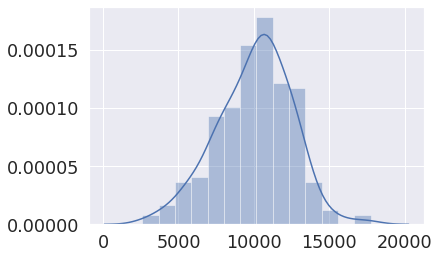

In [13]:
#df['label'].groupby(['filename']).agg(['count'])
sns.set(font_scale=1.6) 
sns.distplot(df.groupby(['mosaic']).size())

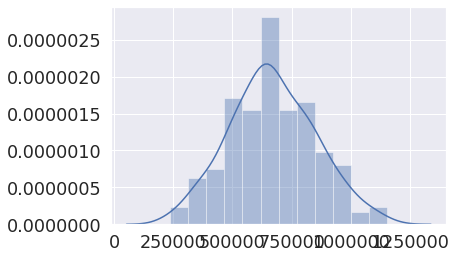

In [14]:
sns.distplot(df.groupby(['mosaic'])[['total_pixels']].sum())

In [15]:
data_for_hist = ['label','mosaic','total_pixels', 'integrated_intensity', 'brightest_pixel', 'fit_x_axis', 'fit_y_axis', 'deconv_x', 'deconv_y', 'integrated_intensity_fit', 'ratio_residual', 'overlap']
data = df[data_for_hist]
#sns.pairplot(data)

Text(0, 0.5, 'Counts')

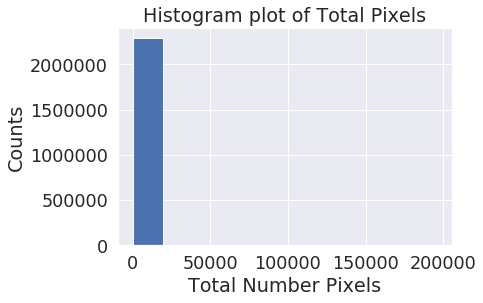

In [16]:
plt.hist(df.total_pixels)
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

In [17]:
max(df.total_pixels), min(df.total_pixels)

(196131, 14)

In [18]:
np.quantile(df.total_pixels, 0.9999)

6339.424399999902

Text(0, 0.5, 'Counts')

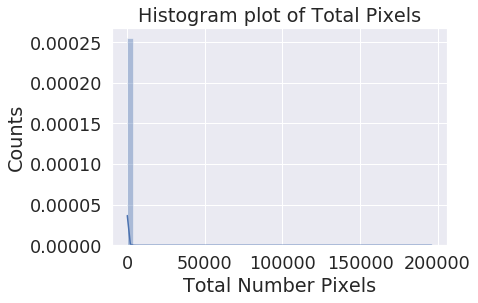

In [19]:
sns.distplot(df.total_pixels)
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

6339


Text(0, 0.5, 'Counts')

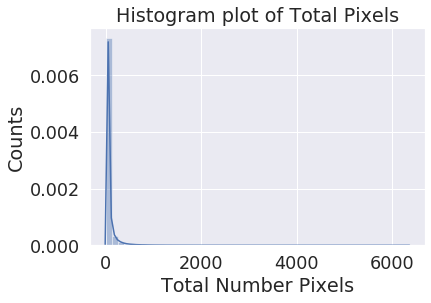

In [20]:
## Discarding the last .01% of the largest total pixels value
sns.distplot(df[df.total_pixels<np.quantile(df.total_pixels, 0.9999)].total_pixels)

print(max(df[df.total_pixels<np.quantile(df.total_pixels, 0.9999)].total_pixels))
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

The cutoff of 99.99% seems quite reasonable. However we can do without this cutoff.

Text(0, 0.5, 'Counts')

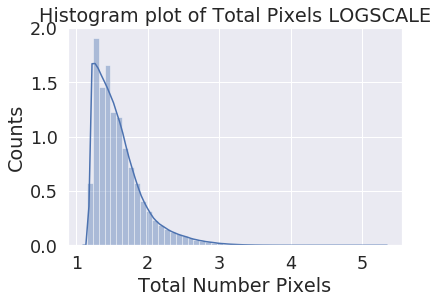

In [21]:
#df.loc[df.total_pixels == 0, 'total_pixels'] = min(df.loc[df.total_pixels > 0].total_pixels)/1000
sns.distplot(np.log10(df.total_pixels))
plt.title('Histogram plot of Total Pixels LOGSCALE')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

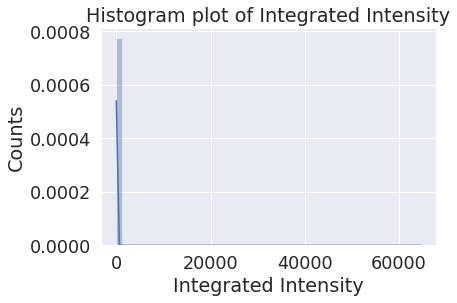

In [22]:
sns.distplot(df.integrated_intensity)
plt.title('Histogram plot of Integrated Intensity')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')


In [23]:
max(df.integrated_intensity), min(df.integrated_intensity), np.quantile(df.integrated_intensity, 0.99995)

(64581.309932741126, 0.1072605765460542, 5058.911349833107)

Text(0, 0.5, 'Counts')

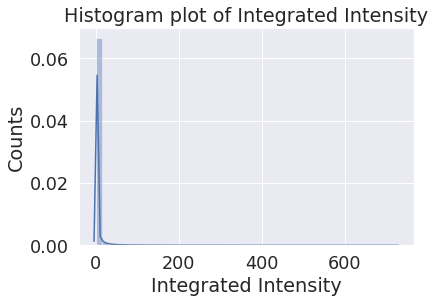

In [24]:
sns.distplot(df[df.integrated_intensity<np.quantile(df.integrated_intensity, 0.999)].integrated_intensity)
plt.title('Histogram plot of Integrated Intensity')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')
## However, a cutoff for this may not be required

Text(0, 0.5, 'Counts')

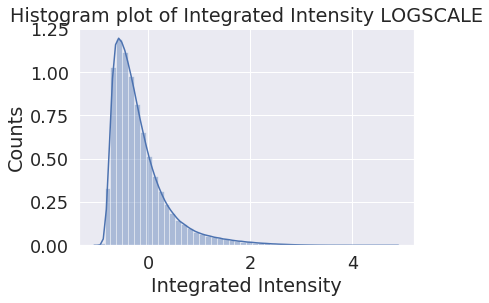

In [25]:
sns.distplot(np.log10(df.integrated_intensity))
plt.title('Histogram plot of Integrated Intensity LOGSCALE')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

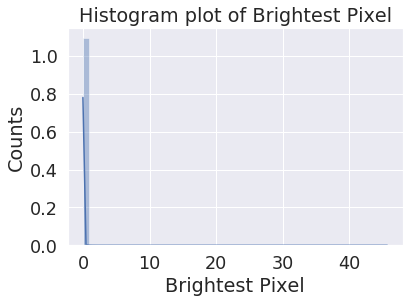

In [26]:
sns.distplot(df.brightest_pixel)
plt.title('Histogram plot of Brightest Pixel')

plt.xlabel('Brightest Pixel')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

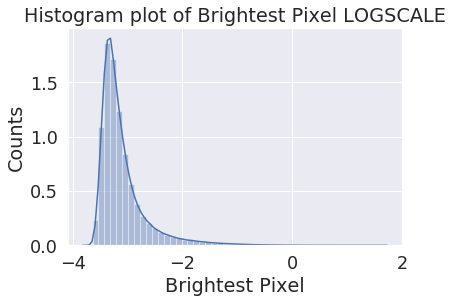

In [27]:
sns.distplot(np.log10(df.brightest_pixel))
plt.title('Histogram plot of Brightest Pixel LOGSCALE')

plt.xlabel('Brightest Pixel')
plt.ylabel('Counts')


For the brightest pixel also, nothing needs to be done.

Text(0, 0.5, 'Counts')

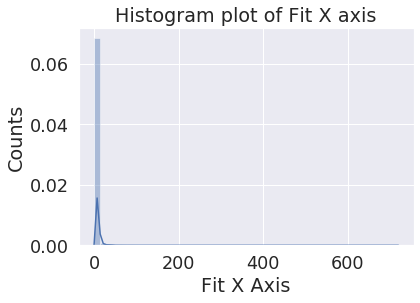

In [28]:
sns.distplot(df.fit_x_axis)
plt.title('Histogram plot of Fit X axis')

plt.xlabel('Fit X Axis')
plt.ylabel('Counts')

In [29]:
df.loc[df.fit_x_axis==0.0, 'fit_x_axis'] =1.0e-8  ## Some values are 0 implying log (0) = inf. So it replaced by a finite value 1000 times less than the minimum value

Text(0, 0.5, 'Counts')

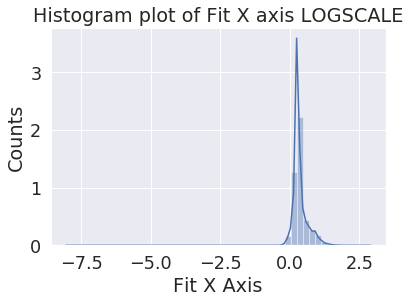

In [30]:
sns.distplot(np.log10(df.fit_x_axis))
plt.title('Histogram plot of Fit X axis LOGSCALE')

plt.xlabel('Fit X Axis')
plt.ylabel('Counts')

For the fit_x_axis also, nothing needs to be done.

Text(0, 0.5, 'Counts')

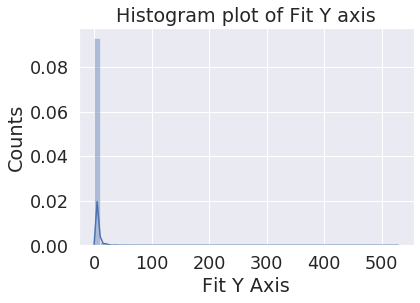

In [31]:
sns.distplot(df.fit_y_axis)
plt.title('Histogram plot of Fit Y axis')

plt.xlabel('Fit Y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

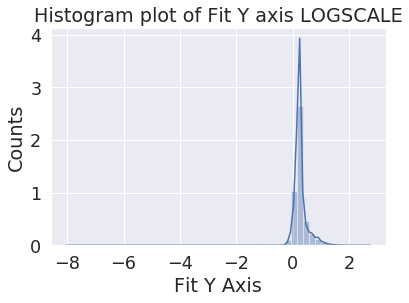

In [32]:
df.loc[df.fit_y_axis==0.0, 'fit_y_axis'] =1.0e-8 
sns.distplot(np.log10(df.fit_y_axis))
plt.title('Histogram plot of Fit Y axis LOGSCALE')

plt.xlabel('Fit Y Axis')
plt.ylabel('Counts')

For the fit_y_axis also, nothing needs to be done.

Text(0, 0.5, 'Counts')

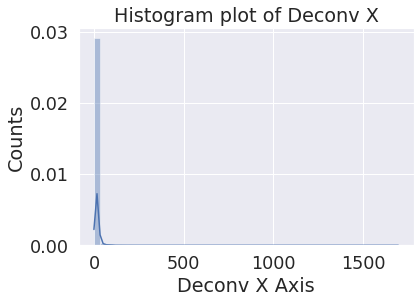

In [33]:
sns.distplot(df.deconv_x)
plt.title('Histogram plot of Deconv X')

plt.xlabel('Deconv X Axis')
plt.ylabel('Counts')

In [34]:
df.loc[df.deconv_x == 0, 'deconv_x'] = min(df[df.deconv_x > 0].deconv_x)* 1e-5


Text(0, 0.5, 'Counts')

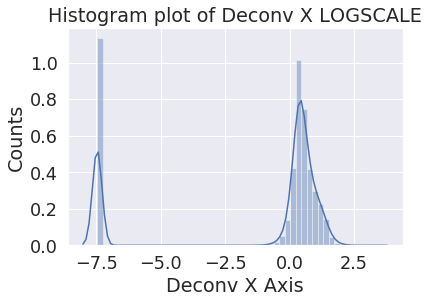

In [35]:
sns.distplot(np.log10(df.deconv_x))
plt.title('Histogram plot of Deconv X LOGSCALE')

plt.xlabel('Deconv X Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

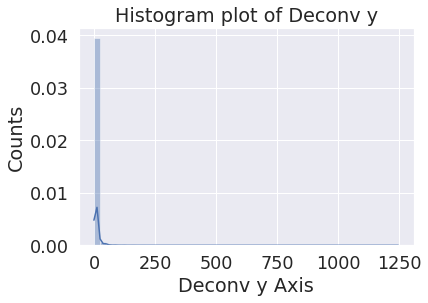

In [36]:
sns.distplot(df.deconv_y)
plt.title('Histogram plot of Deconv y')

plt.xlabel('Deconv y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

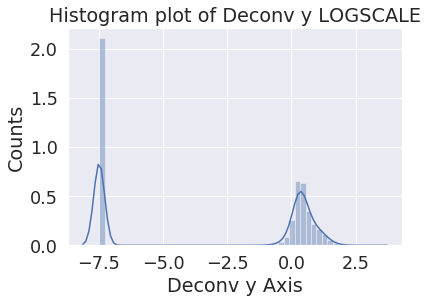

In [37]:
df.loc[df.deconv_y == 0, 'deconv_y'] = min(df[df.deconv_y > 0].deconv_y)* 1e-5
sns.distplot(np.log10(df.deconv_y))
plt.title('Histogram plot of Deconv y LOGSCALE')

plt.xlabel('Deconv y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

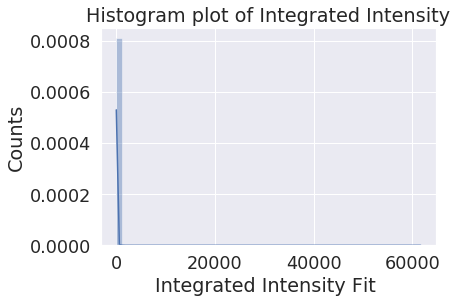

In [38]:
sns.distplot(df.integrated_intensity_fit)
plt.title('Histogram plot of Integrated Intensity')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

In [39]:
max(df.integrated_intensity_fit),min(df.integrated_intensity_fit),np.quantile(df.integrated_intensity_fit,0.99)

(61685.590226988985, -0.0010517384650815993, 76.89758302206337)

The minimum is negetive which will cause problems. So we may try shifting it by the minimum amount. However this will render the value which is minimum to zero. So lets shift is by the minimum amount + the difference between the smallest and the second smallest values.

In [40]:
smallest, second_smallest = min(df.integrated_intensity_fit), min(df[df.integrated_intensity_fit> min(df.integrated_intensity_fit)].integrated_intensity_fit)
smallest, second_smallest

(-0.0010517384650815993, -0.0008647572995187393)

In [41]:
shift = abs(smallest)+abs(smallest - second_smallest)
shift

0.0012387196306444593

Text(0, 0.5, 'Counts')

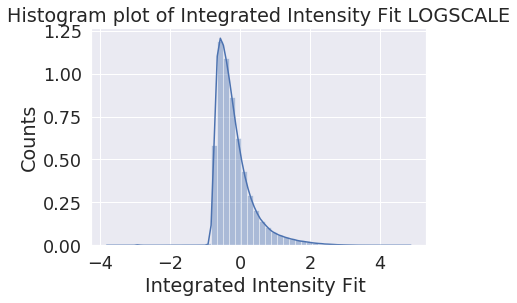

In [42]:
#df.loc[df.integrated_intensity_fit == 0, 'integrated_intensity_fit'] = min(df.loc[df.integrated_intensity_fit > 0].integrated_intensity_fit)/1000
sns.distplot(np.log10(df.integrated_intensity_fit+ shift))
plt.title('Histogram plot of Integrated Intensity Fit LOGSCALE')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

Also, another way to deal with this is to simply remove the ones with negetive intensity fit

Text(0, 0.5, 'Counts')

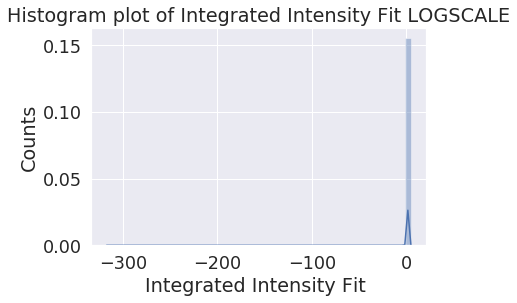

In [43]:
sns.distplot(np.log10(df[df.integrated_intensity_fit>0].integrated_intensity_fit))
plt.title('Histogram plot of Integrated Intensity Fit LOGSCALE')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

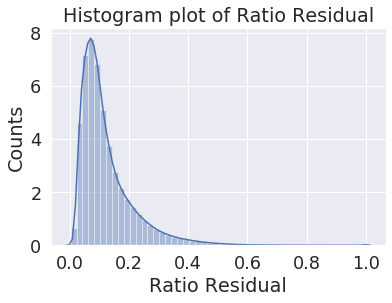

In [44]:
sns.distplot(df.ratio_residual)
plt.title('Histogram plot of Ratio Residual')

plt.xlabel('Ratio Residual')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

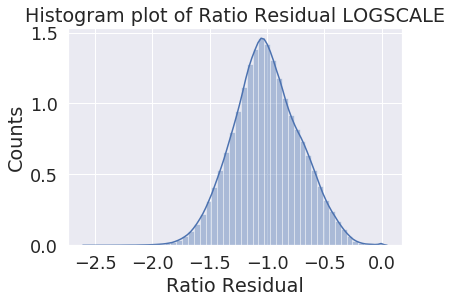

In [45]:

df.loc[df.ratio_residual == 0, 'ratio_residual'] = min(df.loc[df.ratio_residual > 0].ratio_residual)*1e-5

sns.distplot(np.log10(df.ratio_residual))
plt.title('Histogram plot of Ratio Residual LOGSCALE')

plt.xlabel('Ratio Residual')
plt.ylabel('Counts')

For the Ratio Residual nothing needs to be done.

In [46]:
data.head()

label   mosaic  total_pixels  integrated_intensity  brightest_pixel  \
0  P191+55_0  P191+55            43              0.961113         0.001262   
1  P191+55_1  P191+55            20              0.326739         0.000757   
2  P191+55_2  P191+55            45              0.745168         0.000793   
3  P191+55_3  P191+55            43              0.702810         0.000809   
4  P191+55_4  P191+55            74              1.104583         0.000829   

   fit_x_axis  fit_y_axis  deconv_x  deconv_y  integrated_intensity_fit  \
0    1.719762    1.896624  0.632697  1.986707                  0.971715   
1    1.519698    1.080085  0.000000  0.000000                  0.330021   
2    2.200380    1.810050  3.293620  1.472263                  0.761026   
3    1.720535    2.116901  0.644249  2.974800                  0.705155   
4    3.113873    2.061817  6.145499  2.751915                  1.080358   

   ratio_residual  overlap  
0        0.020838        1  
1        0.193748        0  
2        0.051991        0  
3        0.082425        2  
4        0.161090        0

## Final Plots:

<a id='Final Plots'></a>

Cleaning the data according to what we just saw:
1. Remove total pixels which have values greater than 99.99% of the data ie. cutoff = 6339 - $\textit{this is ommited for now}$
2. Shift the integrated Intensity fit values by the minimum+difference between 
3. For the deconv_x and deconv_y we replace the 0 values with the minimum multiplied by 1e-5
4. Also for the Ratio Residuals, the minimum value 0 is to be replaced by the minimum(non -zero) multiplied by 1e-5

In [47]:
#data = data[data.total_pixels<np.quantile(data.total_pixels, 0.9999)]
data.integrated_intensity_fit += shift
data.loc[data.deconv_x == 0, 'deconv_x'] = min(data[data.deconv_x > 0].deconv_x)* 1e-5
data.loc[data.deconv_y == 0, 'deconv_y'] = min(data[data.deconv_y > 0].deconv_y)* 1e-5
data.loc[data.ratio_residual == 0, 'ratio_residual'] = min(data.loc[data.ratio_residual > 0].ratio_residual)*1e-5
data.loc[data.fit_x_axis == 0, 'fit_x_axis'] = min(data[data.fit_x_axis > 0].fit_x_axis)* 1e-5
data.loc[data.fit_y_axis == 0, 'fit_y_axis'] = min(data[data.fit_y_axis > 0].fit_y_axis)* 1e-5


In [217]:
def fairplot(x, xlab="x", ylab="y", main= "Histogram", bins1=None, bins2=None, hist=[True,True], kde=[False,False], 
             fit1=None, fit2 = None, rug=[False,False], color1=None, color2 =None, vertical=[False,False], 
             label1=None, label2=None, norm_hist=[False,False], dpi= 100, figsize = (7, 3.5), label_size=(20,18),
             xlim1=None, xlim2=None, ylim1=None, ylim2=None, yscale = ['linear', 'linear'], scale_base=None):
    
    f, (ax1,ax2) = plt.subplots(1, 2, figsize=figsize, sharex=False, dpi =dpi)
    sns.distplot(x, bins=bins1, hist=hist[0], kde=kde[0], fit=fit1, rug=rug[0], color=color1, vertical=vertical[0], 
                 label=label1,norm_hist=norm_hist[0], ax=ax1,hist_kws=dict(alpha=0.9))
    sns.distplot(np.log10(x), bins=bins2,  hist=hist[1], kde=kde[1], fit=fit2, rug=rug[1], color=color2, vertical=vertical[1], 
                 label=label2, norm_hist=norm_hist[1], ax=ax2, hist_kws=dict(alpha=0.9))
    ax1.set_xlabel(xlab, fontsize=label_size[1])
    ax1.set_ylabel(ylab, fontsize=label_size[1])
    ax1.set_title('Histogram', pad=7, fontsize = label_size[0])
    if xlim1 != None:
        ax1.set(xlim=xlim1)
    if ylim1 !=None:
        ax1.set(ylim=ylim1)
    ax2.set_xlabel('Log $_{10}$'+xlab, fontsize = label_size[1])
    ax2.set_ylabel(ylab,fontsize = label_size[1])
    ax2.set_title('Histogram in LogScale', pad=7, fontsize = label_size[0])
    if xlim2 != None:
        ax2.set(xlim=xlim2)
    if ylim1 !=None:
        ax2.set(ylim=ylim2)
    if yscale[0]=='log':
        ax1.set_yscale(yscale[0], basey=scale_base)
    else:
        ax1.set_yscale(yscale[0])
    if yscale[1]=='log':
        ax2.set_yscale(yscale[1], basey=scale_base)
    else:
        ax2.set_yscale(yscale[1])
    f.suptitle(main, fontsize=12, y=1.05)
    f.tight_layout() 
    
    return(f)

In [49]:
dpi_set =600
ls = (18,14)


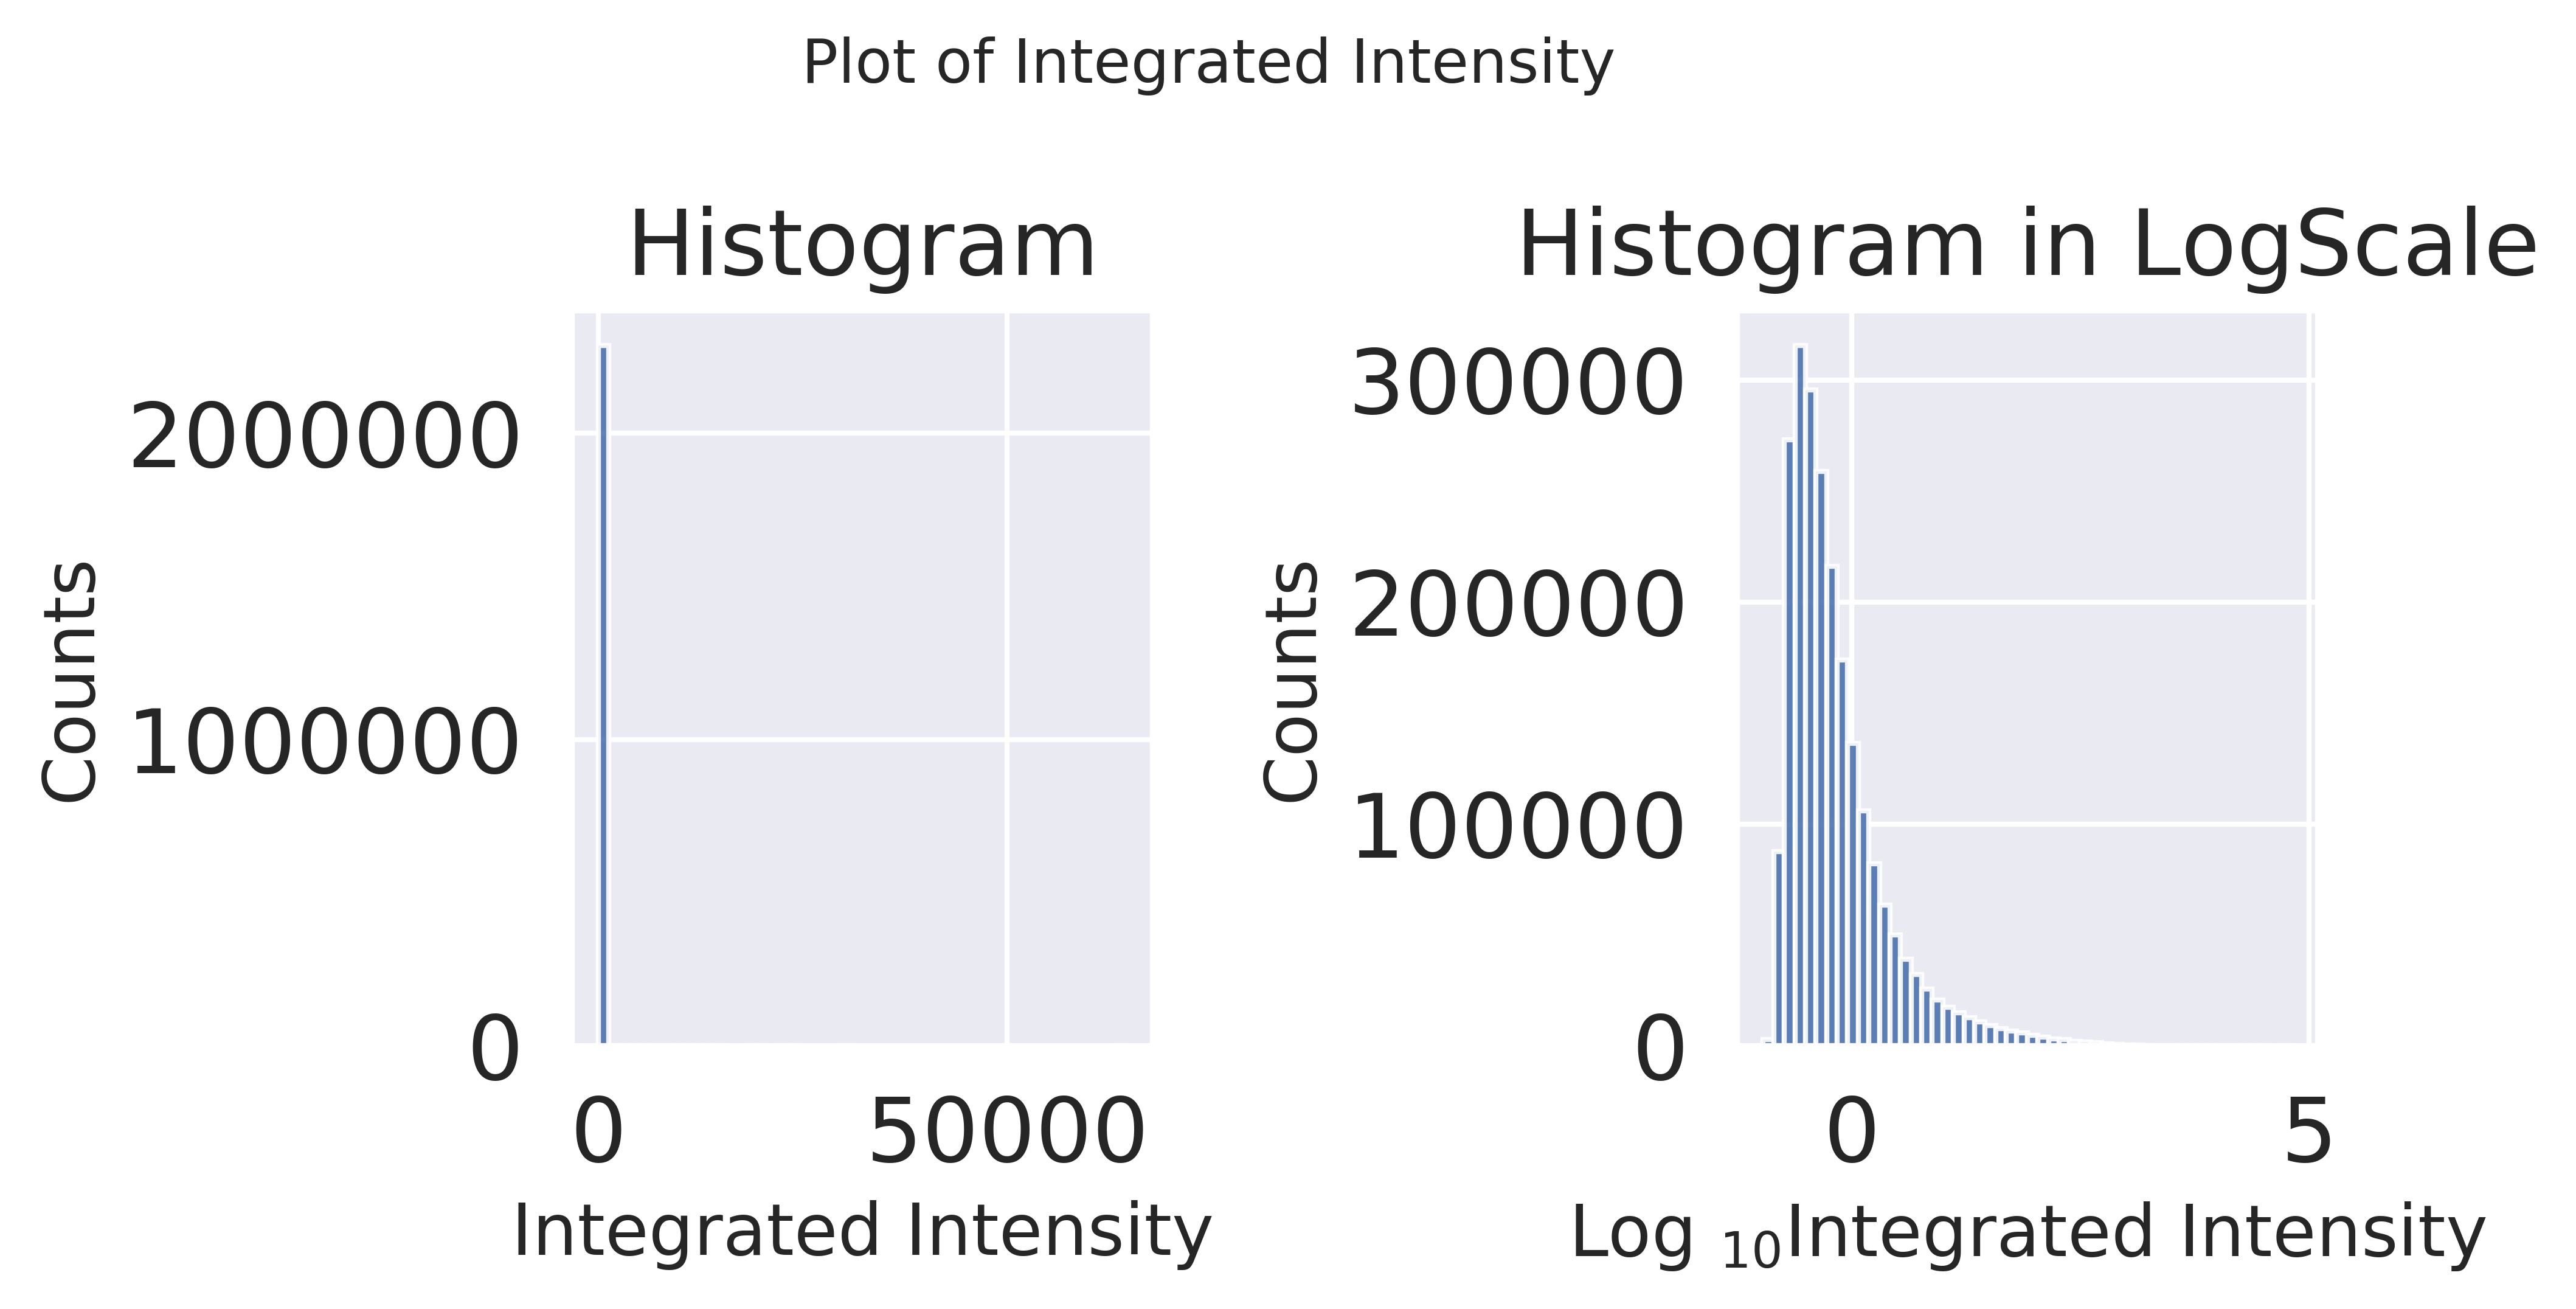

In [218]:
fig_intgrtdInt = fairplot(data.integrated_intensity, main = "Plot of Integrated Intensity",xlab = "Integrated Intensity", 
                          ylab = "Counts", kde=[False,False],dpi=dpi_set, label_size = ls)

plt.savefig('IntegratedIntensity.png')

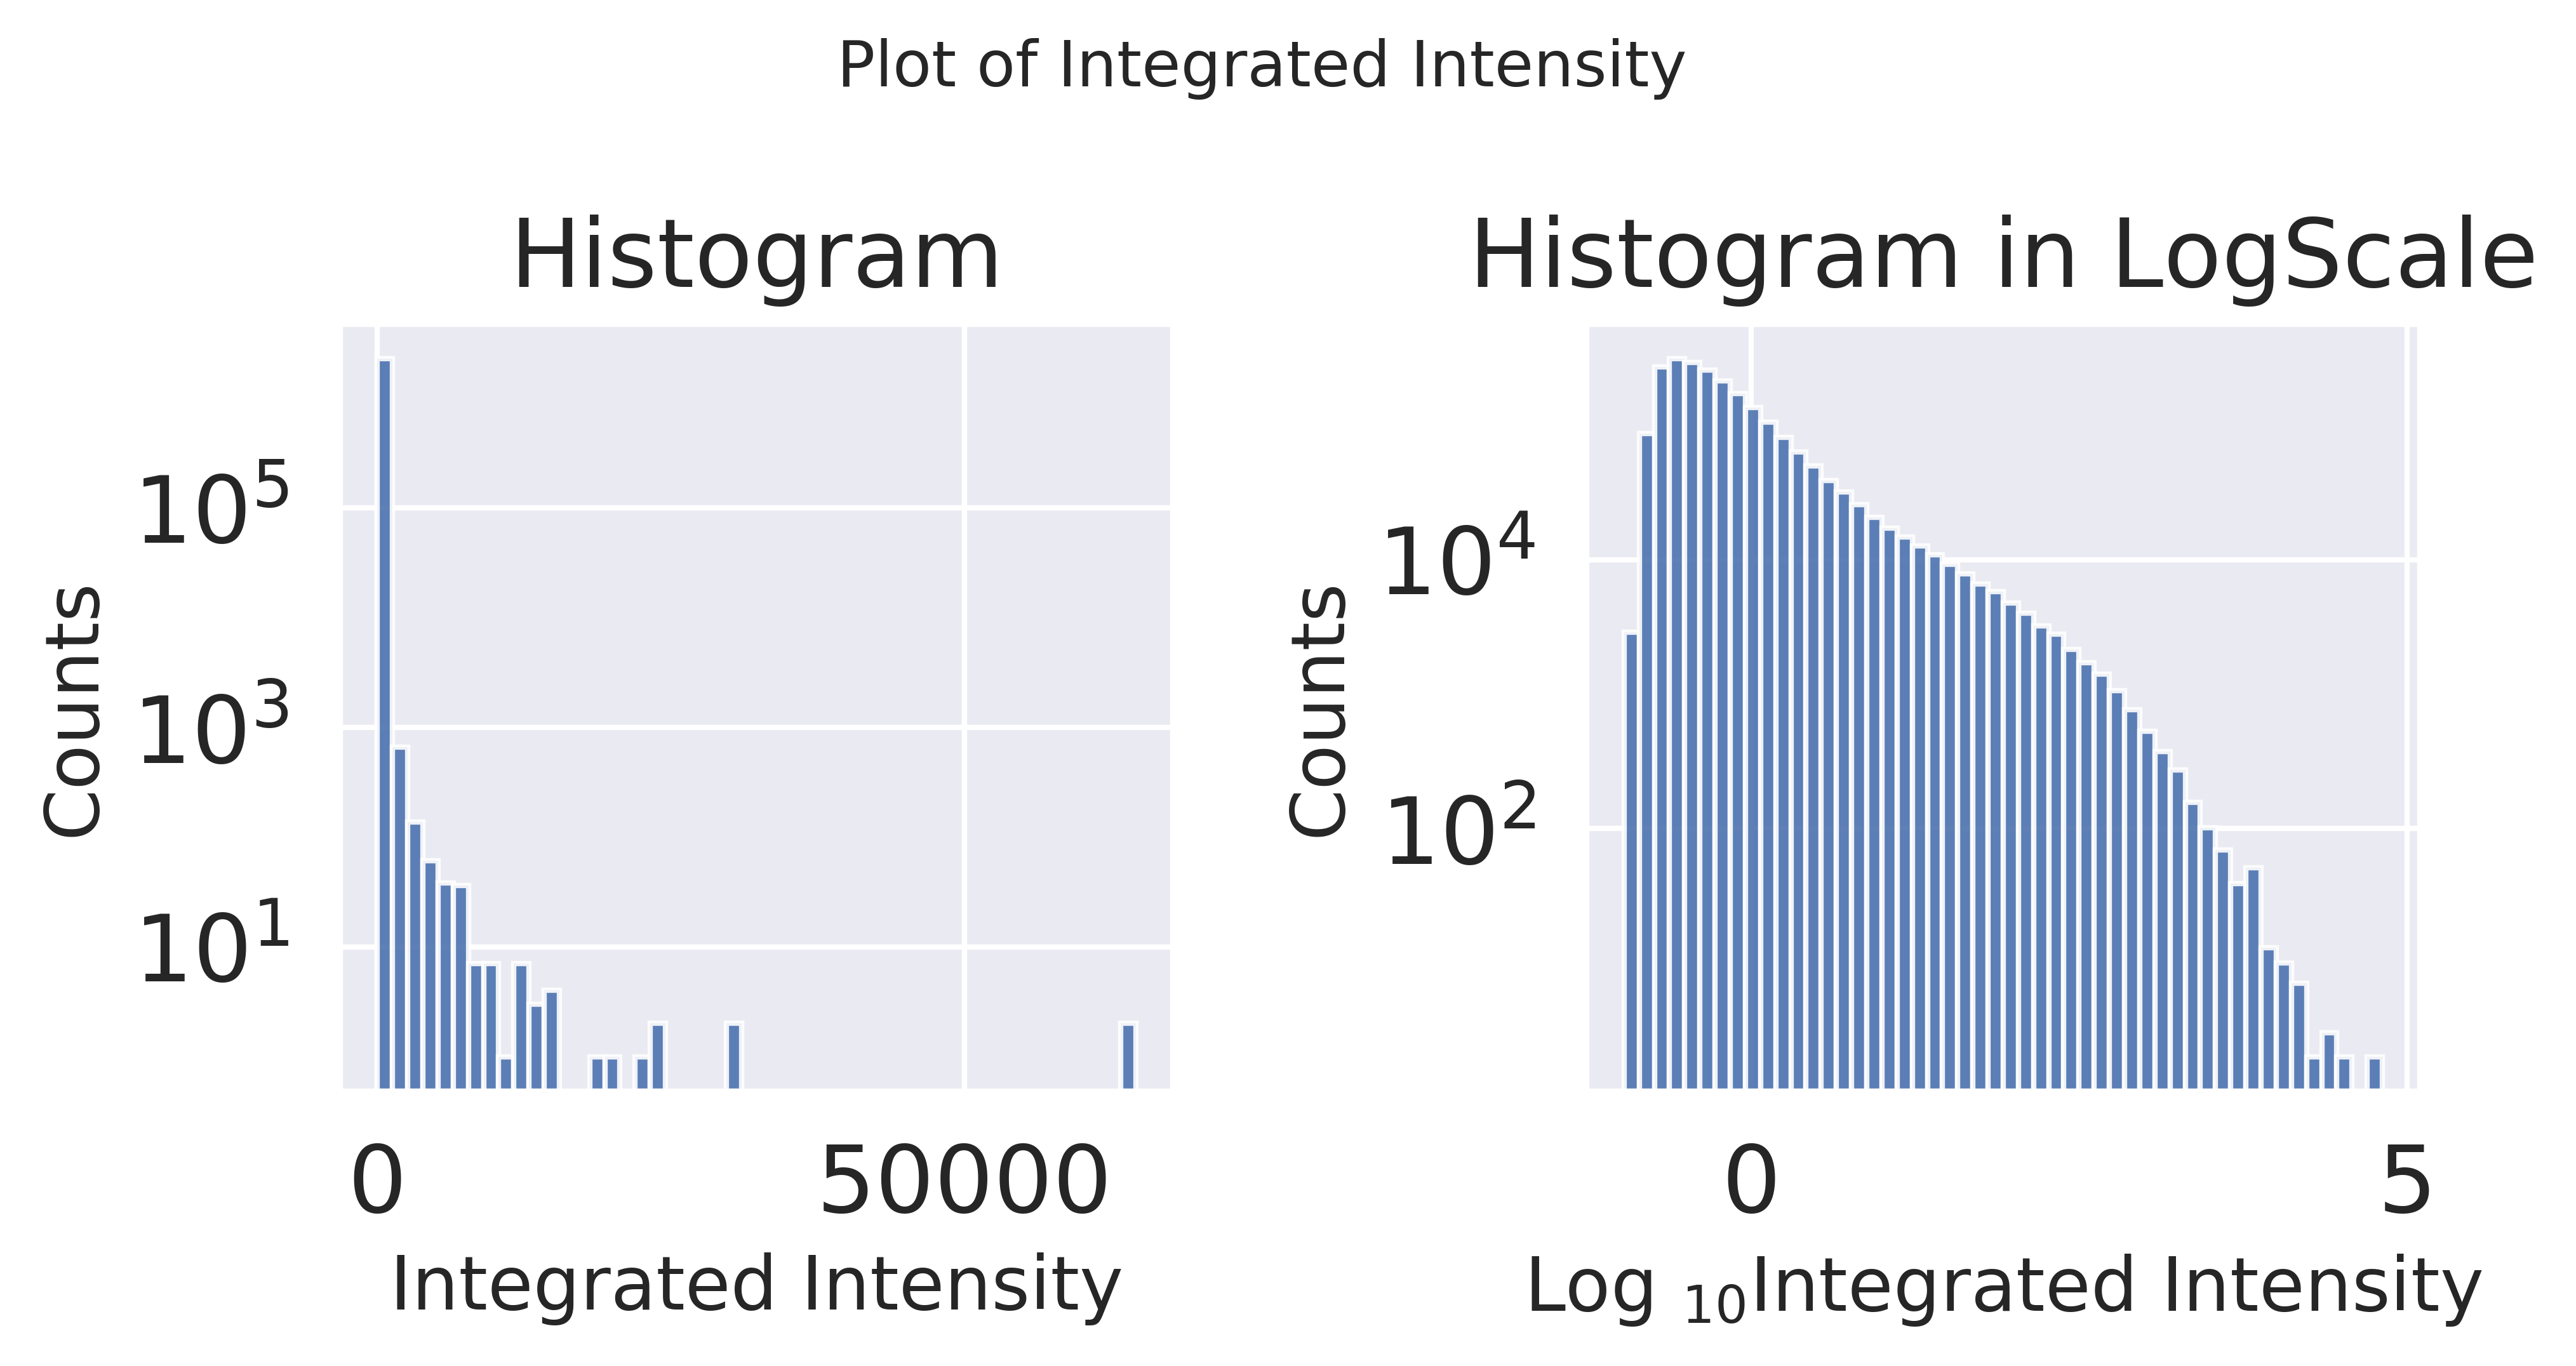

In [219]:
fig_intgrtdIntLog = fairplot(data.integrated_intensity, main = "Plot of Integrated Intensity",xlab = "Integrated Intensity", 
                          ylab = "Counts", kde=[False,False],dpi=dpi_set, yscale = ['log','log'], scale_base = 10,
                             label_size = ls)

plt.savefig('IntegratedIntensity_Log.png')

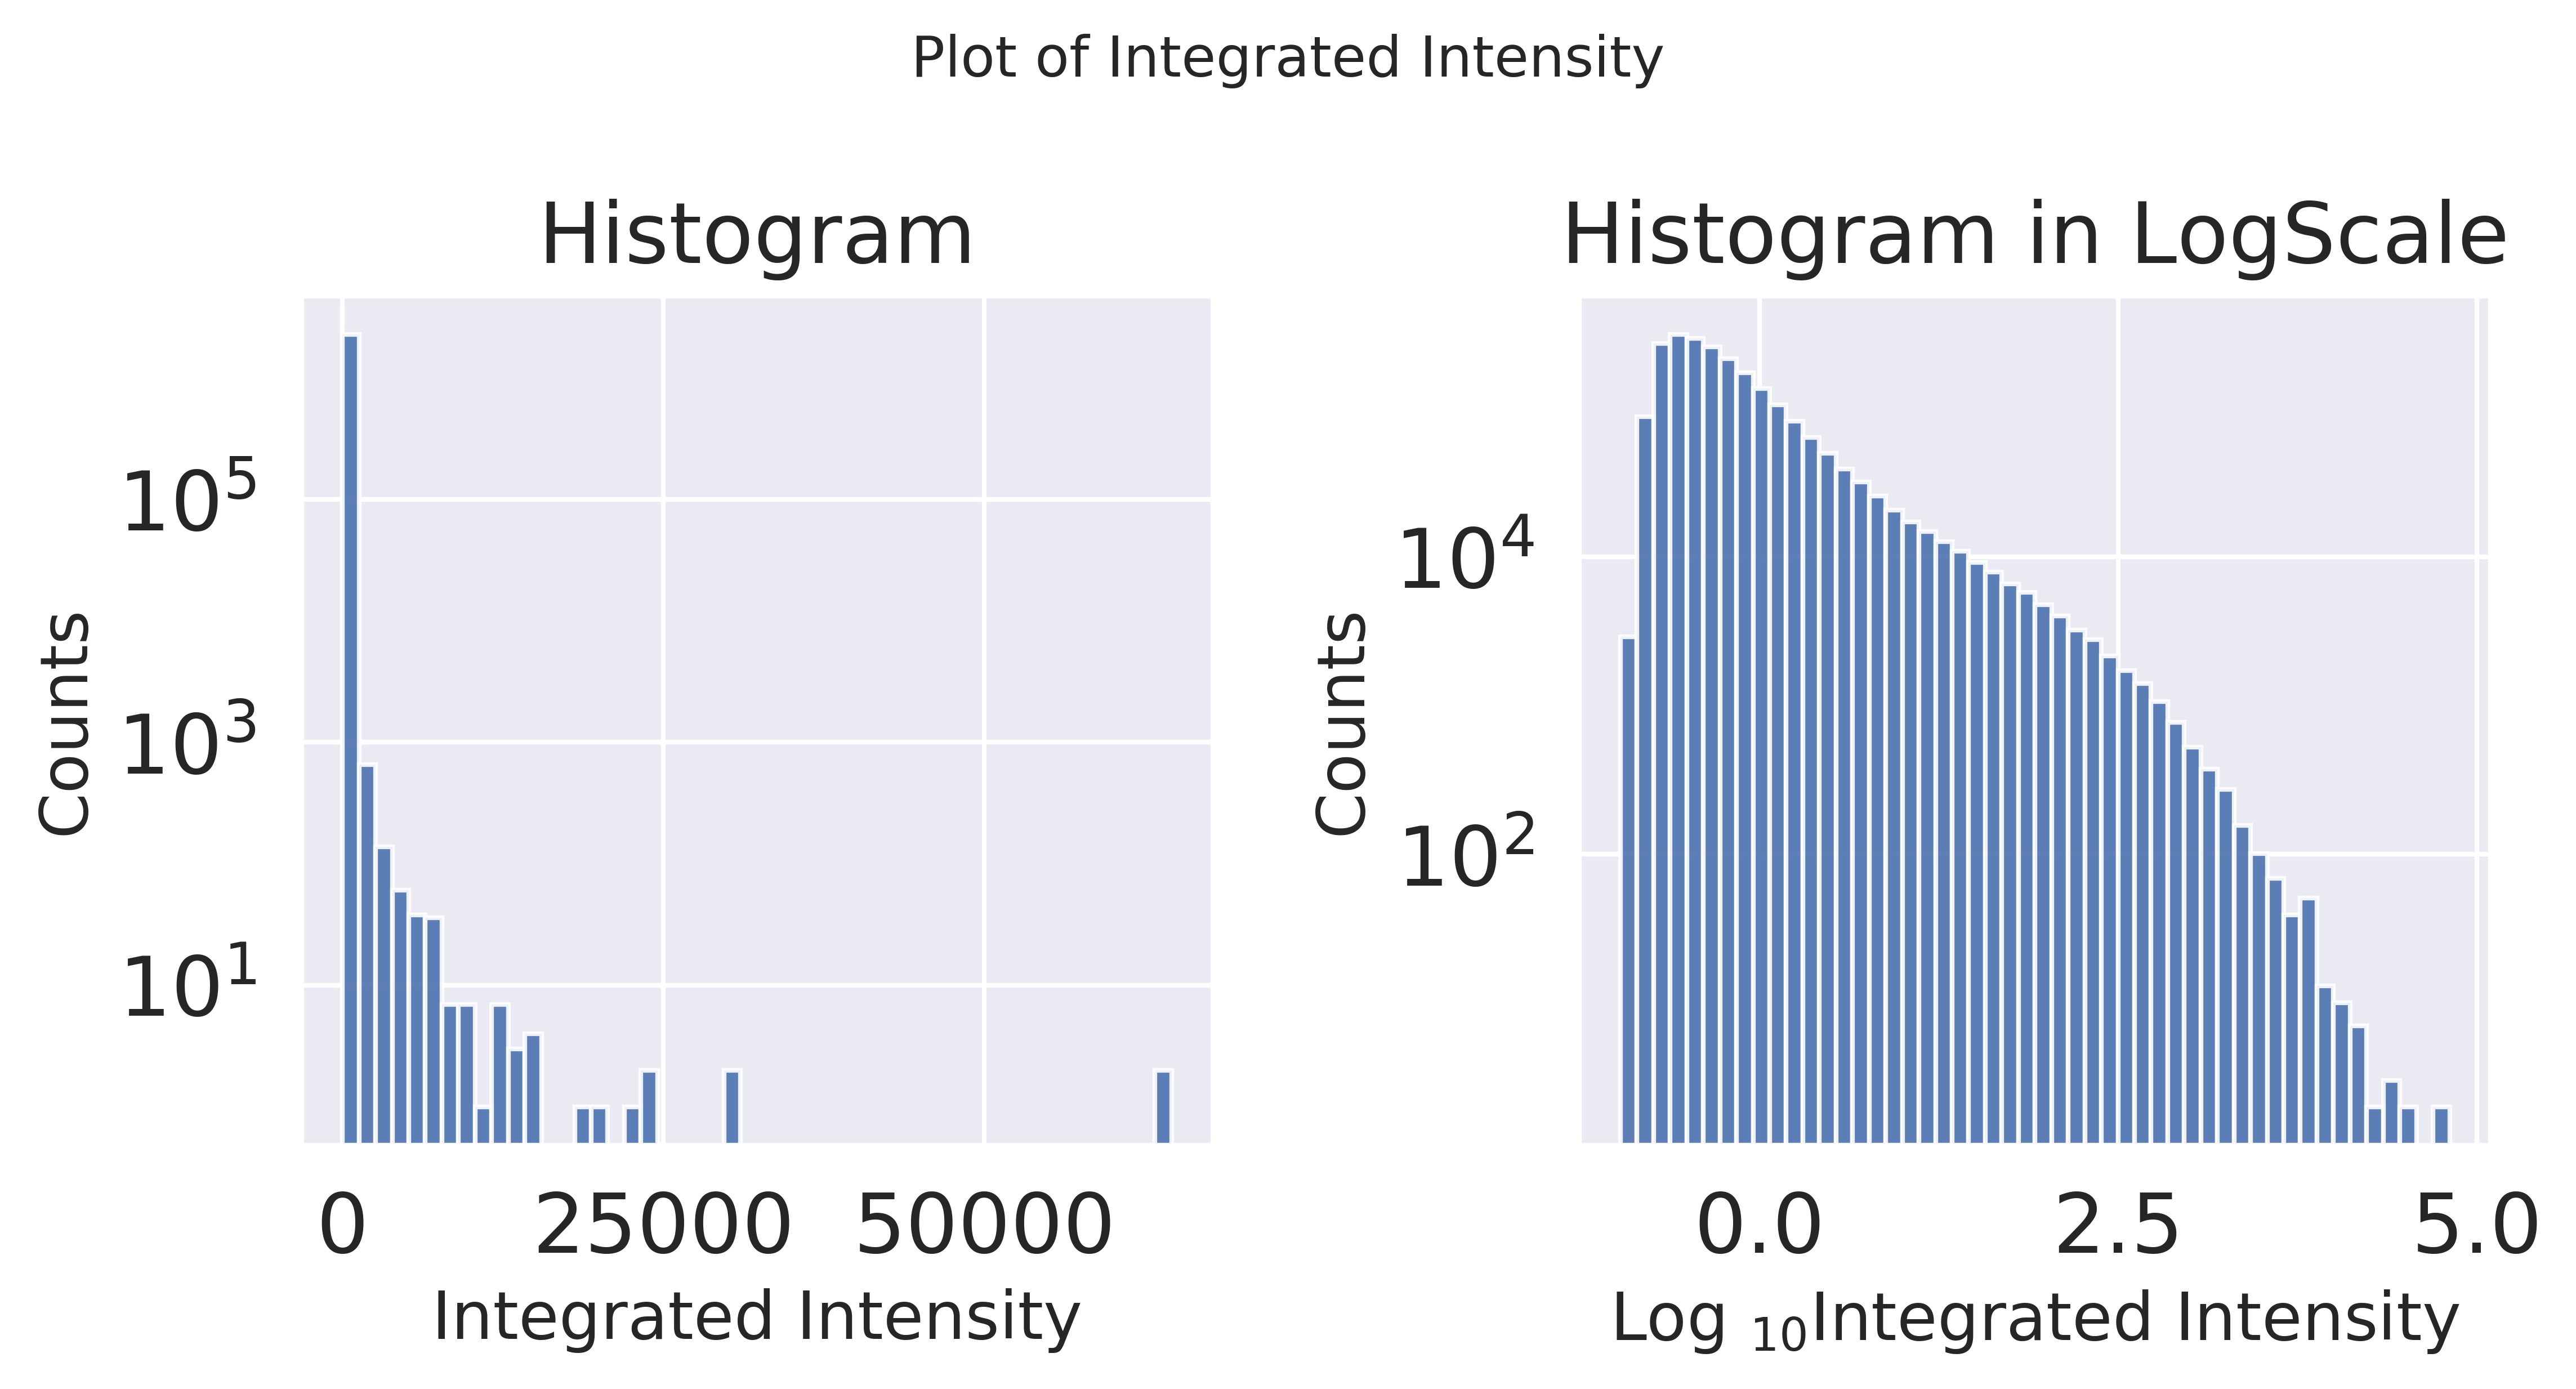

In [220]:
fig_intgrtdIntLog = fairplot(data.integrated_intensity, main = "Plot of Integrated Intensity",xlab = "Integrated Intensity", 
                          ylab = "Counts", kde=[False,False],dpi=dpi_set, yscale = ['log','log'], scale_base = 10,
                             label_size = ls, figsize = (8, 4))

plt.savefig('IntegratedIntensity_Log22222.png')

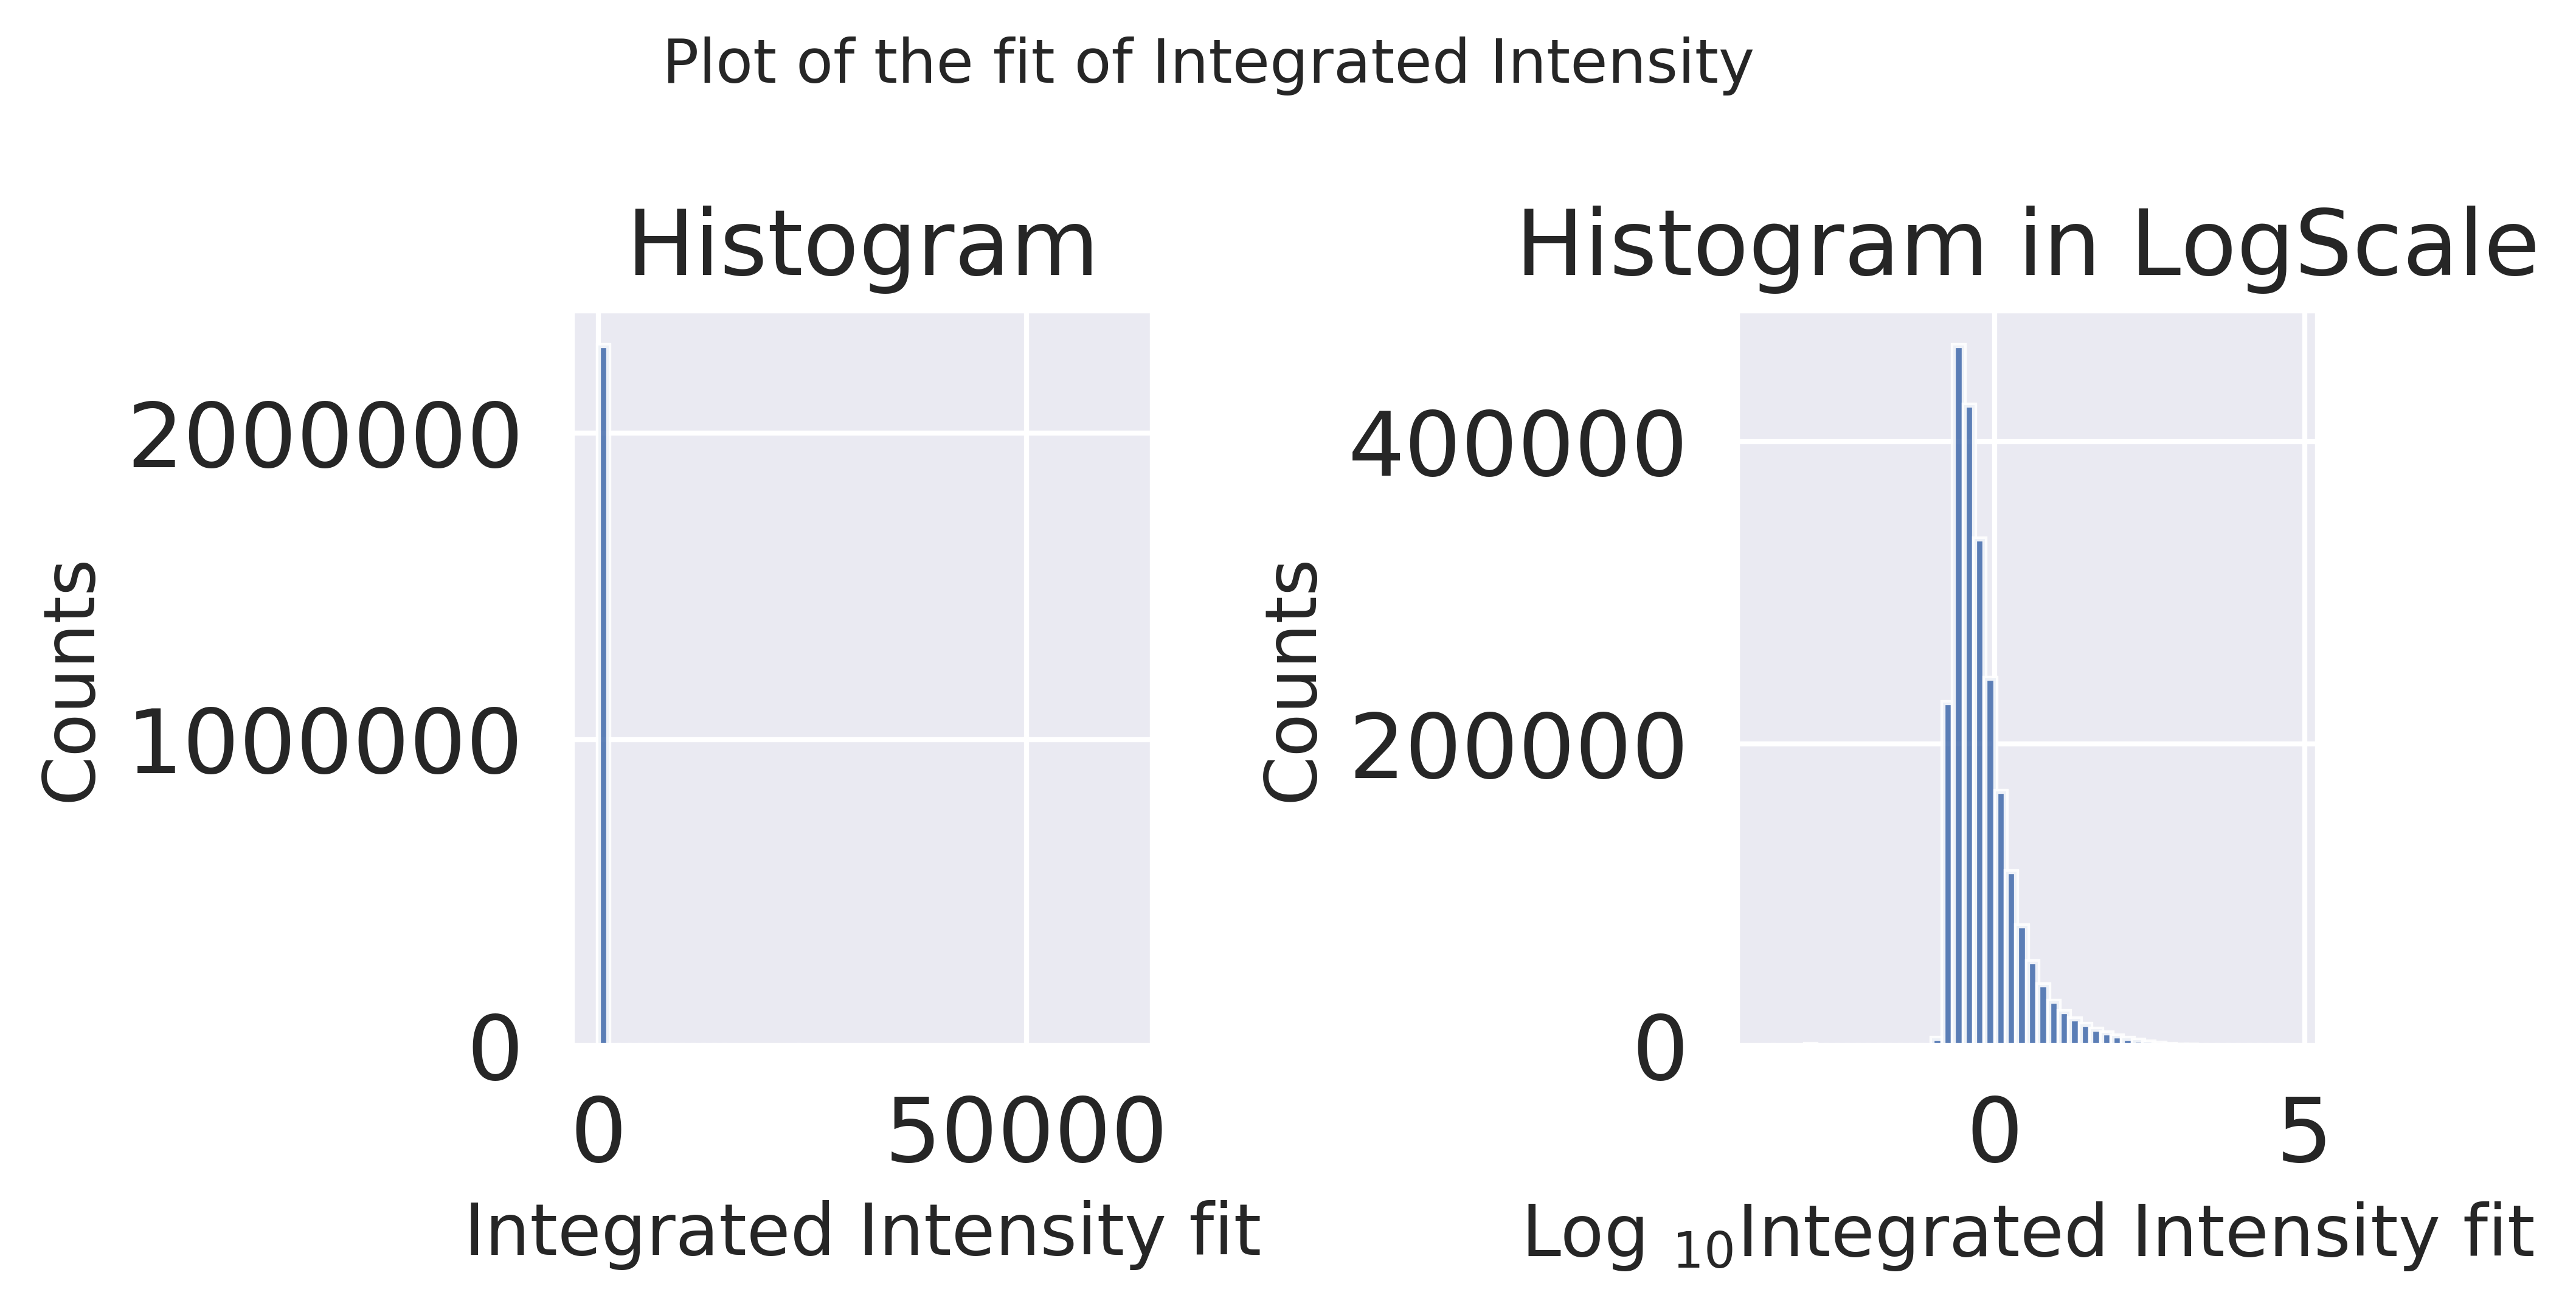

In [221]:
fig_IntgrtdIntFit = fairplot(data.integrated_intensity_fit, main = "Plot of the fit of Integrated Intensity", 
                             xlab = "Integrated Intensity fit", ylab = "Counts", kde=[False,False], dpi=dpi_set,
                             label_size = ls)

plt.savefig('IntegratedIntensityFit.png')

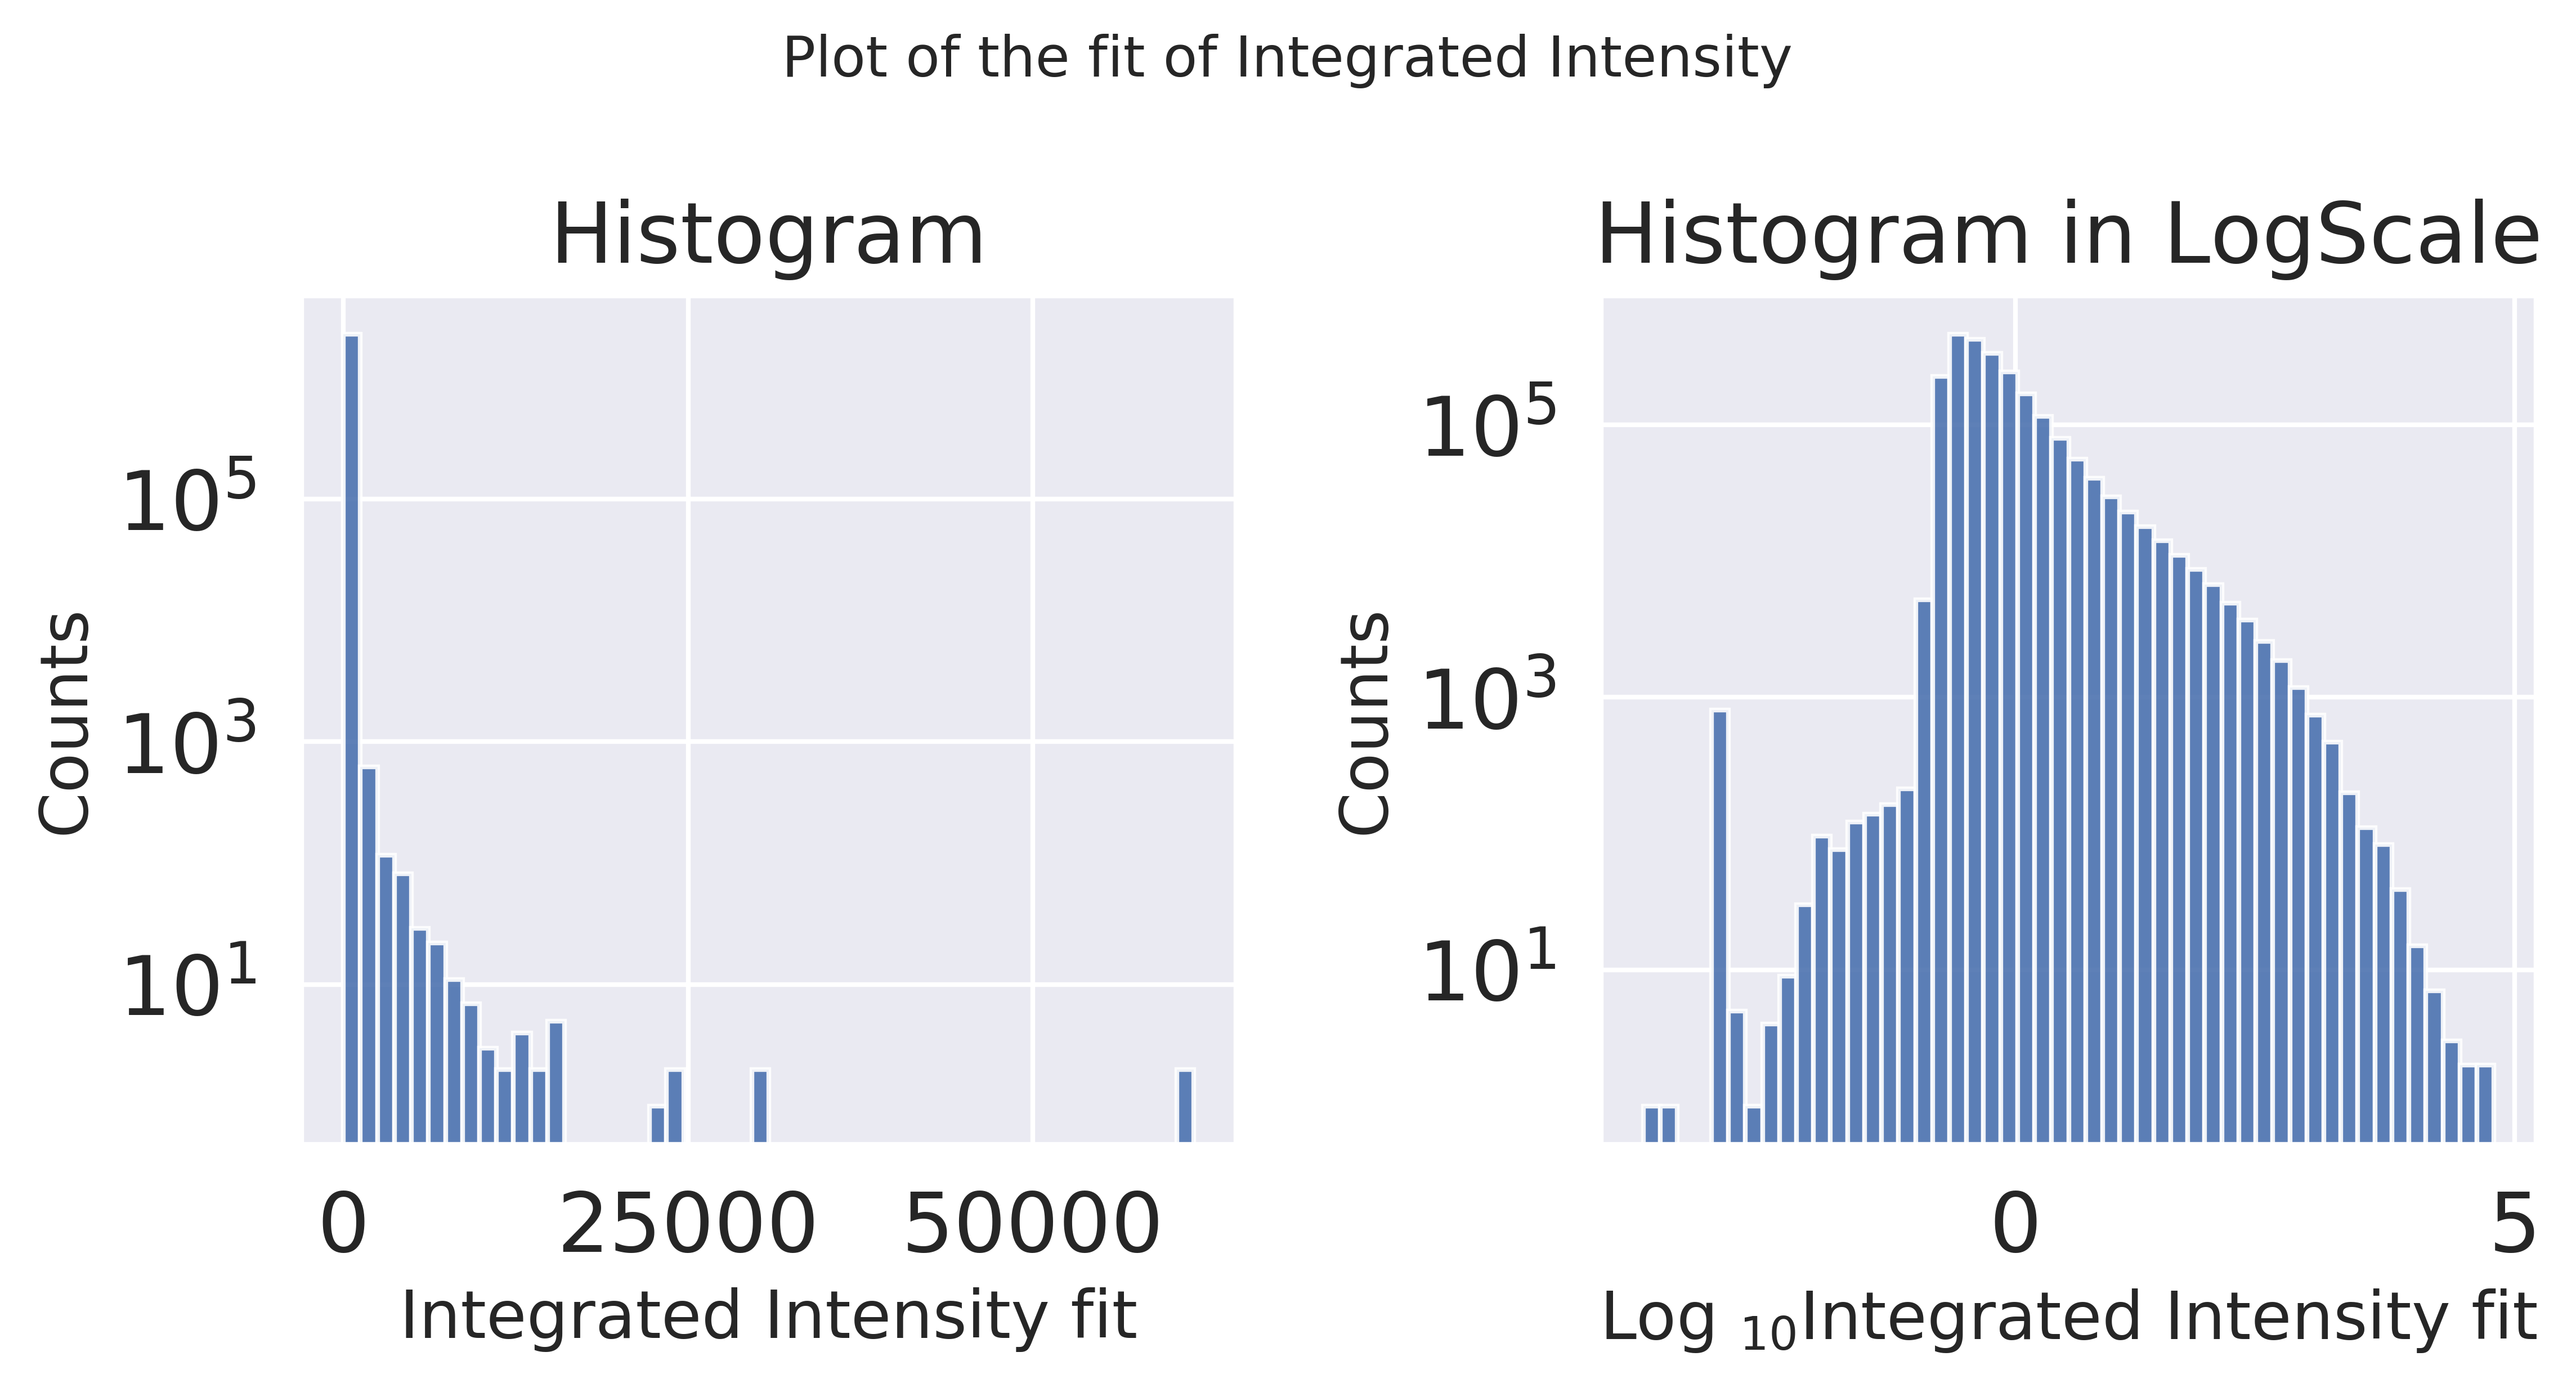

In [222]:
fig_IntgrtdIntFitLog = fairplot(data.integrated_intensity_fit, main = "Plot of the fit of Integrated Intensity", 
                             xlab = "Integrated Intensity fit", ylab = "Counts", kde=[False,False], dpi=dpi_set,
                            yscale = ['log','log'], scale_base = 10, label_size = ls, figsize = (8, 4))

plt.savefig('IntegratedIntensityFit_Log.png')

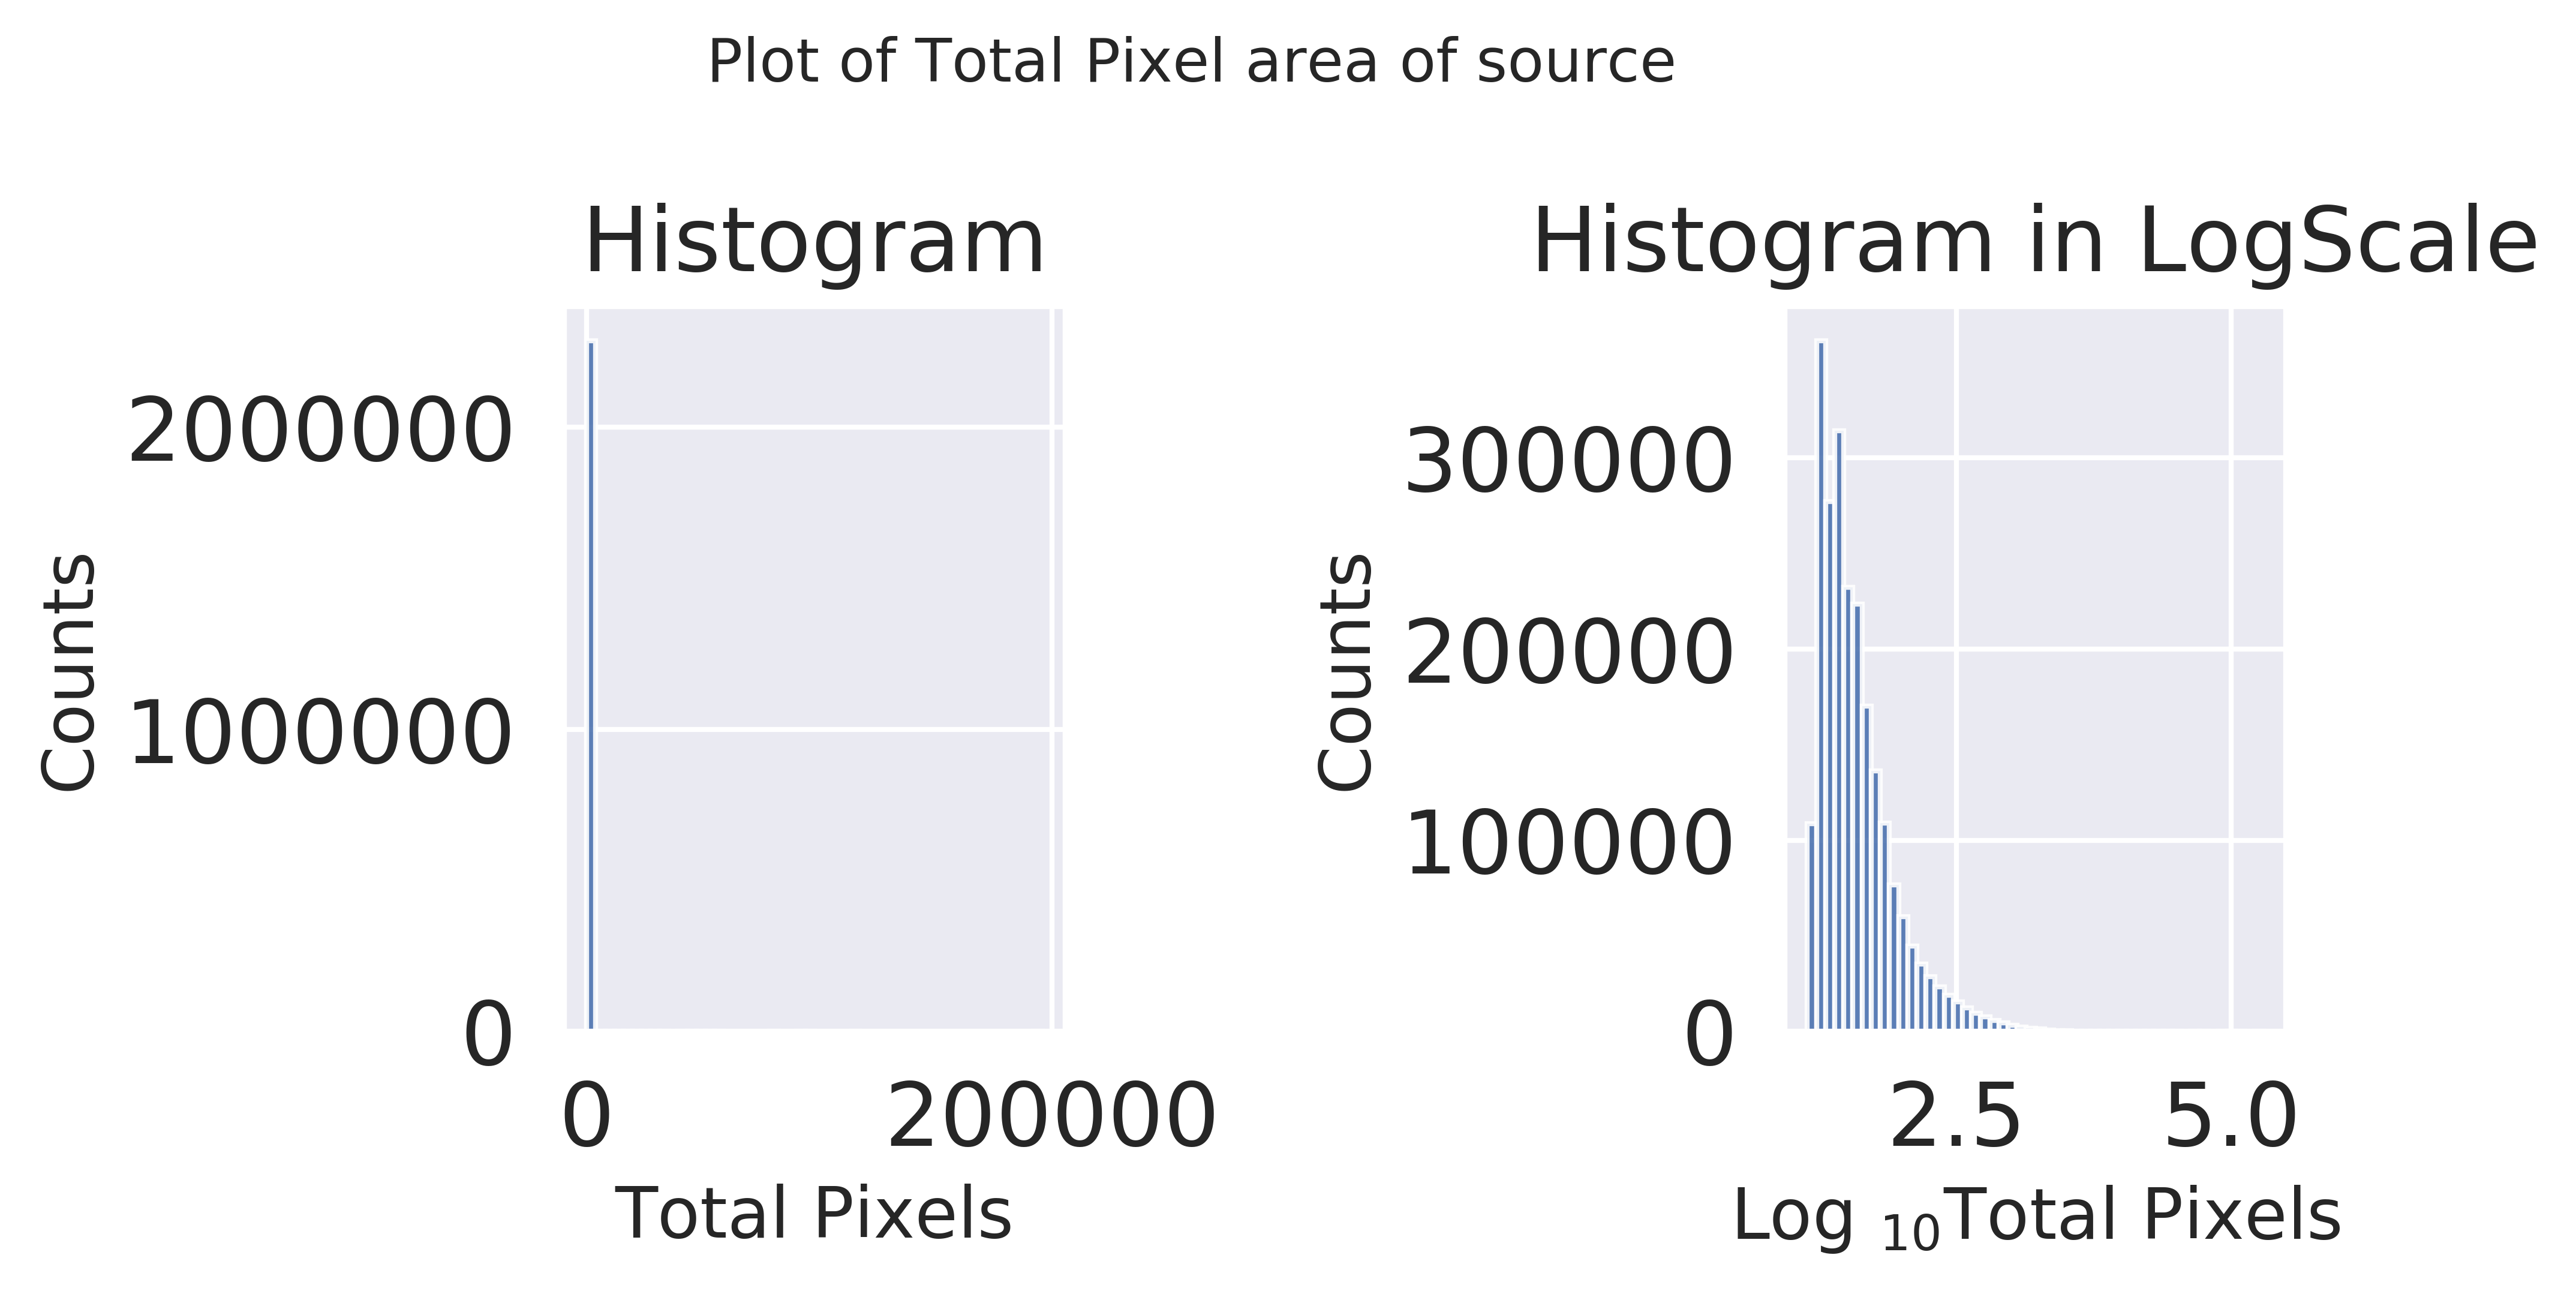

In [223]:
fig_totpxls = fairplot(data.total_pixels, main = "Plot of Total Pixel area of source",xlab = "Total Pixels", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set, label_size = ls)
plt.savefig('TotalPixels.png')

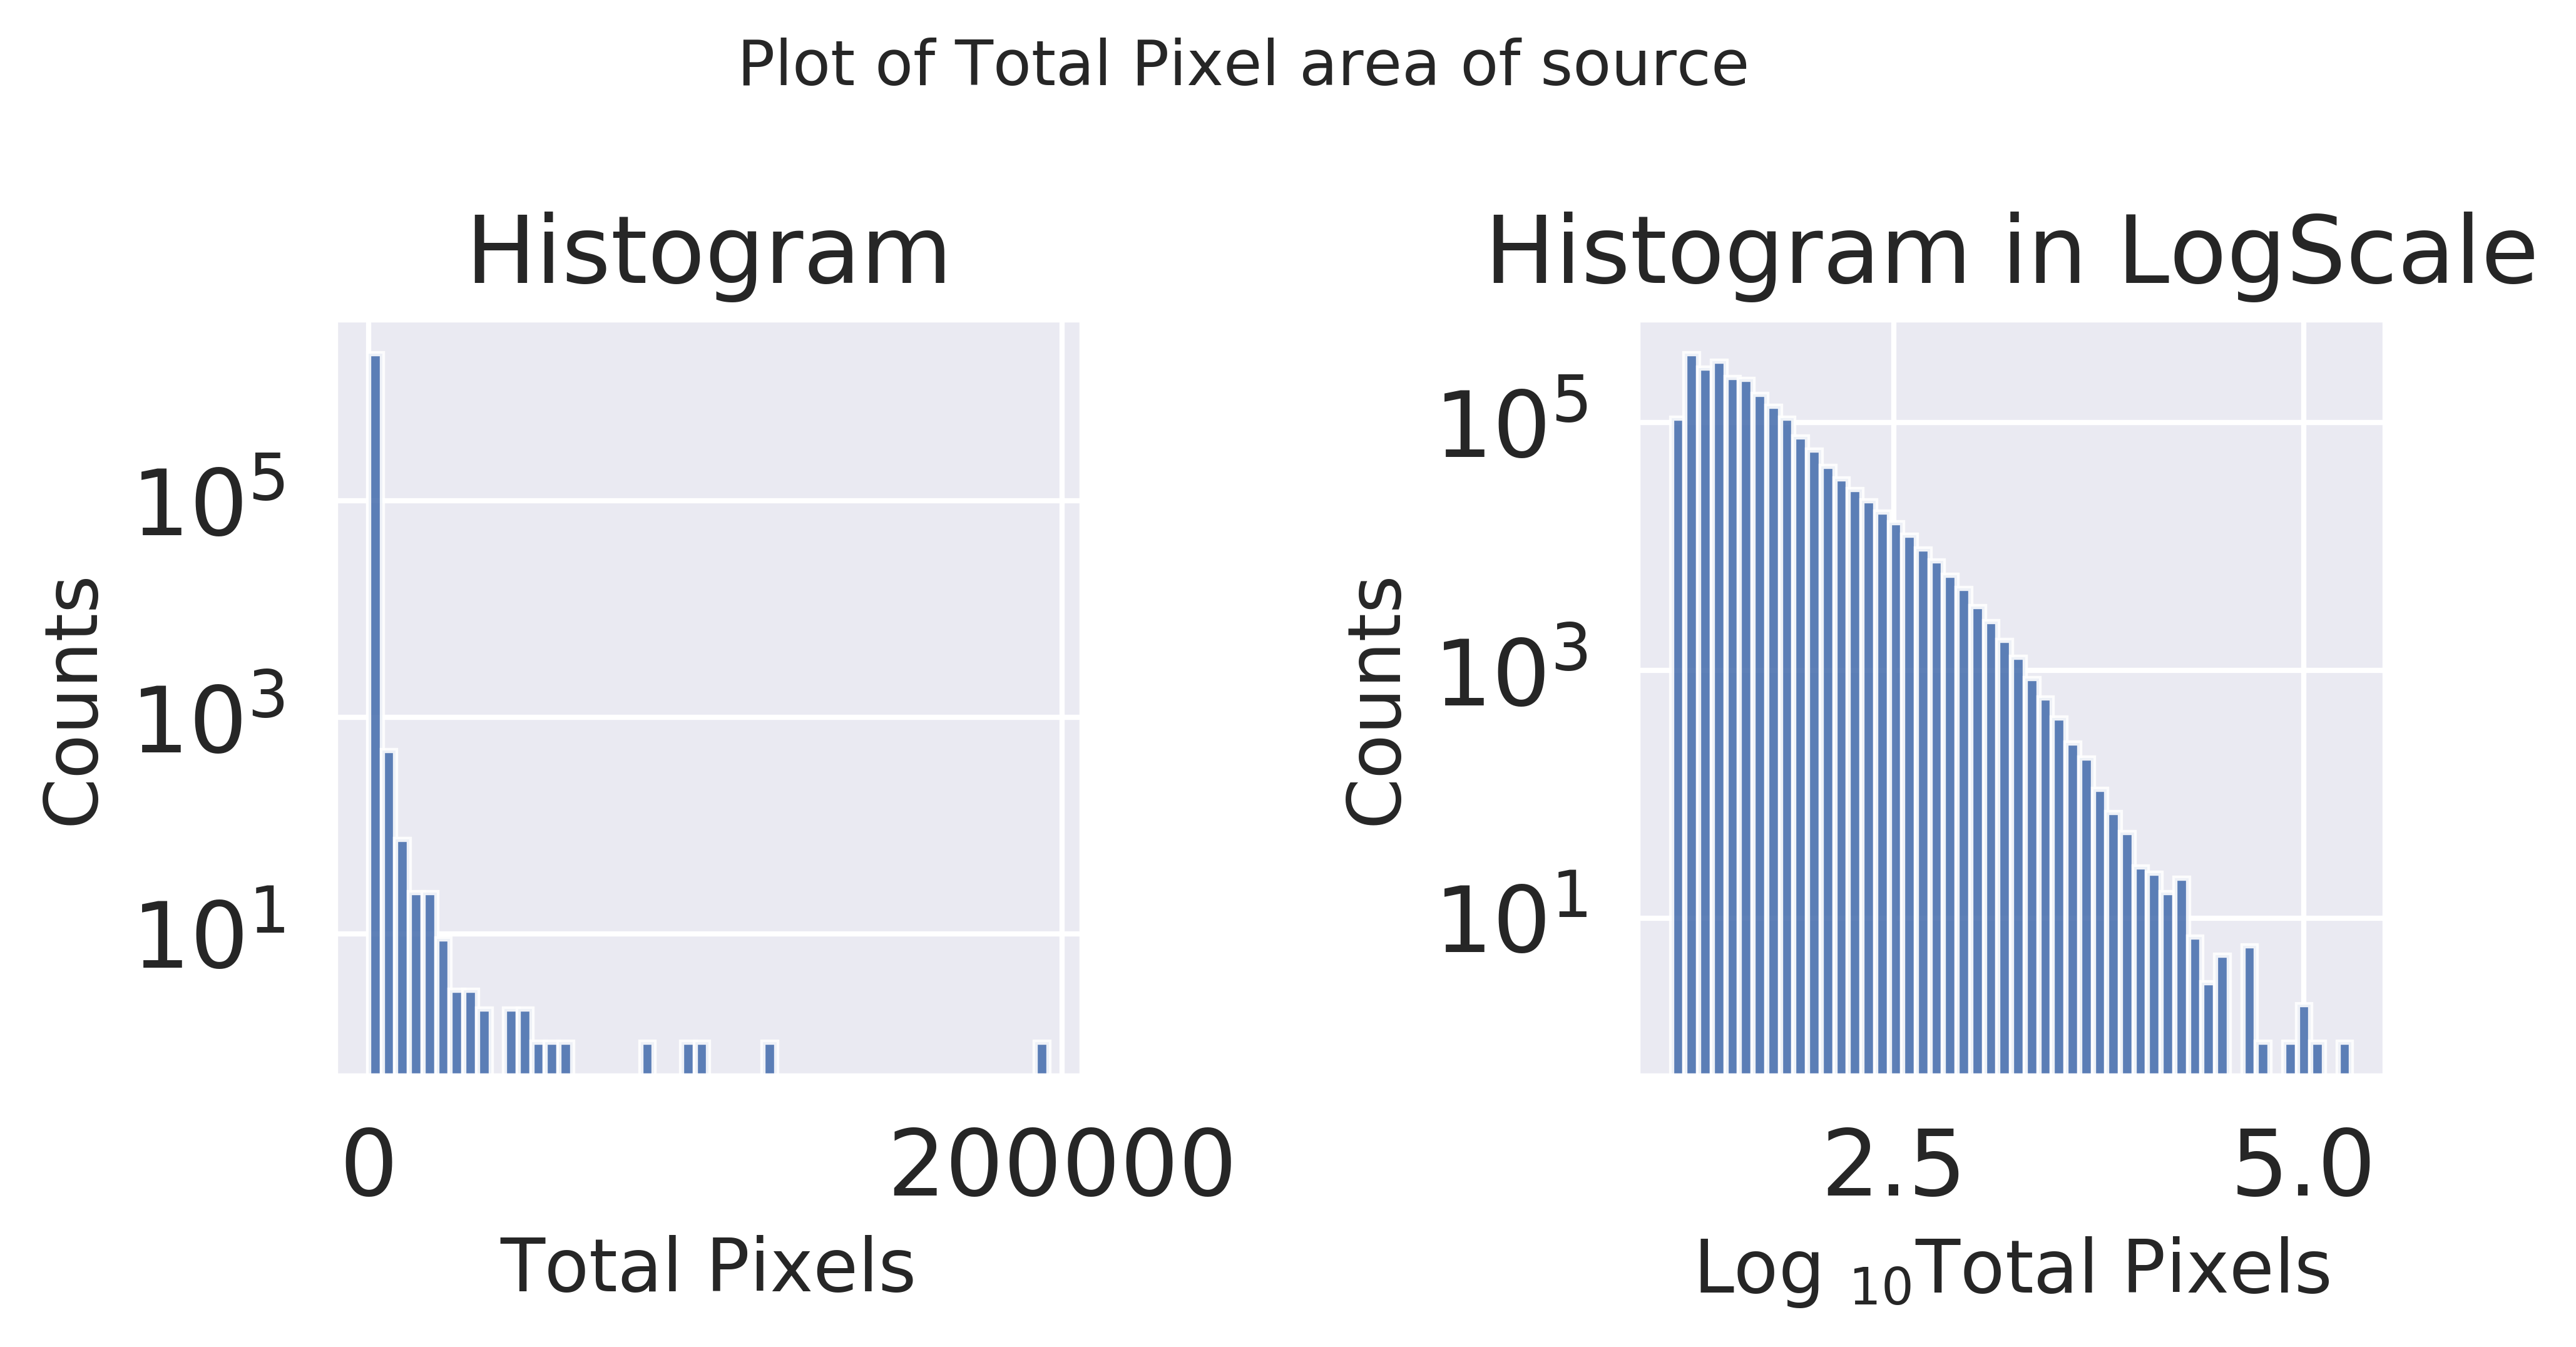

In [224]:
fig_totpxlsLog = fairplot(data.total_pixels, main = "Plot of Total Pixel area of source",xlab = "Total Pixels", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set,  yscale = ['log','log'], scale_base = 10, label_size = ls)
plt.savefig('TotalPixels_Log.png')

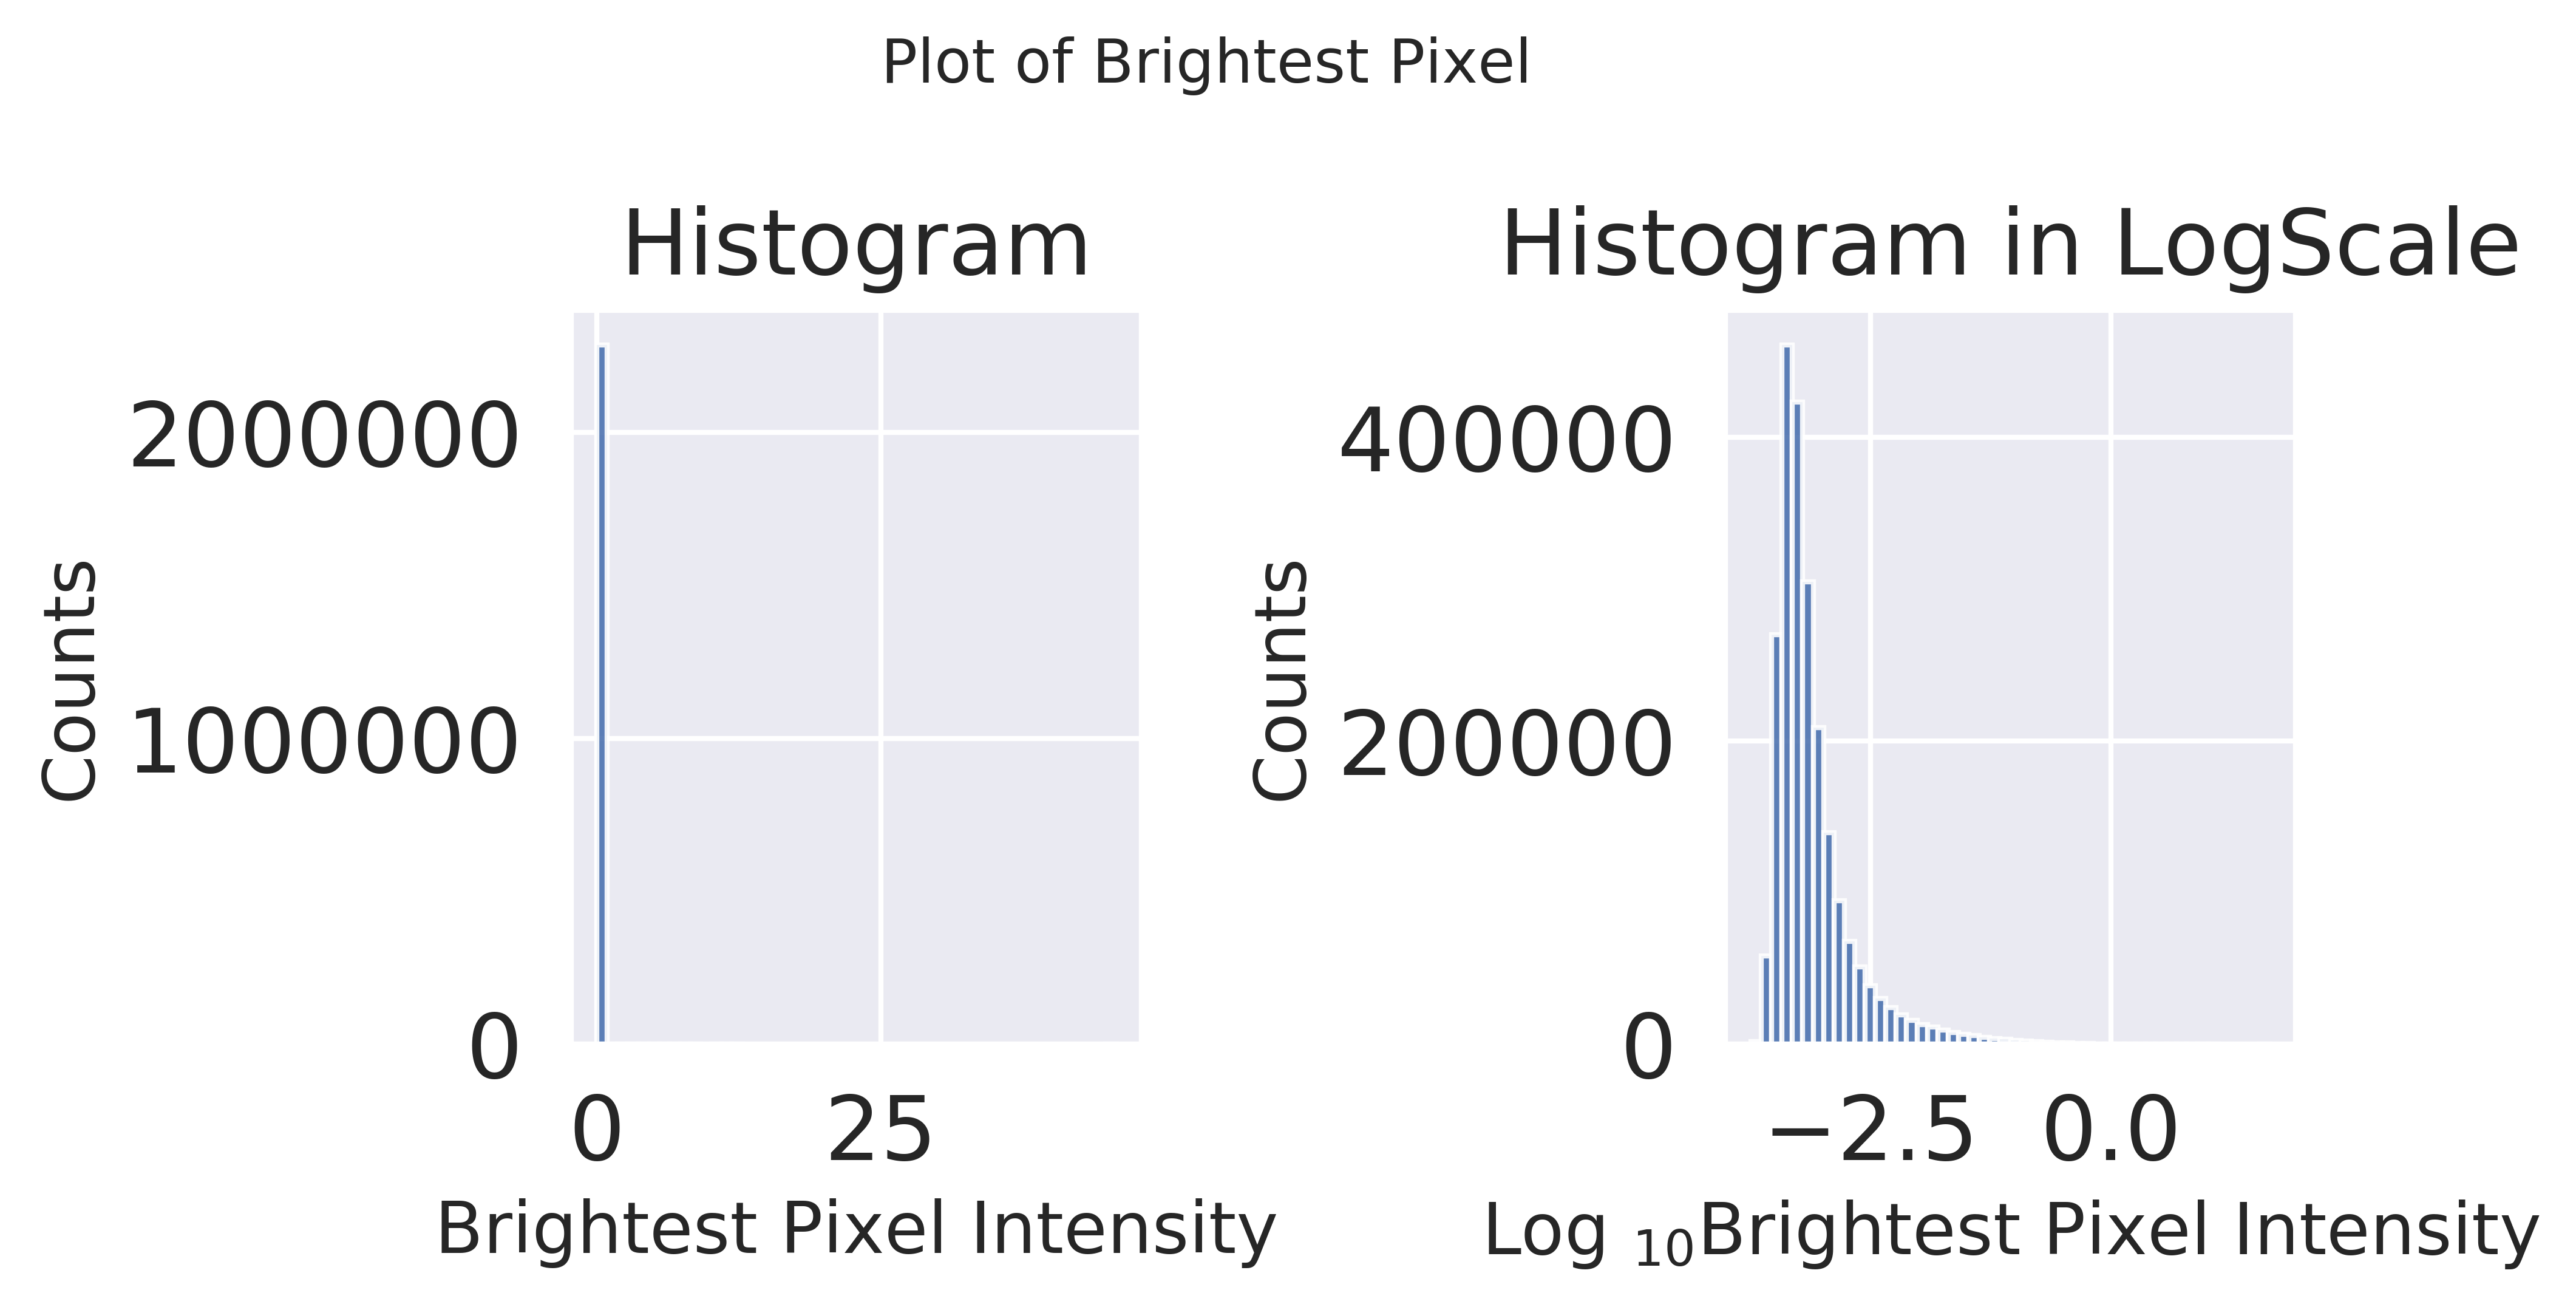

In [225]:
fig_brightestpxl = fairplot(data.brightest_pixel, main = "Plot of Brightest Pixel",xlab = "Brightest Pixel Intensity", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set, label_size = ls)
plt.savefig('BrightestPixels.png')

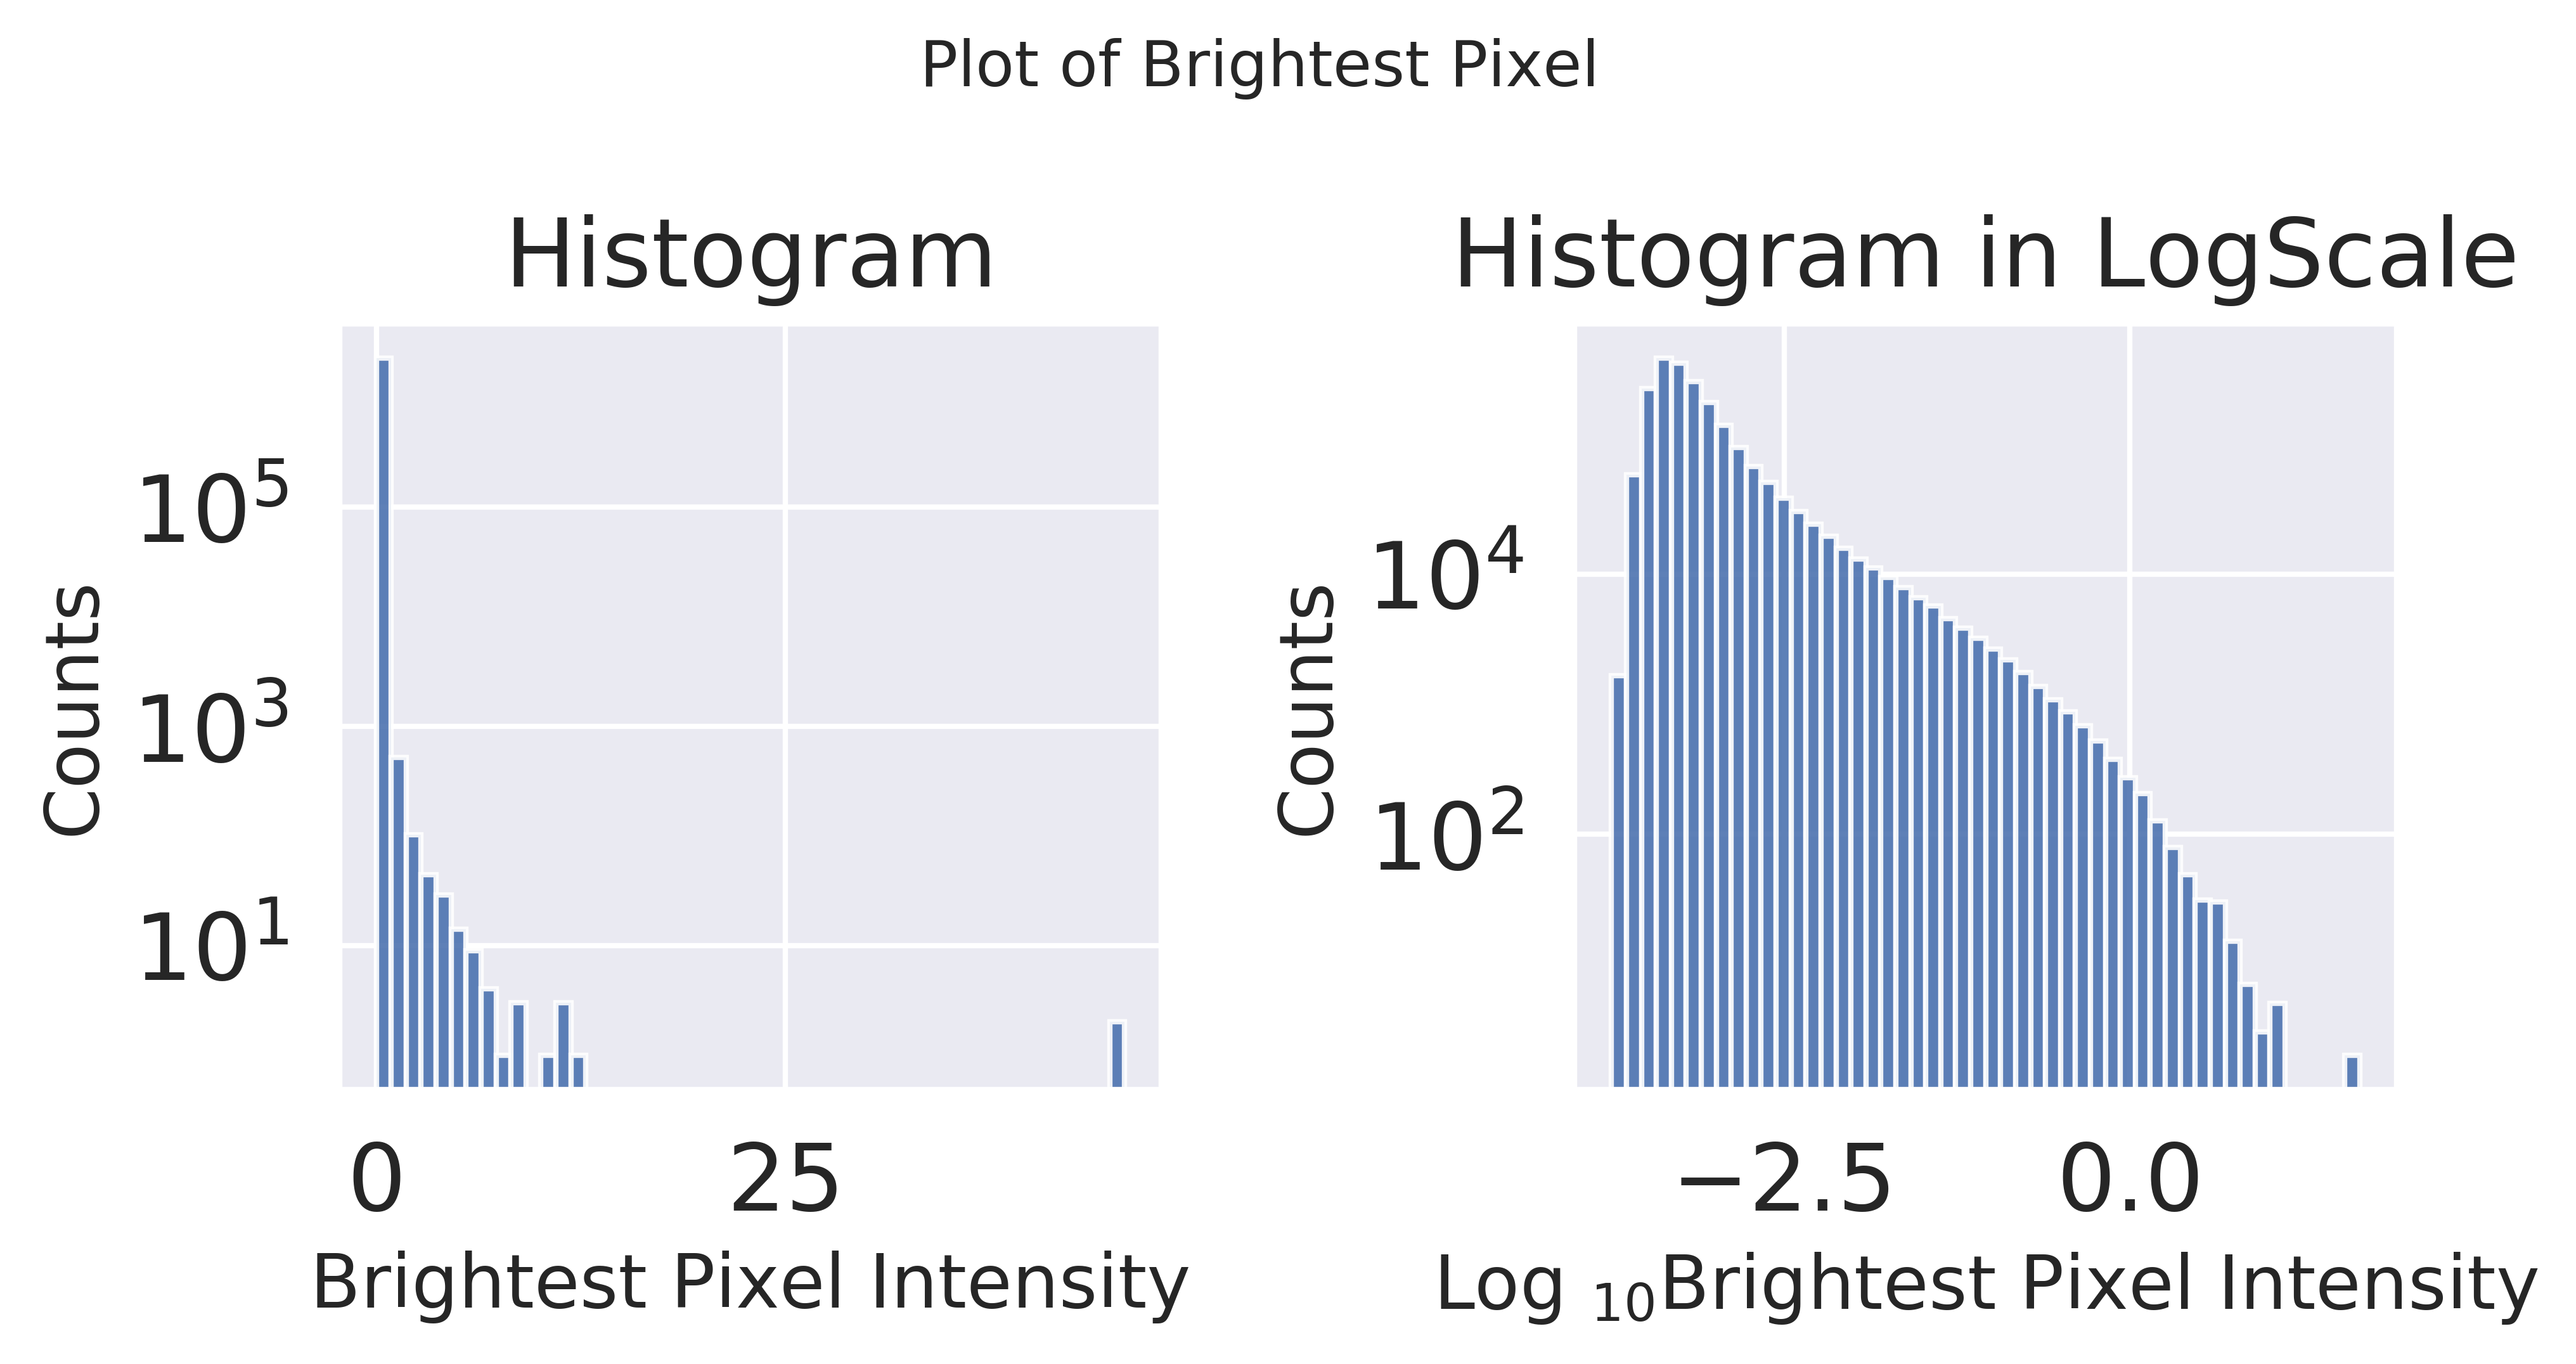

In [226]:
## Changed the y axis for the plots to Log scale
fig_brightestpxlLog = fairplot(data.brightest_pixel, main = "Plot of Brightest Pixel",xlab = "Brightest Pixel Intensity", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set, yscale = ['log','log'], scale_base = 10, label_size = ls)
plt.savefig('BrightestPixels_Log.png')

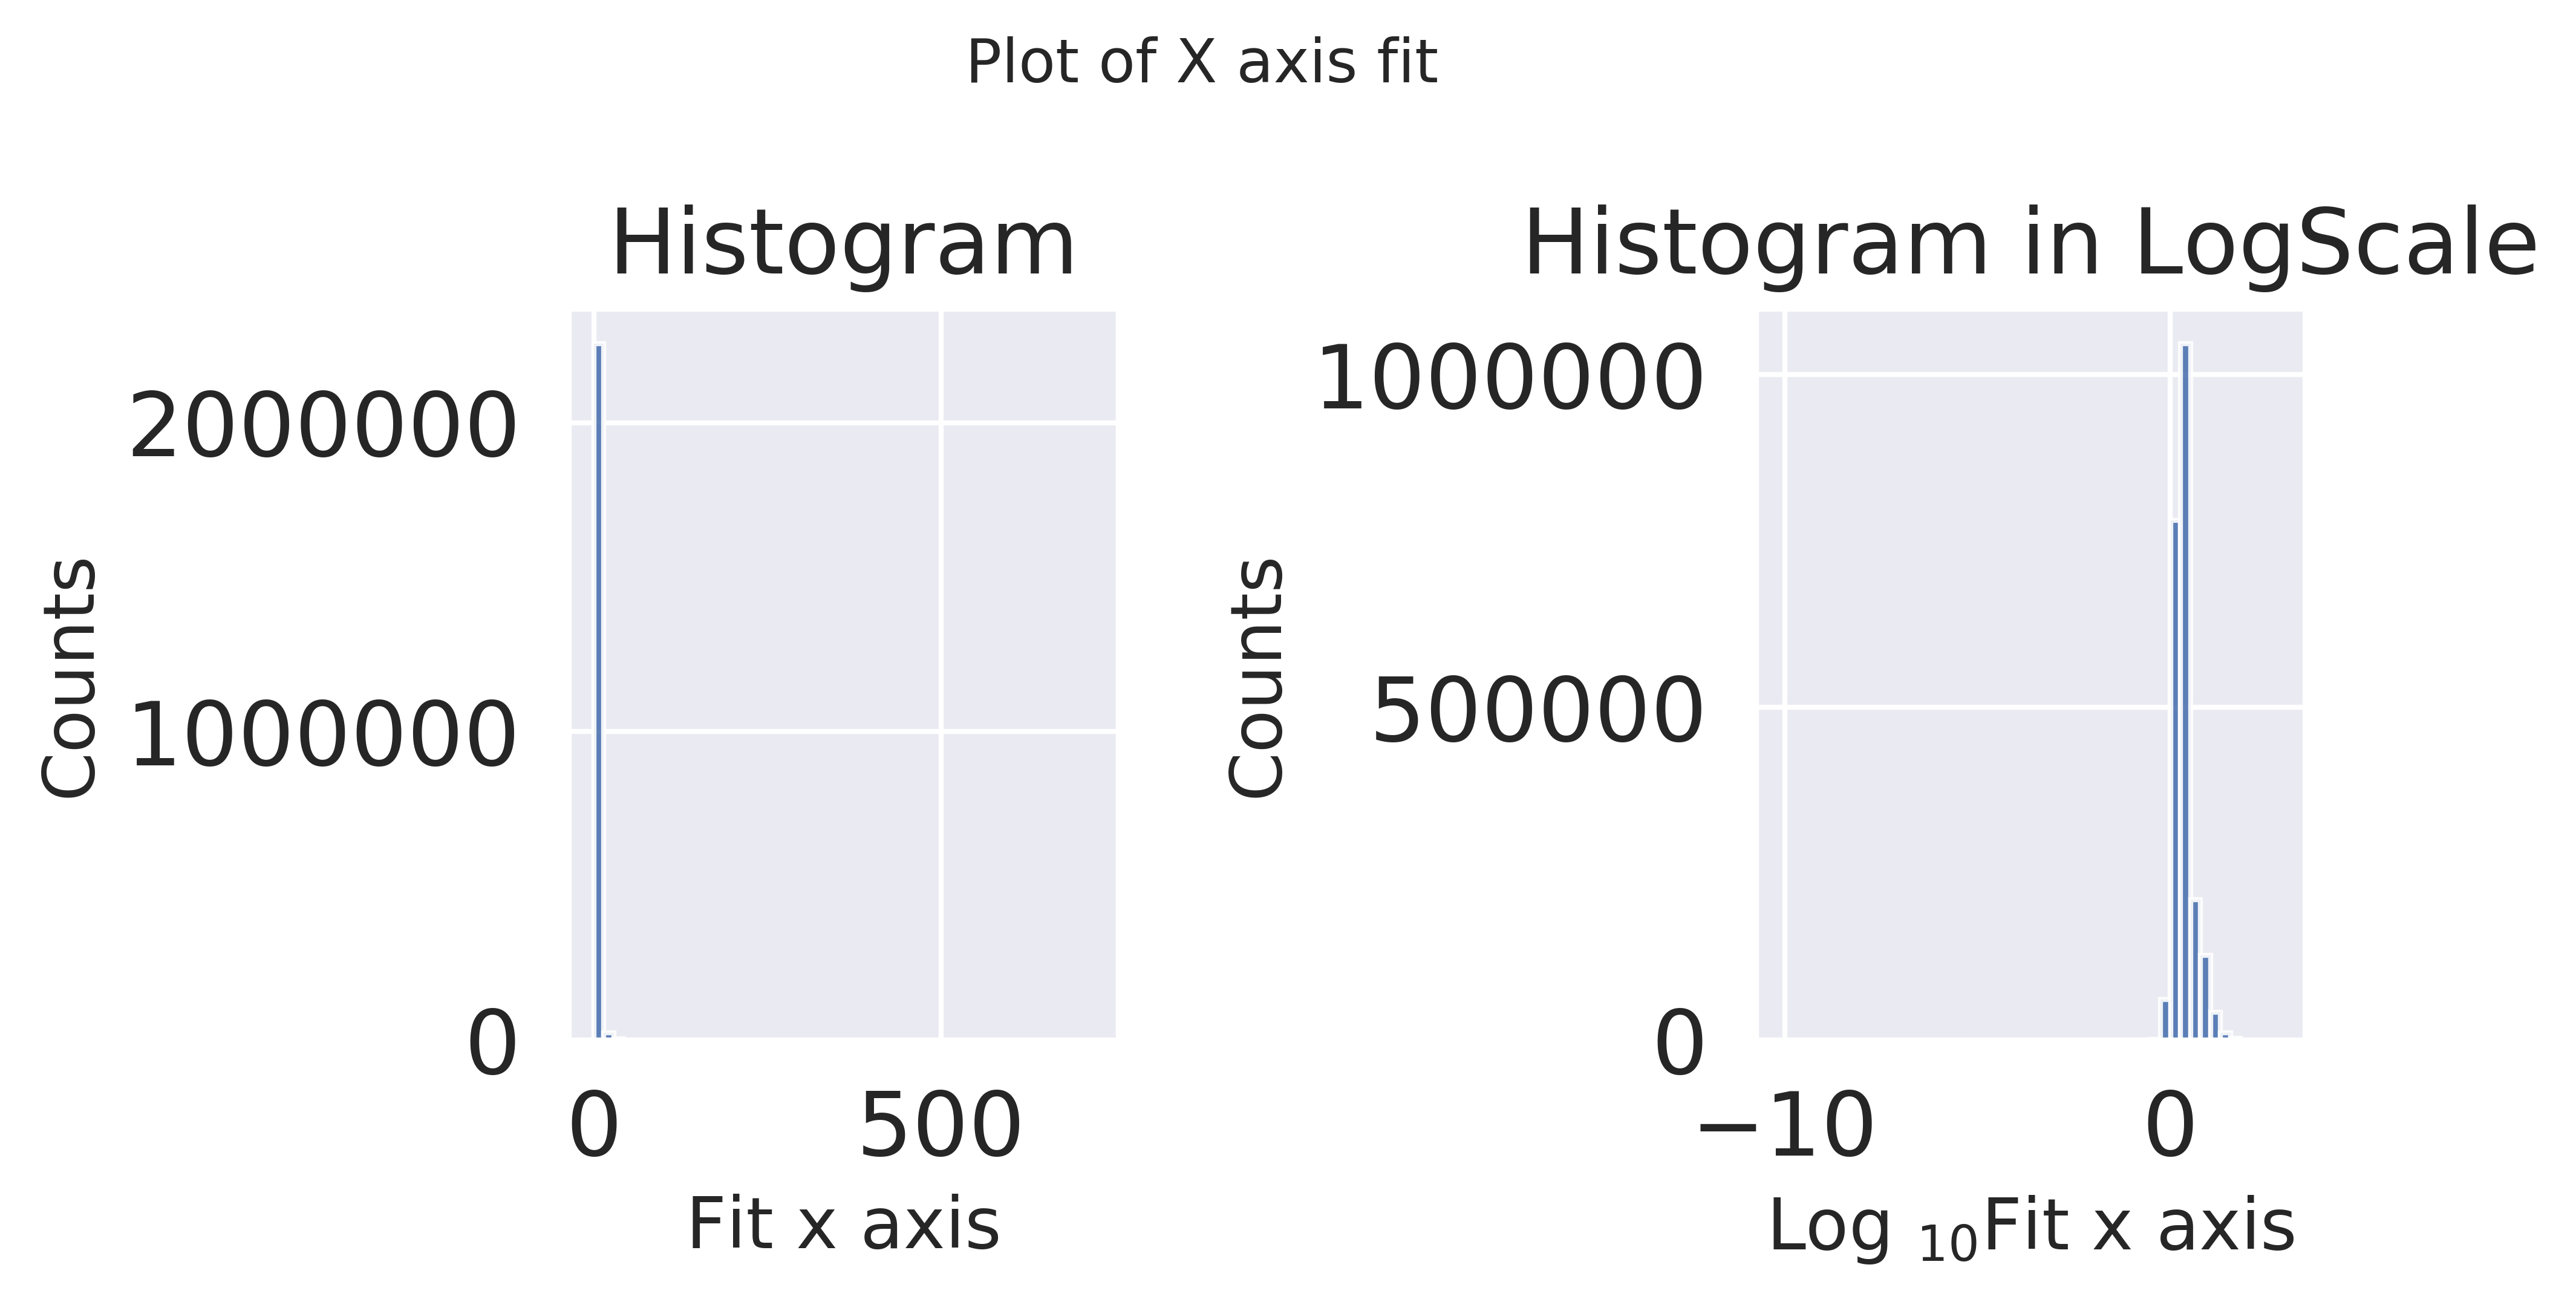

In [227]:
fig_xaxis = fairplot(data.fit_x_axis, main = "Plot of X axis fit",xlab = "Fit x axis", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set, yscale=['linear','linear'], label_size = ls)

plt.savefig('Fit_Xaxis.png')

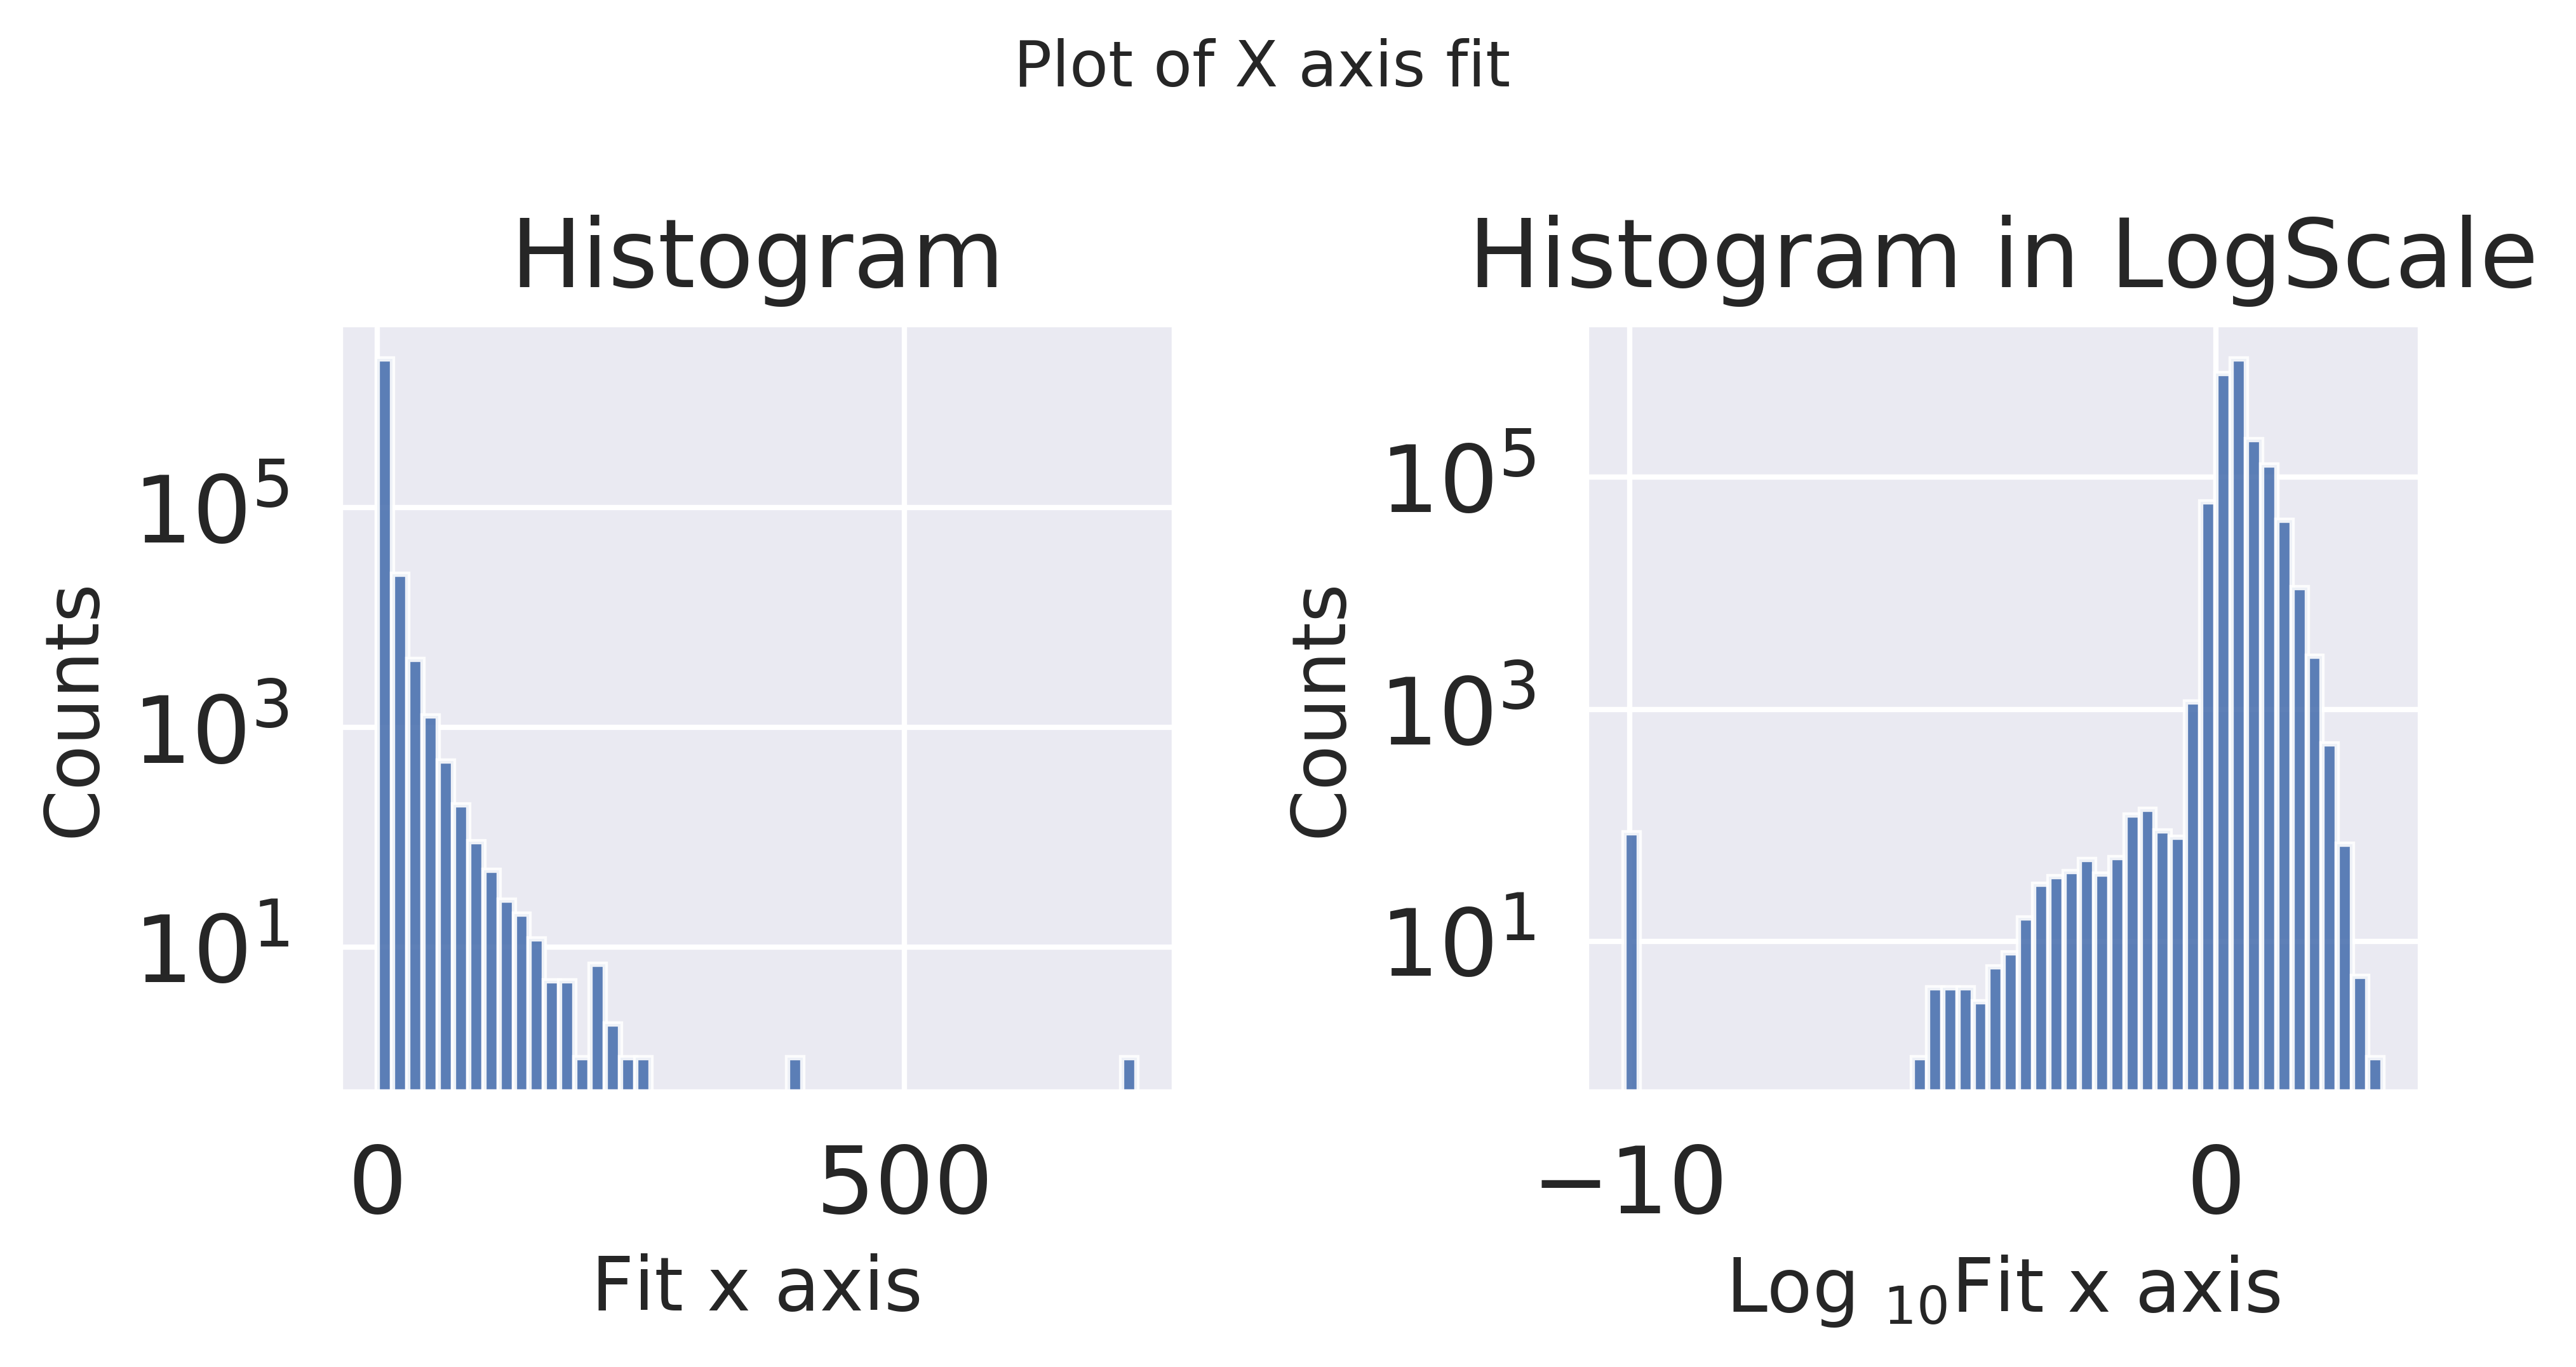

In [228]:
## Changed the y axis for the plots to Log scale
fig_xaxisLog = fairplot(data.fit_x_axis, main = "Plot of X axis fit",xlab = "Fit x axis", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set, yscale = ['log','log'], scale_base = 10, label_size = ls)
plt.savefig('Fit_Xaxis_Log.png')

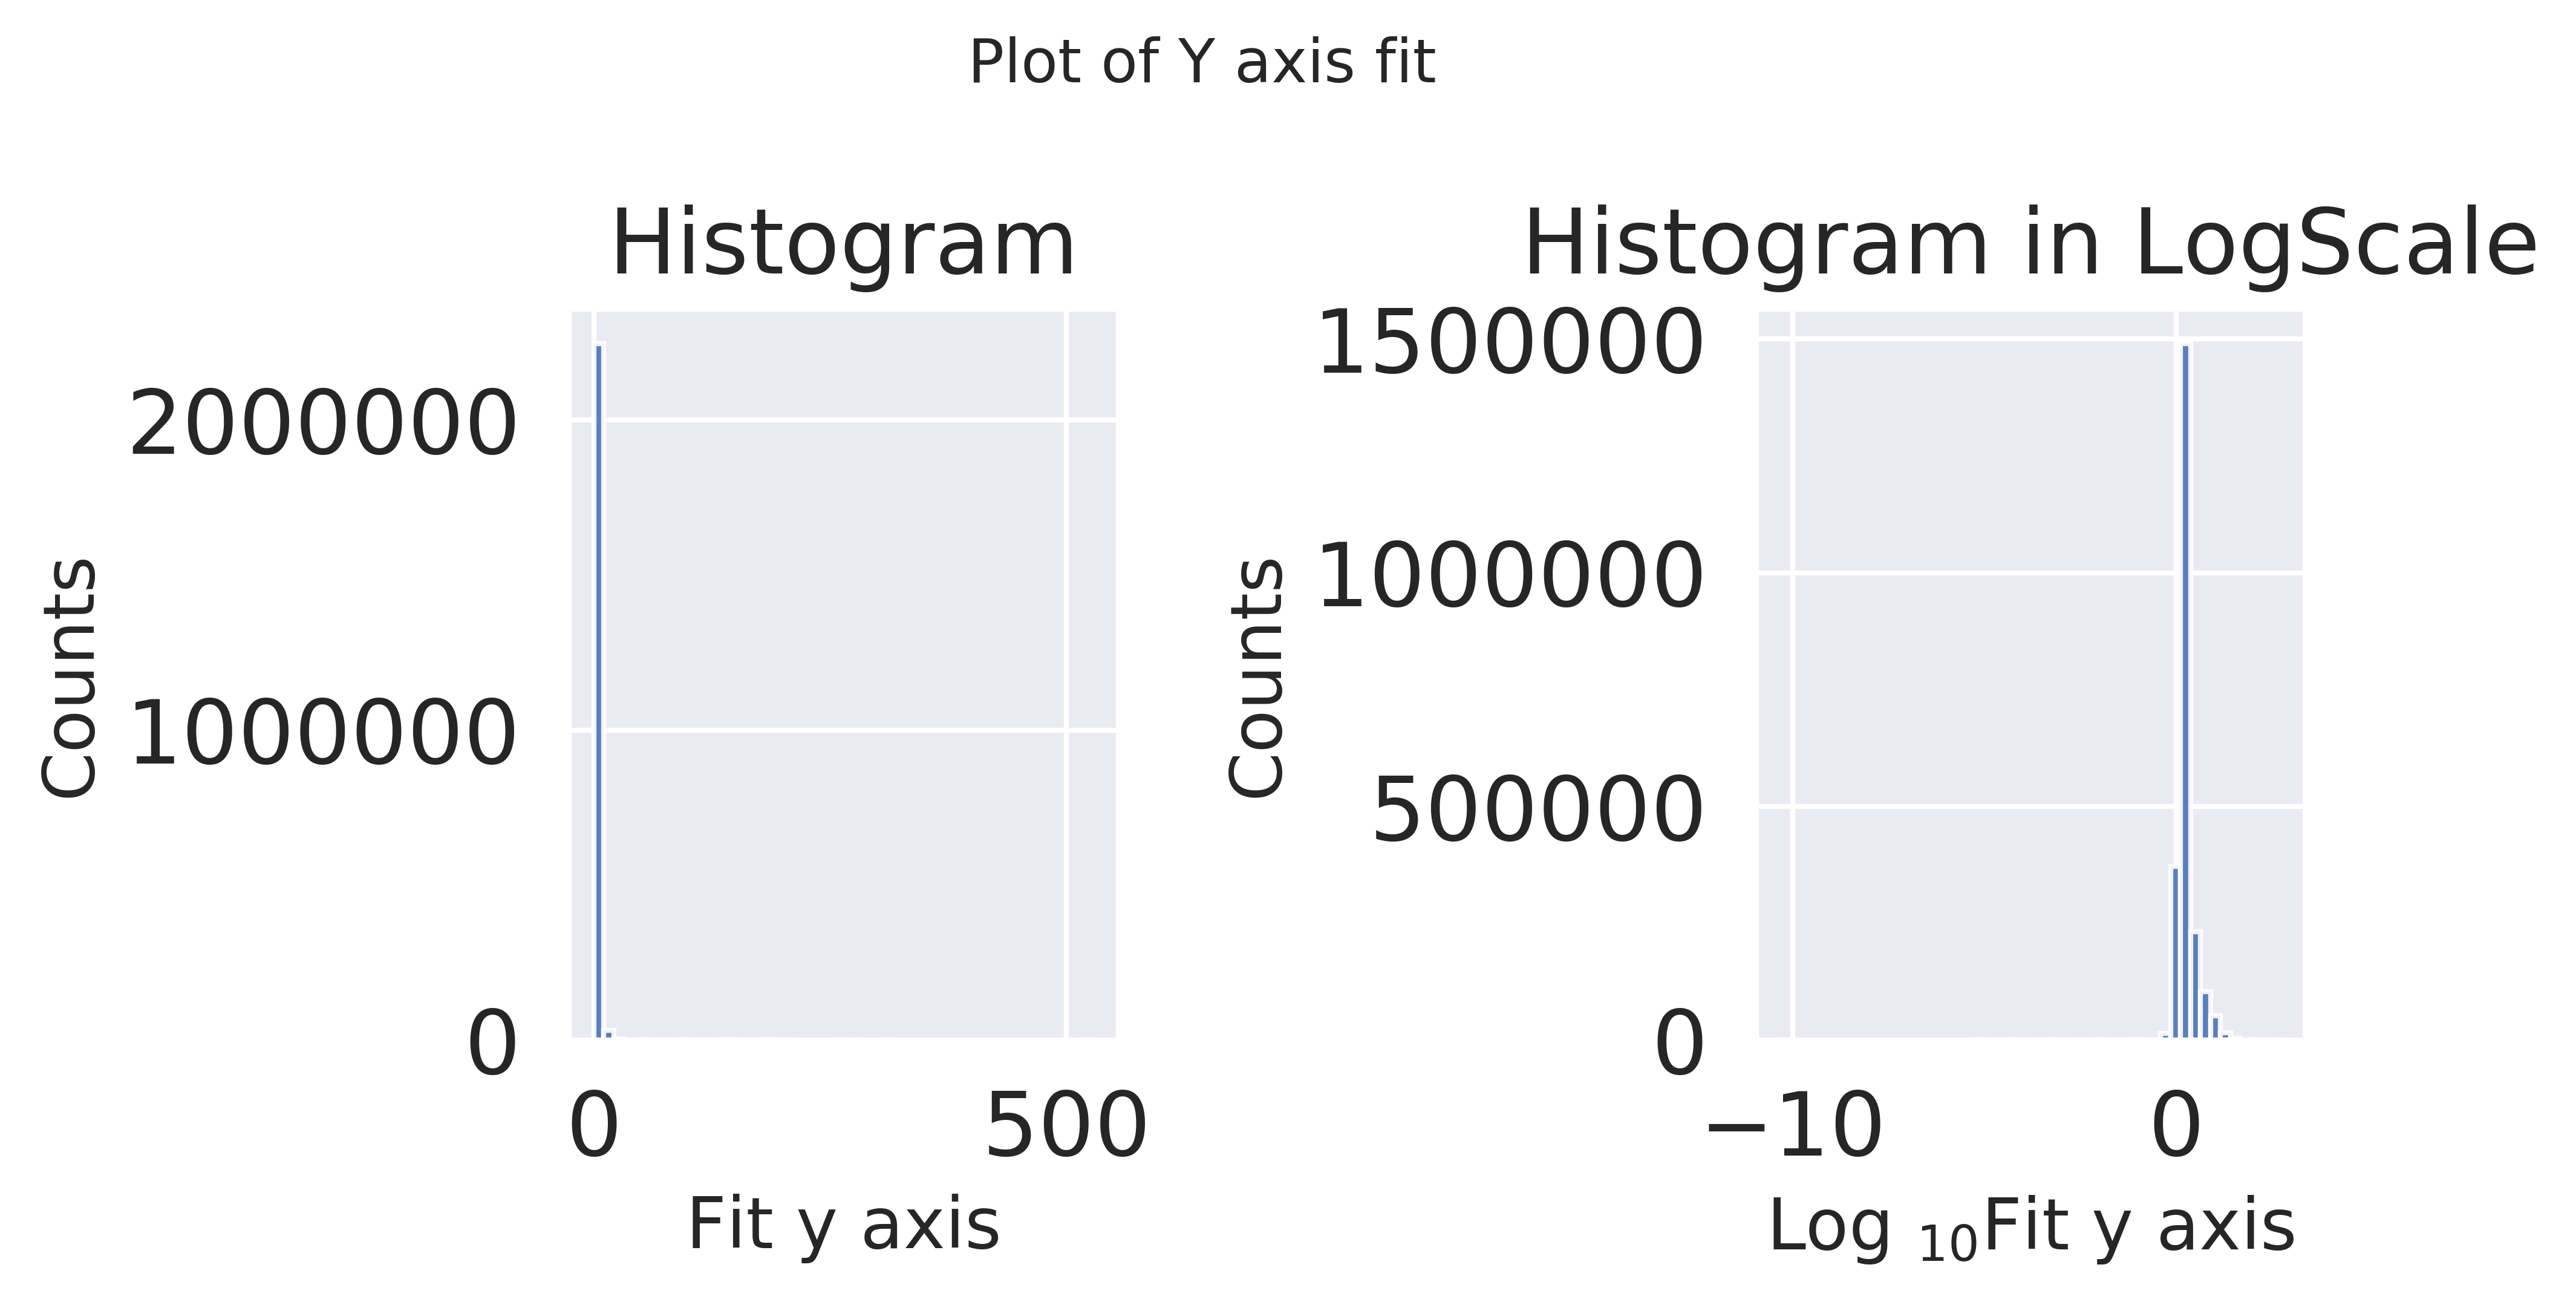

In [229]:
fig_yaxis = fairplot(data.fit_y_axis, main = "Plot of Y axis fit", 
                             xlab = "Fit y axis", ylab = "Counts", dpi=dpi_set, kde=[False,False], label_size = ls)
plt.savefig('Fit_Yaxis.png')

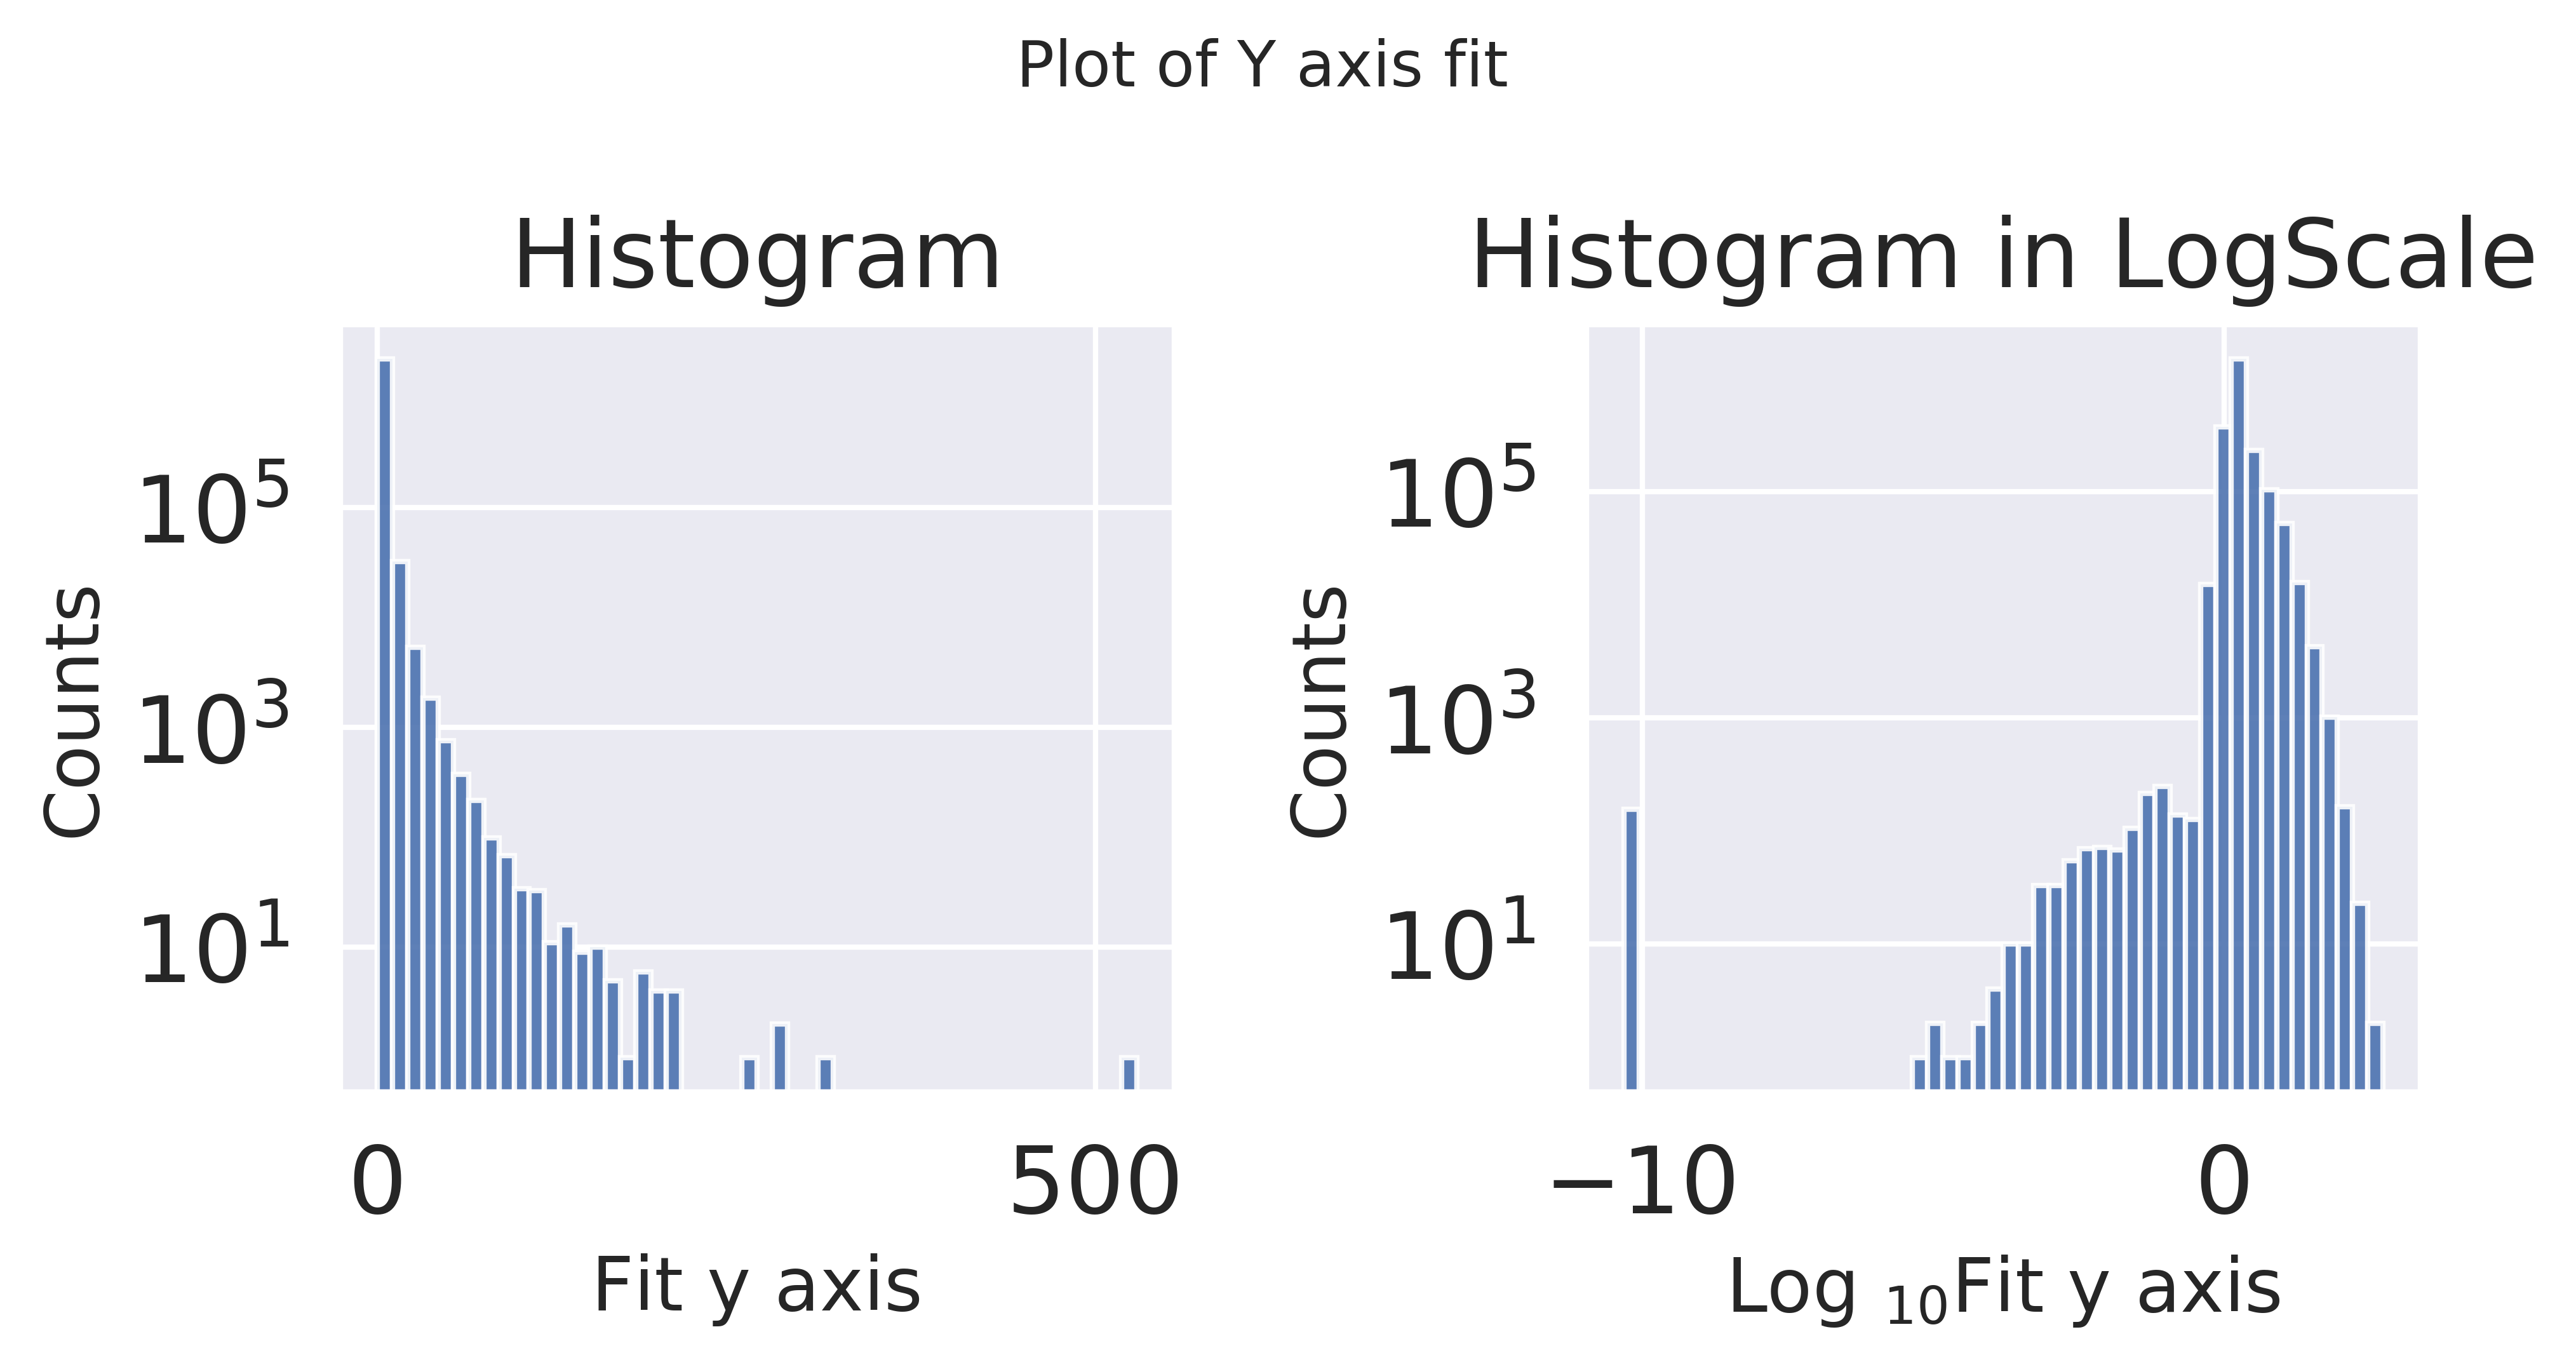

In [230]:
fig_yaxisLog = fairplot(data.fit_y_axis, main = "Plot of Y axis fit", kde=[False,False], label_size = ls,
                             xlab = "Fit y axis", ylab = "Counts", dpi=dpi_set, yscale = ['log','log'], scale_base = 10)
plt.savefig('Fit_Yaxis_Log.png')

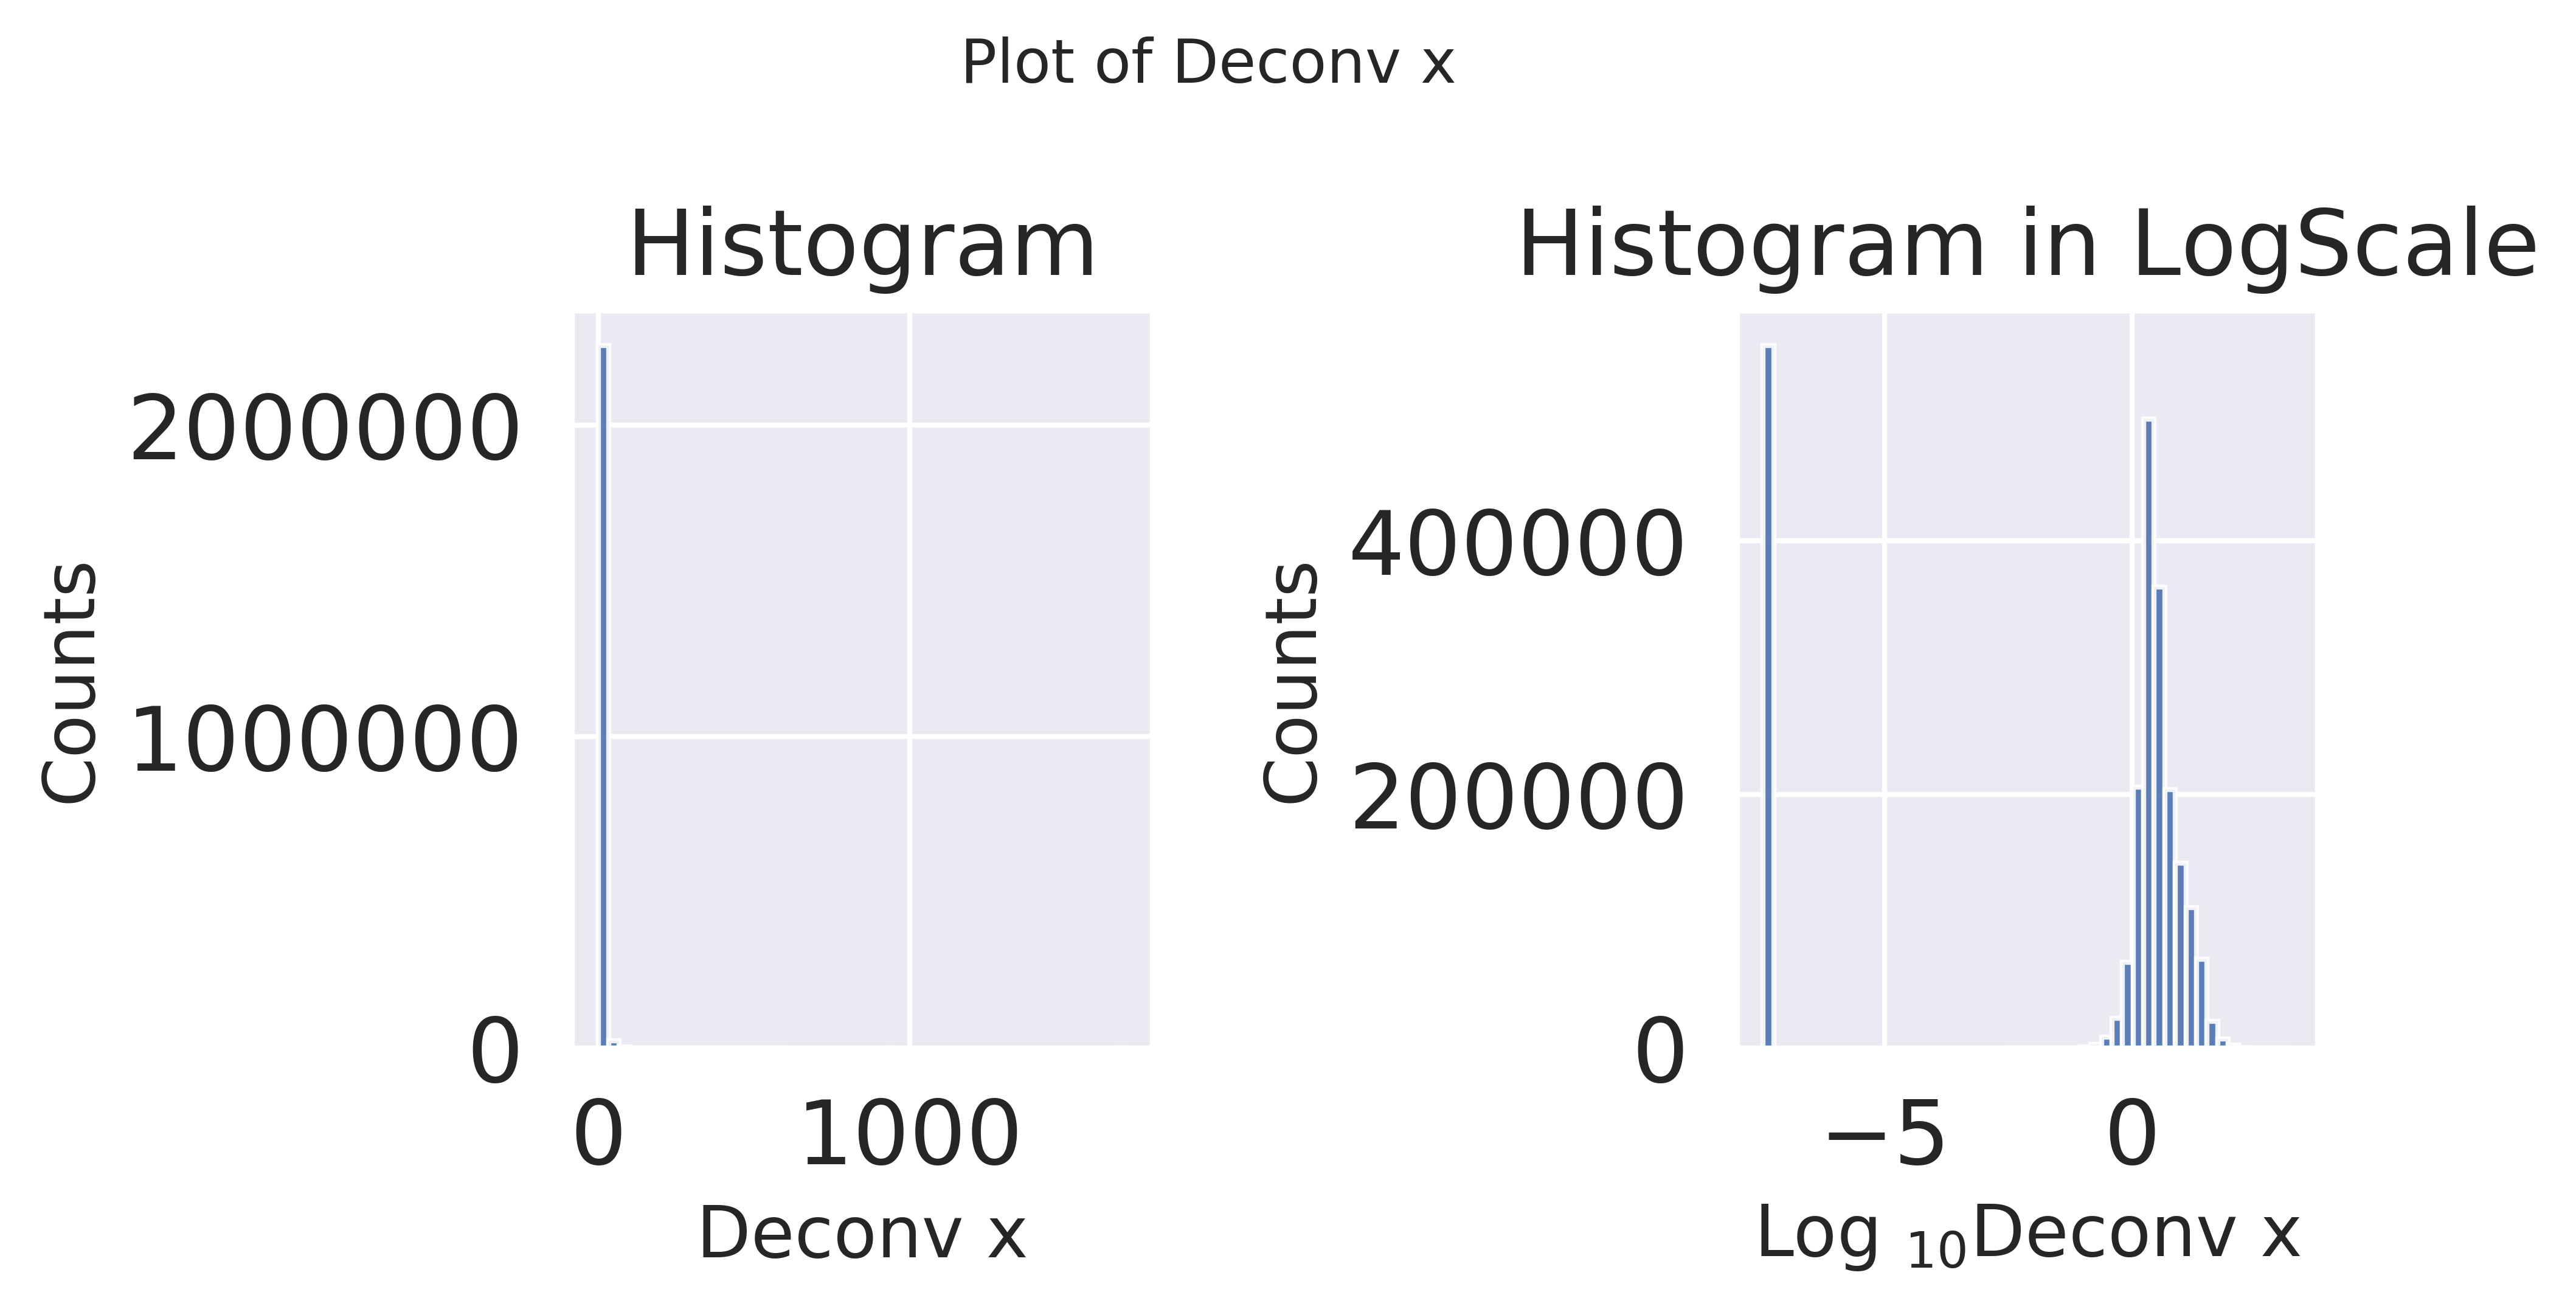

In [231]:
fig_Deconvx = fairplot(data.deconv_x, main = "Plot of Deconv x", kde=[False,False], label_size = ls,
                             xlab = "Deconv x", ylab = "Counts", dpi=dpi_set)
plt.savefig('Deconv_X.png')

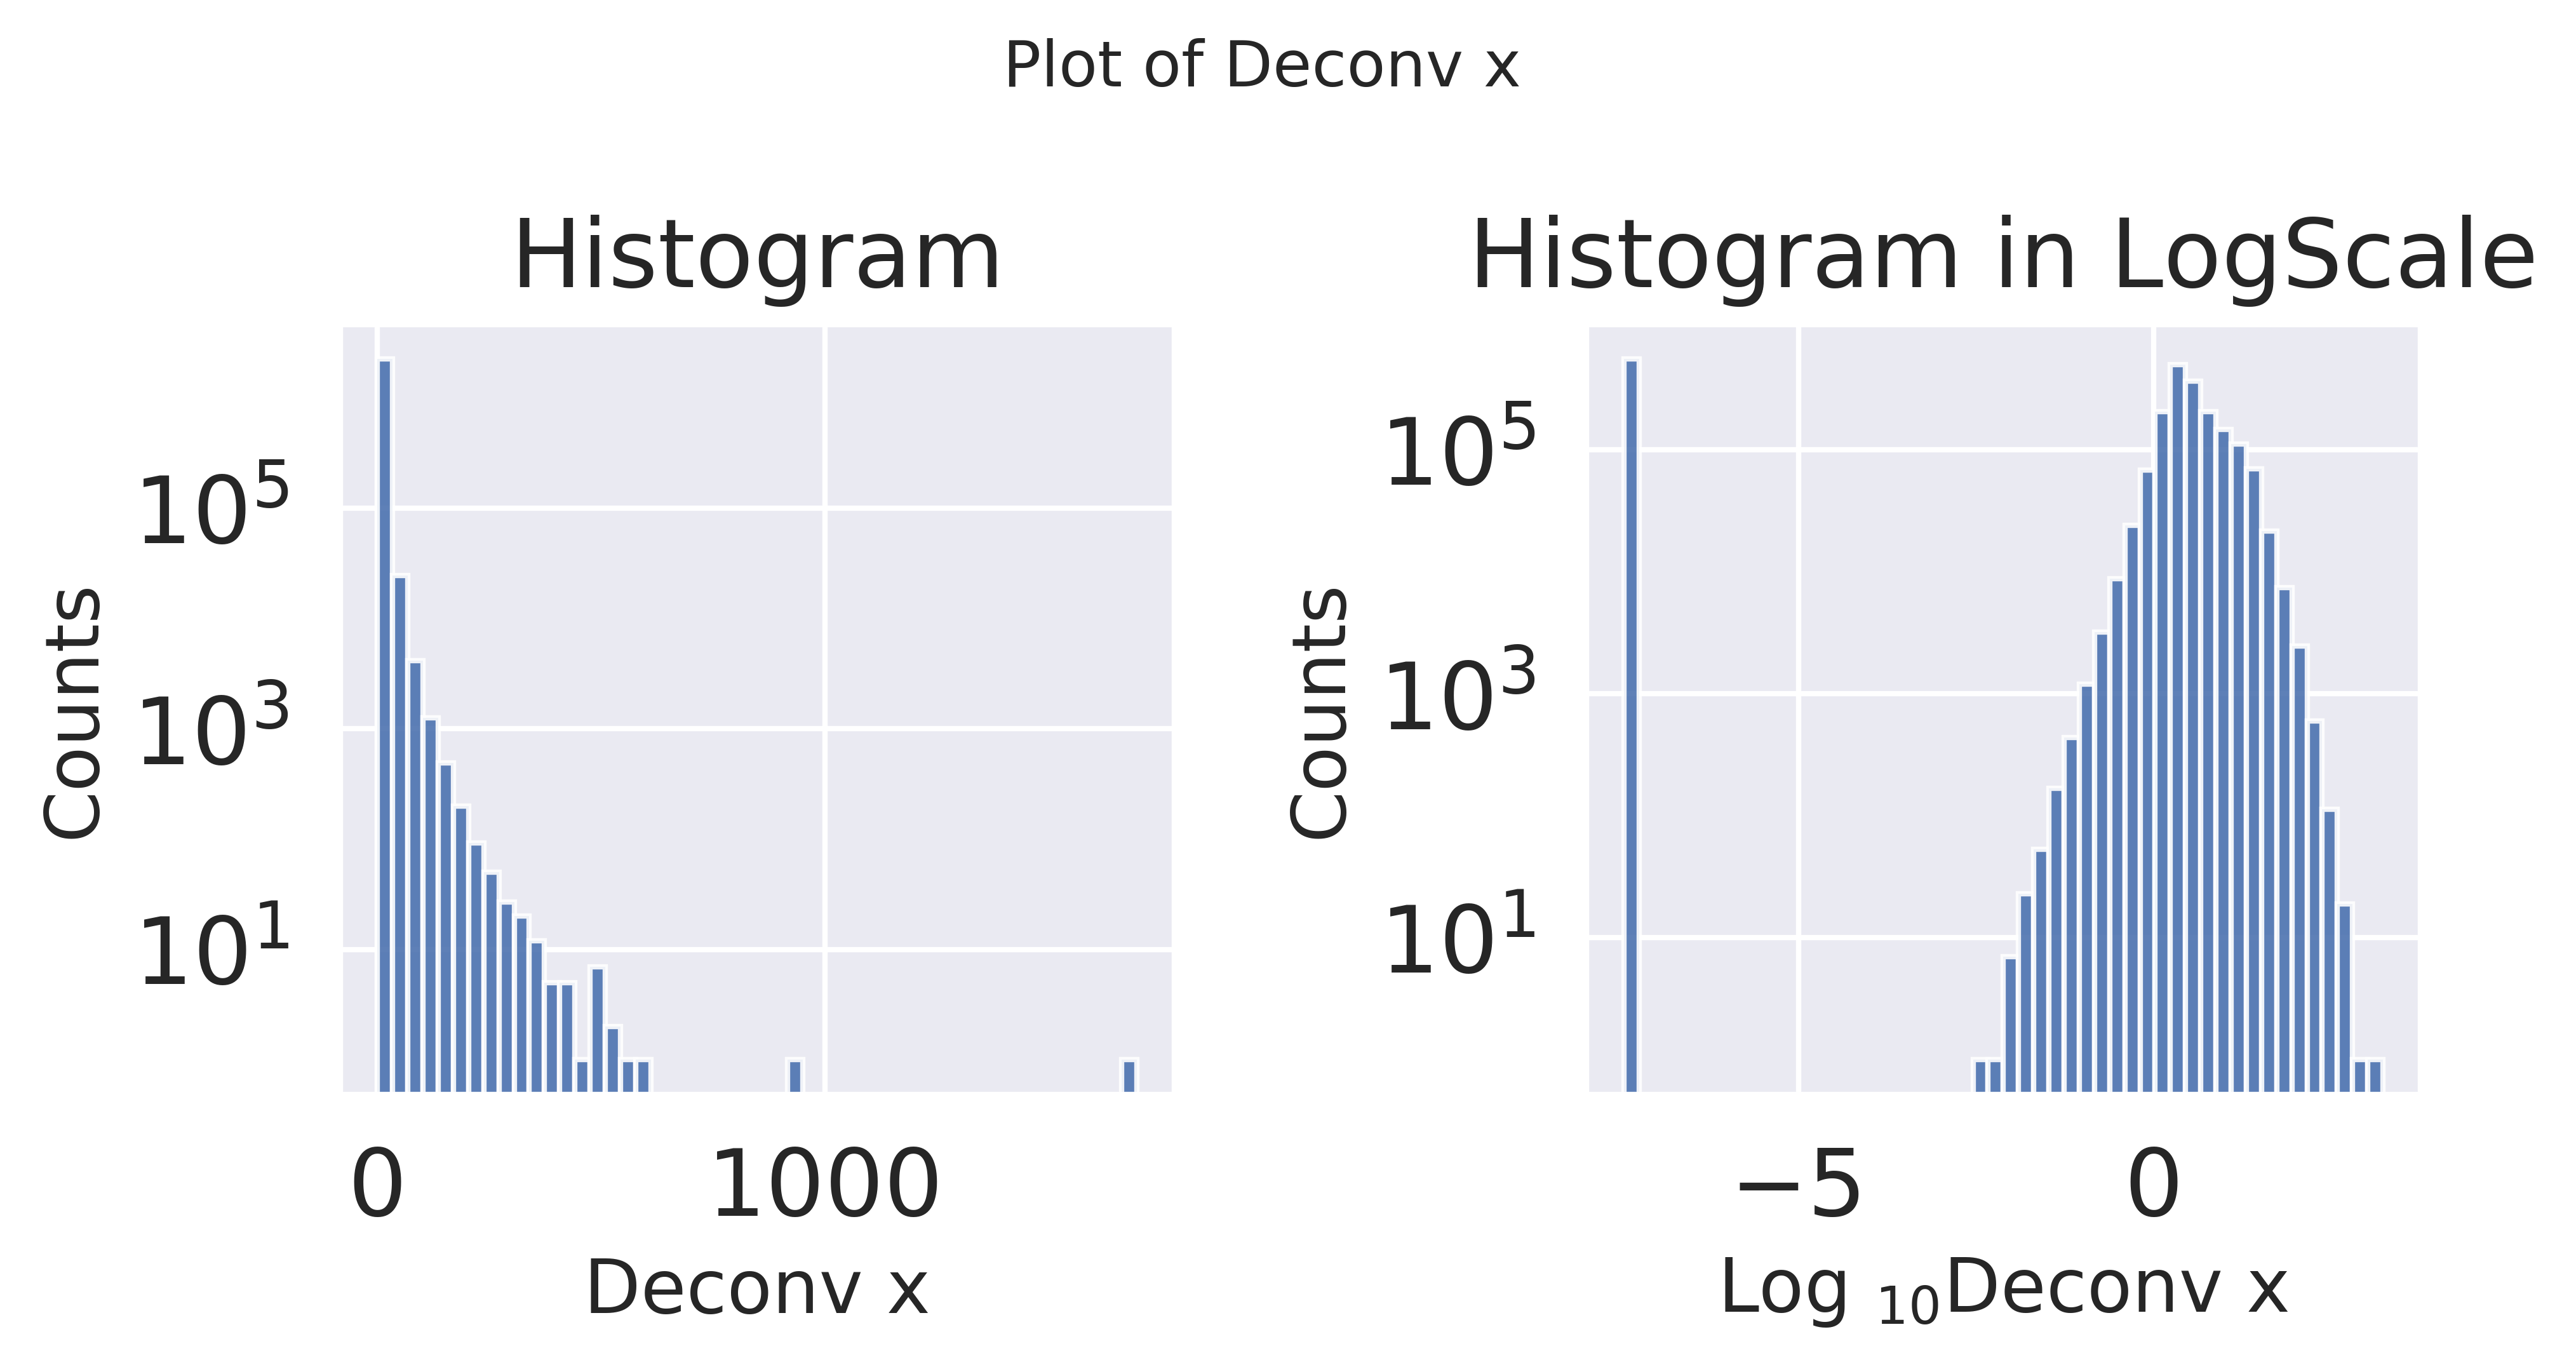

In [232]:
fig_DeconvxLog = fairplot(data.deconv_x, main = "Plot of Deconv x", kde=[False,False], label_size = ls,
                             xlab = "Deconv x", ylab = "Counts", dpi=dpi_set, yscale = ['log','log'], scale_base = 10)
plt.savefig('Deconv_X_Log.png')

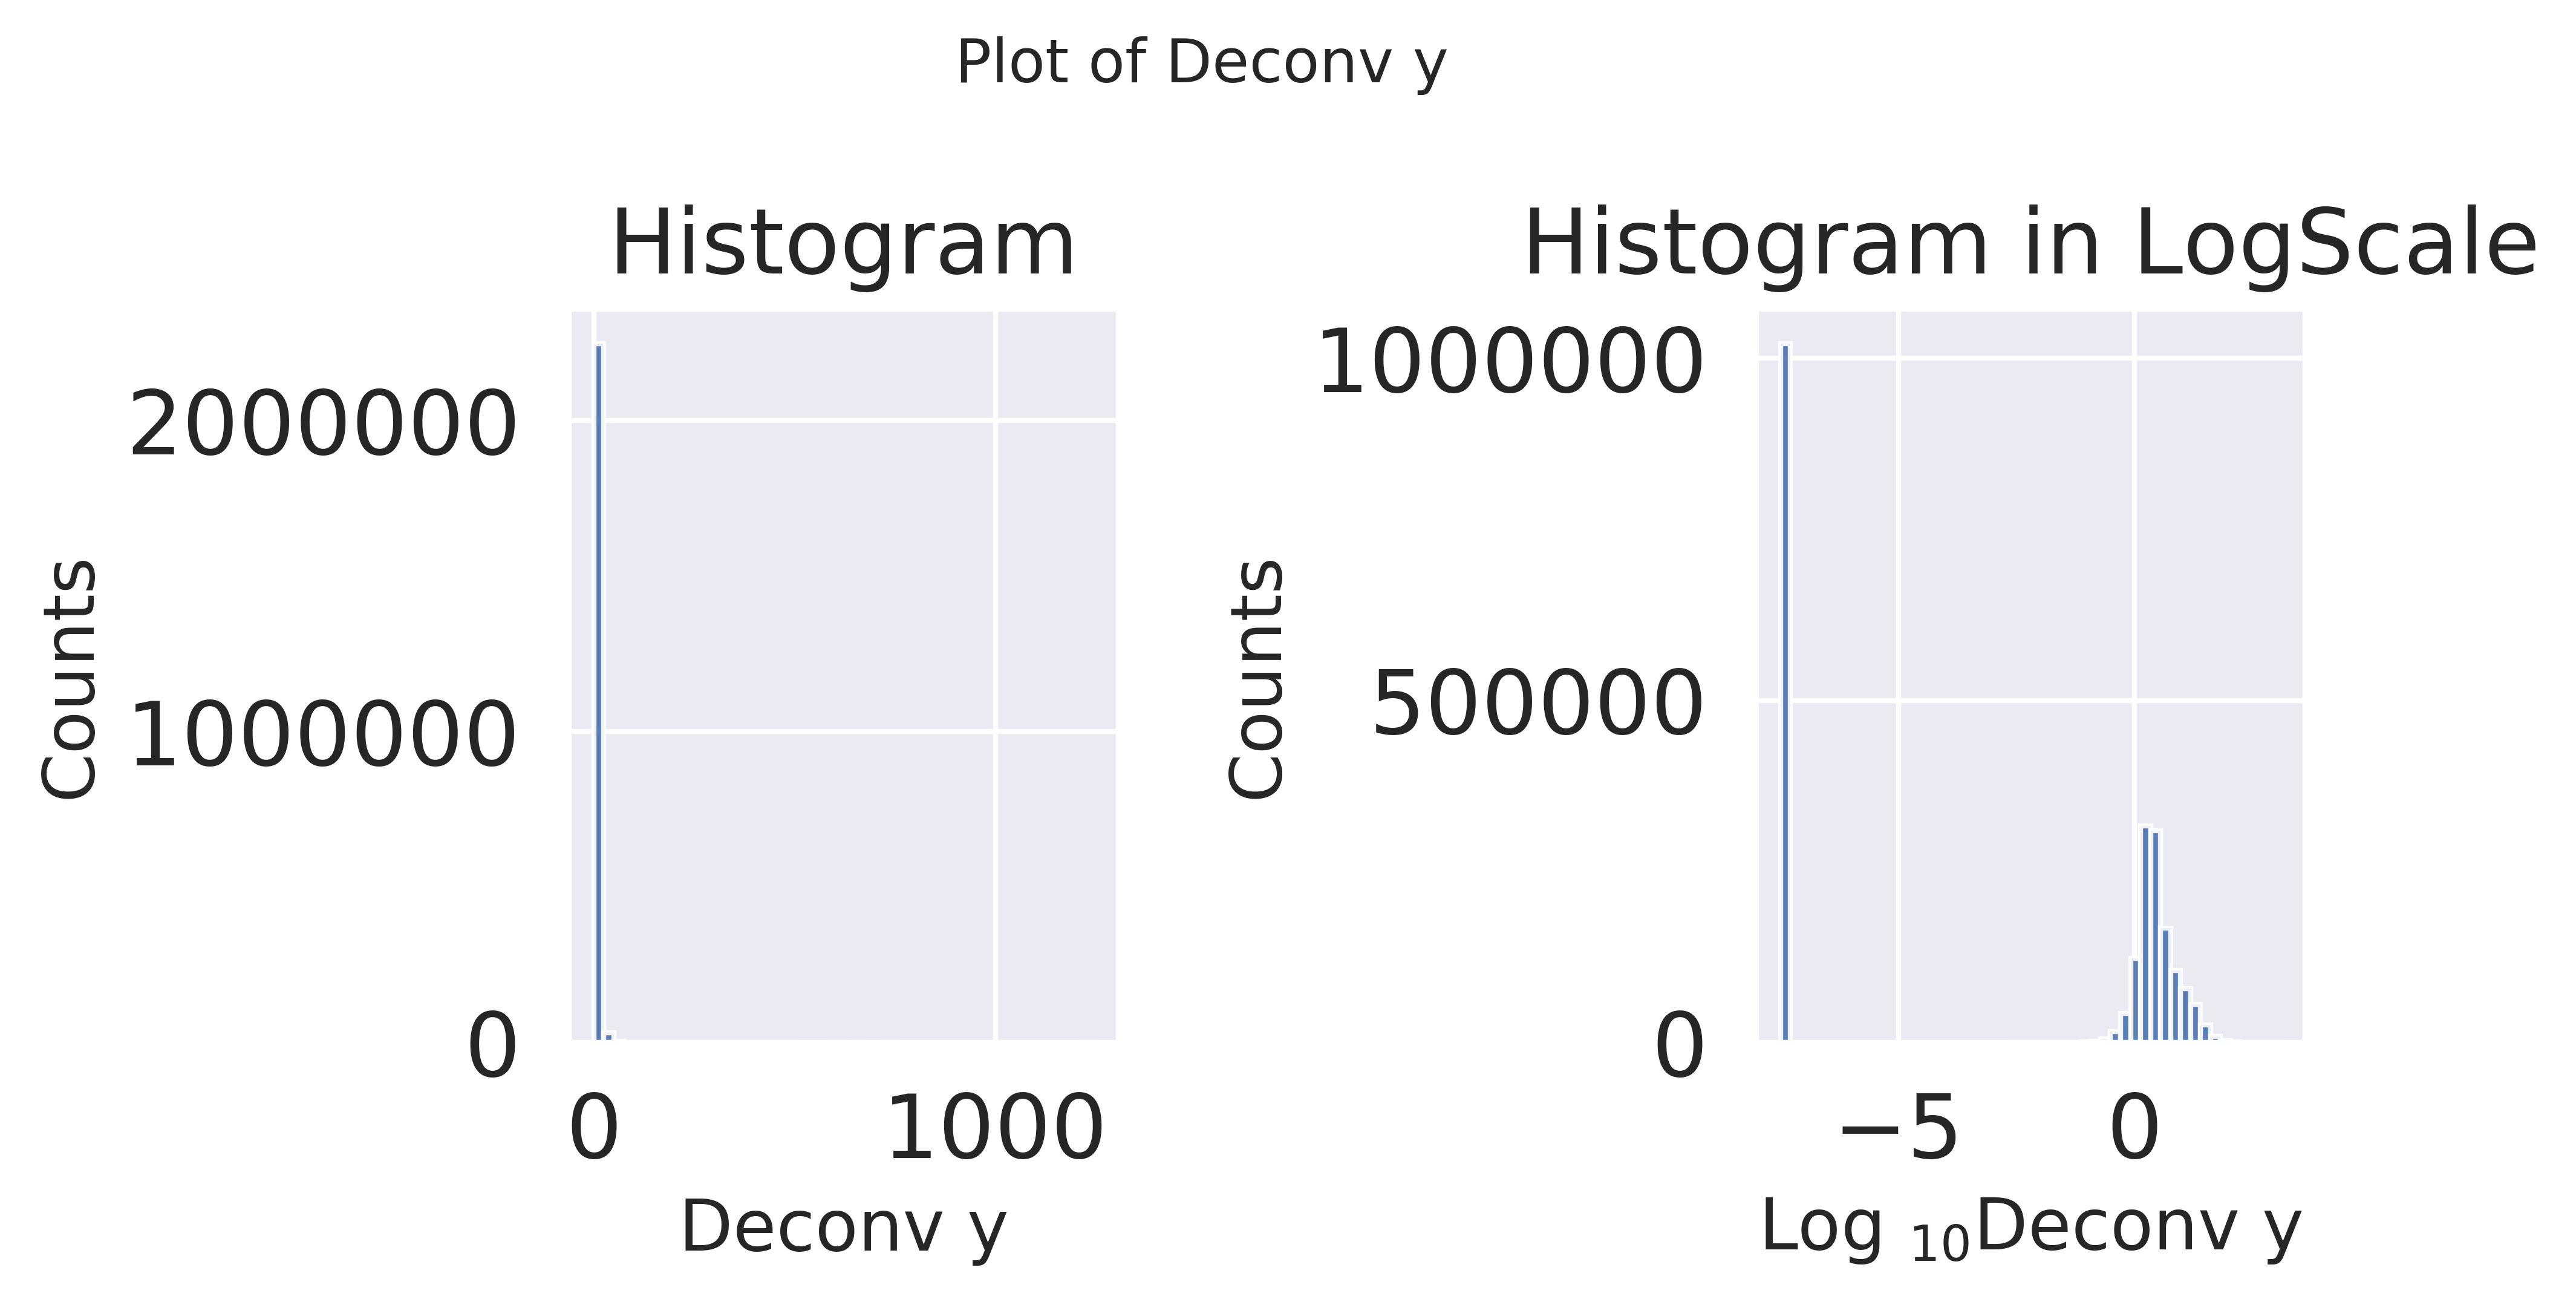

In [233]:
fig_Deconvy = fairplot(data.deconv_y, main = "Plot of Deconv y", kde=[False,False], label_size = ls,
                             xlab = "Deconv y", ylab = "Counts", dpi=dpi_set)
plt.savefig('Deconv_Y.png')

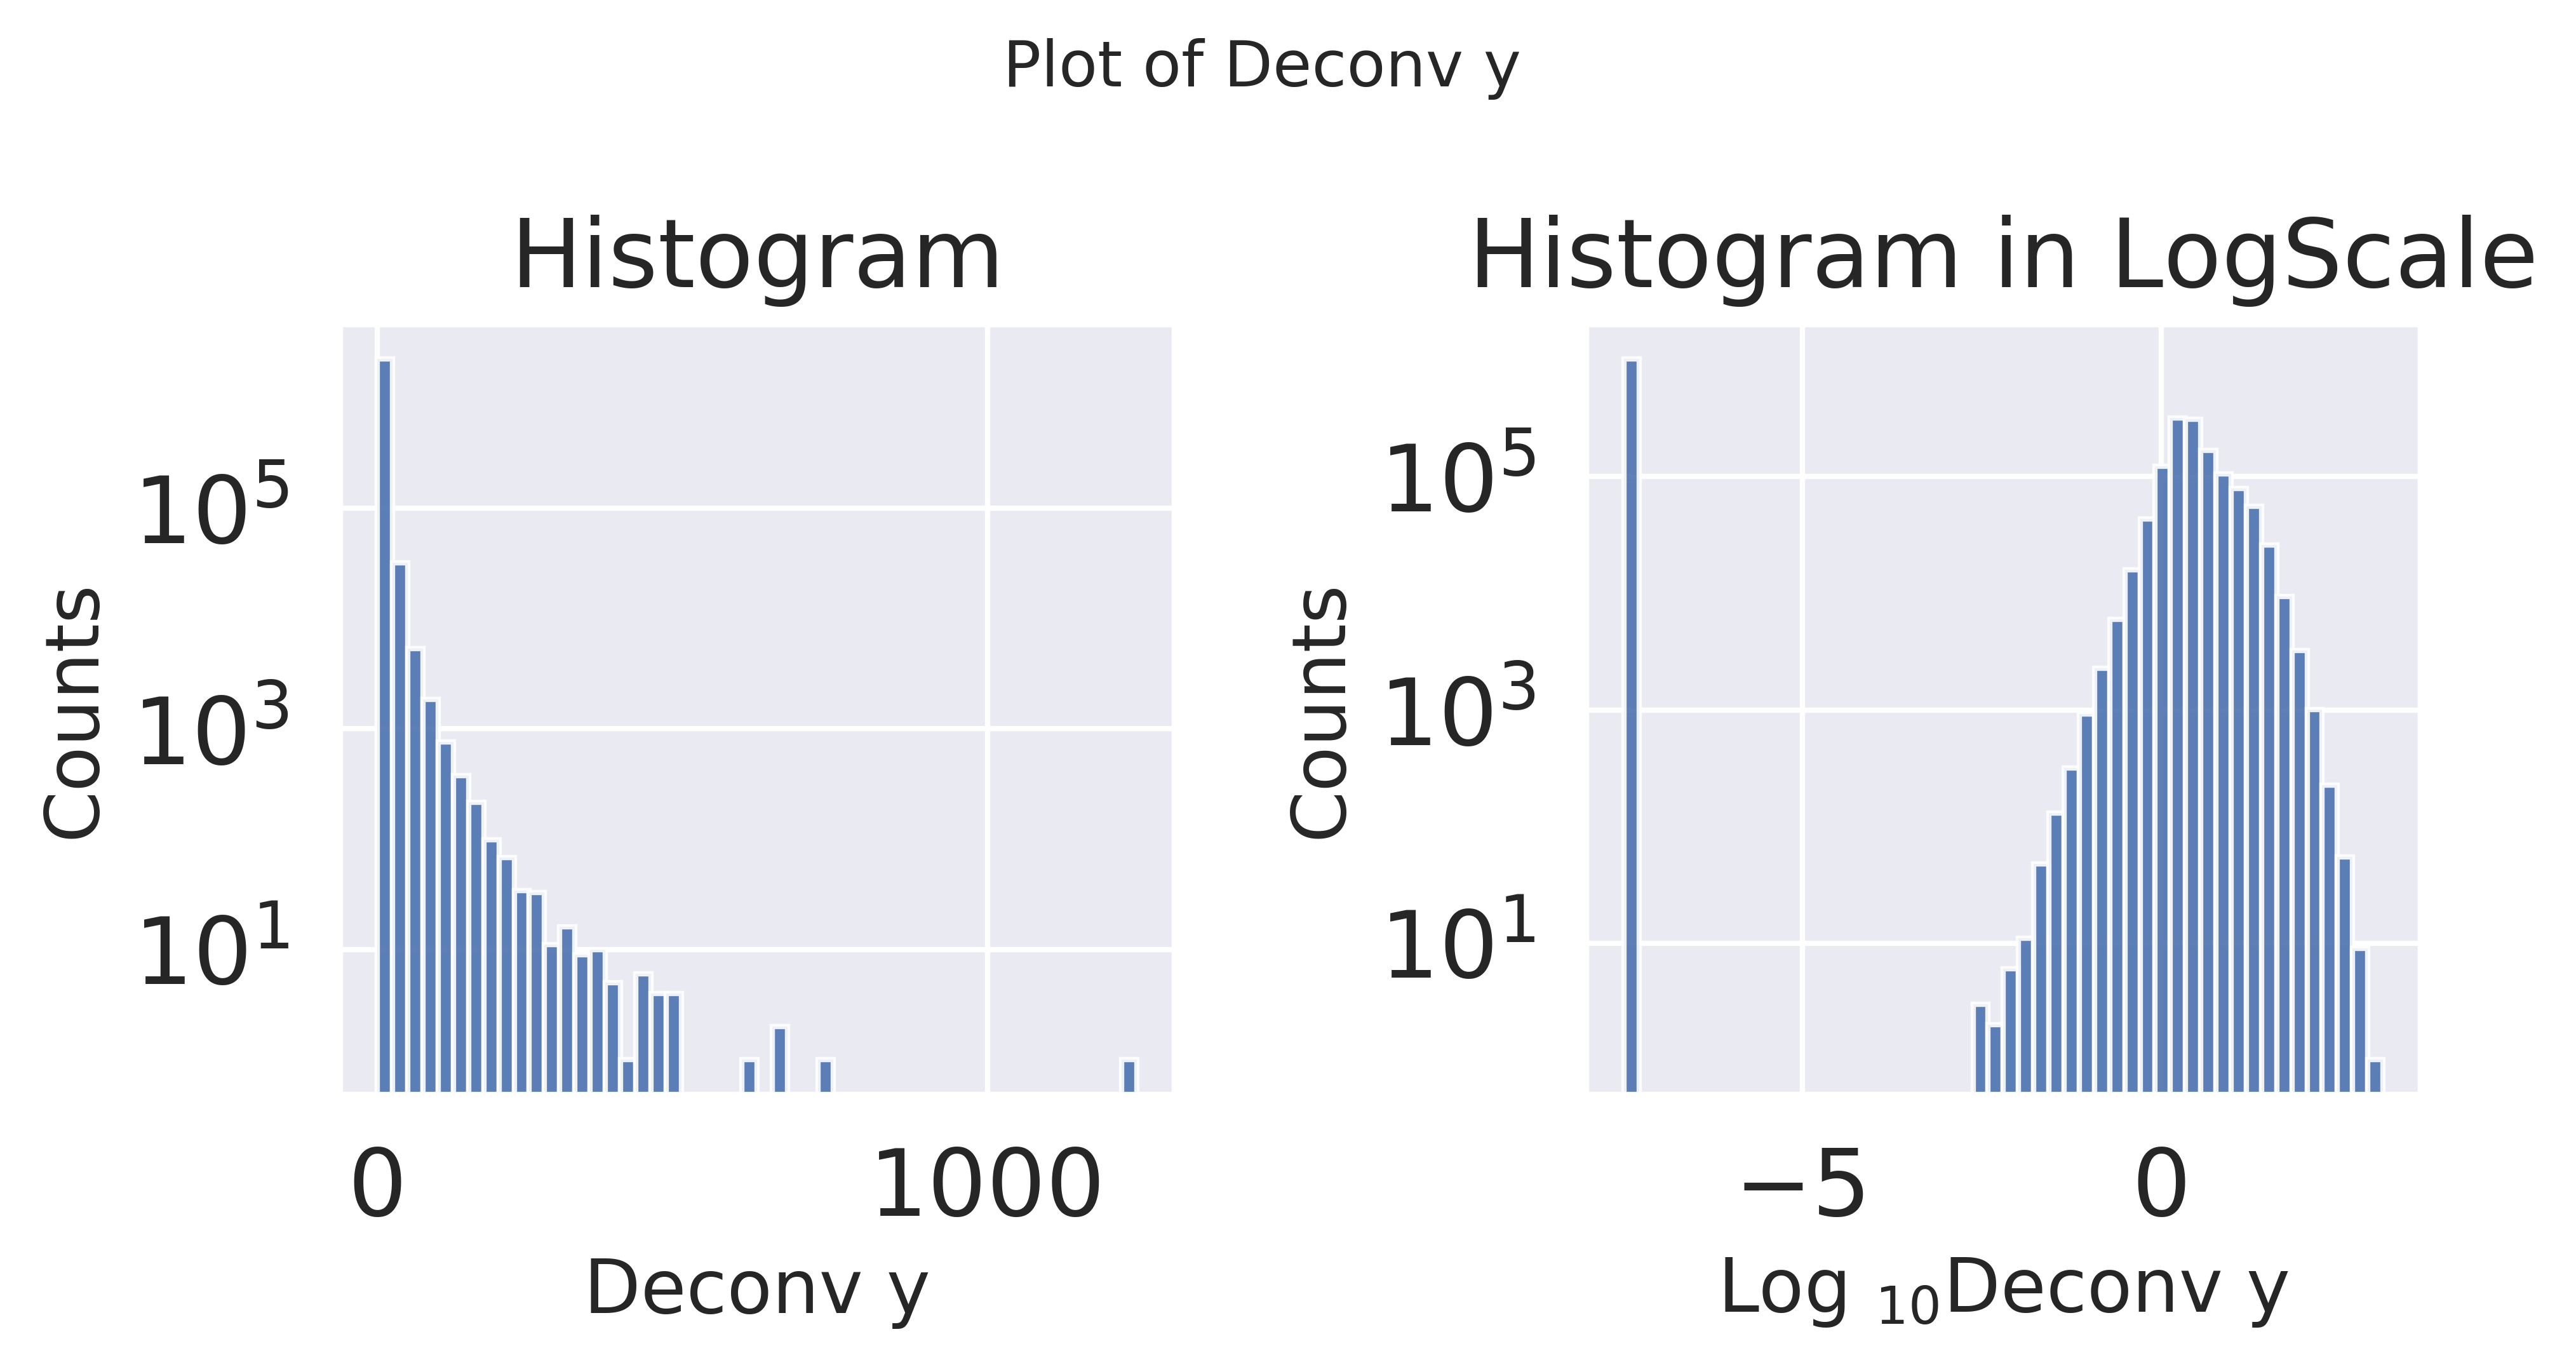

In [234]:
fig_DeconvyLog = fairplot(data.deconv_y, main = "Plot of Deconv y", kde=[False,False], label_size = ls,
                             xlab = "Deconv y", ylab = "Counts", dpi=dpi_set, yscale = ['log','log'], scale_base = 10)
plt.savefig('Deconv_Y_Log.png')

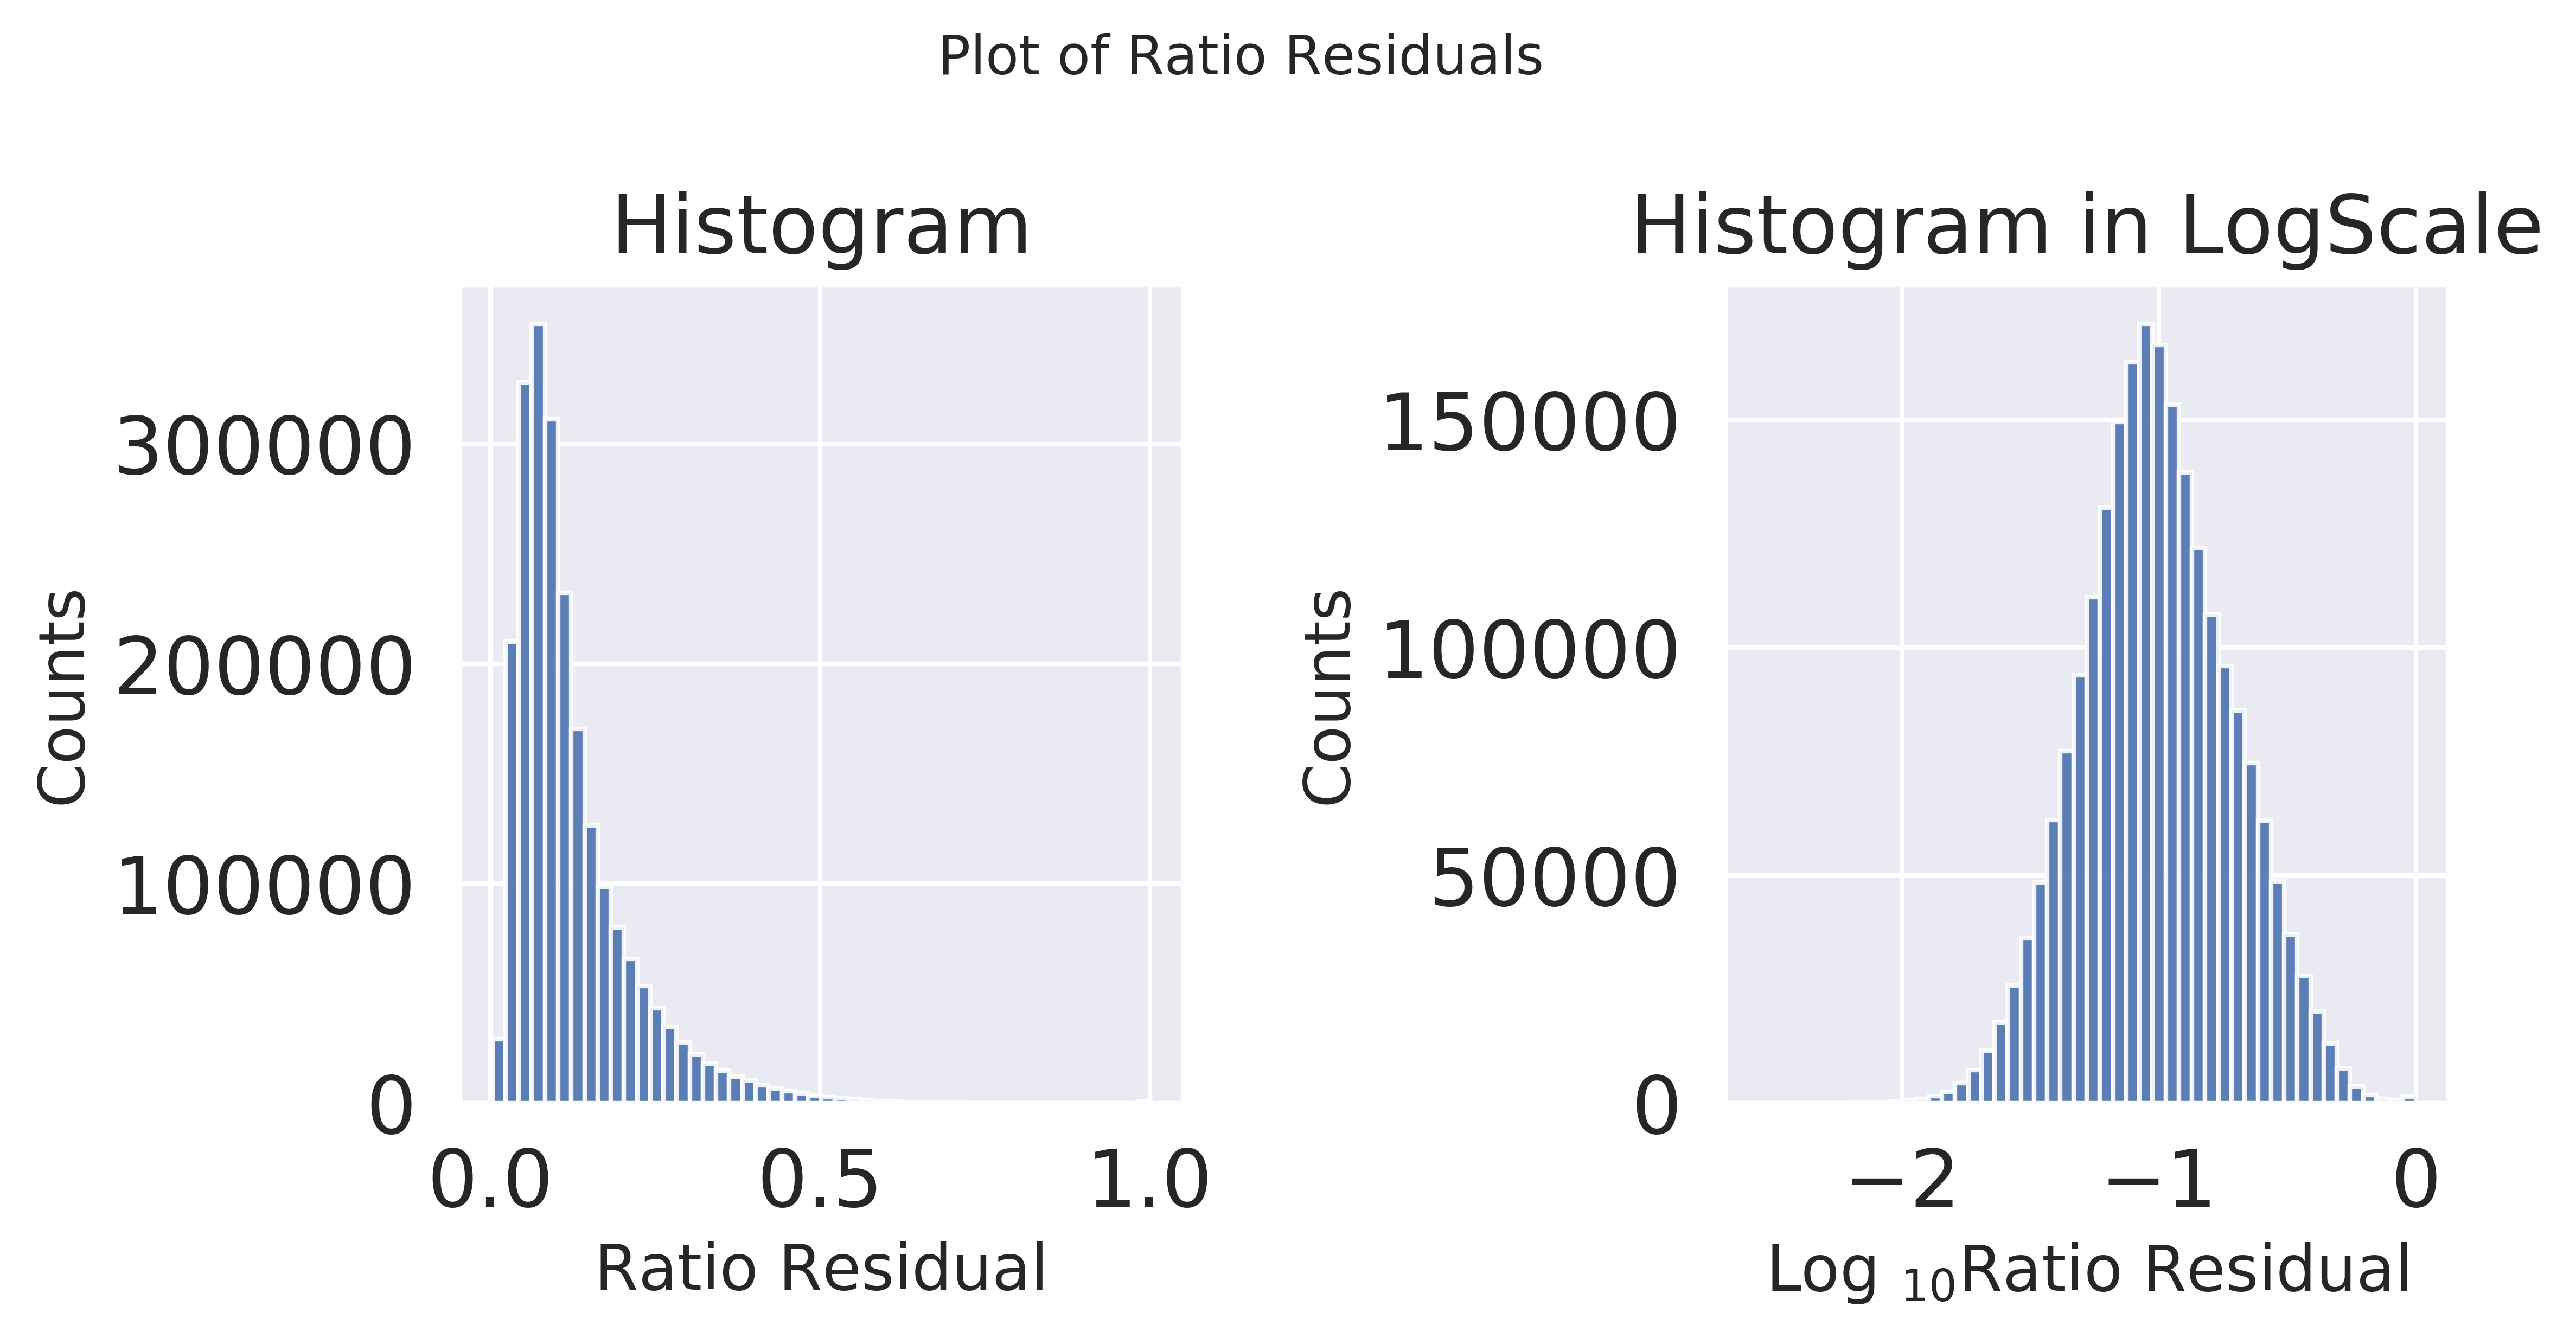

In [253]:
fig_RatioResidual = fairplot(data.ratio_residual, main = "Plot of Ratio Residuals", xlab = "Ratio Residual", ylab = "Counts", 
                       kde=[False,False], dpi=dpi_set, label_size = ls,figsize=(8,4))
plt.savefig('RatioResidual.png')

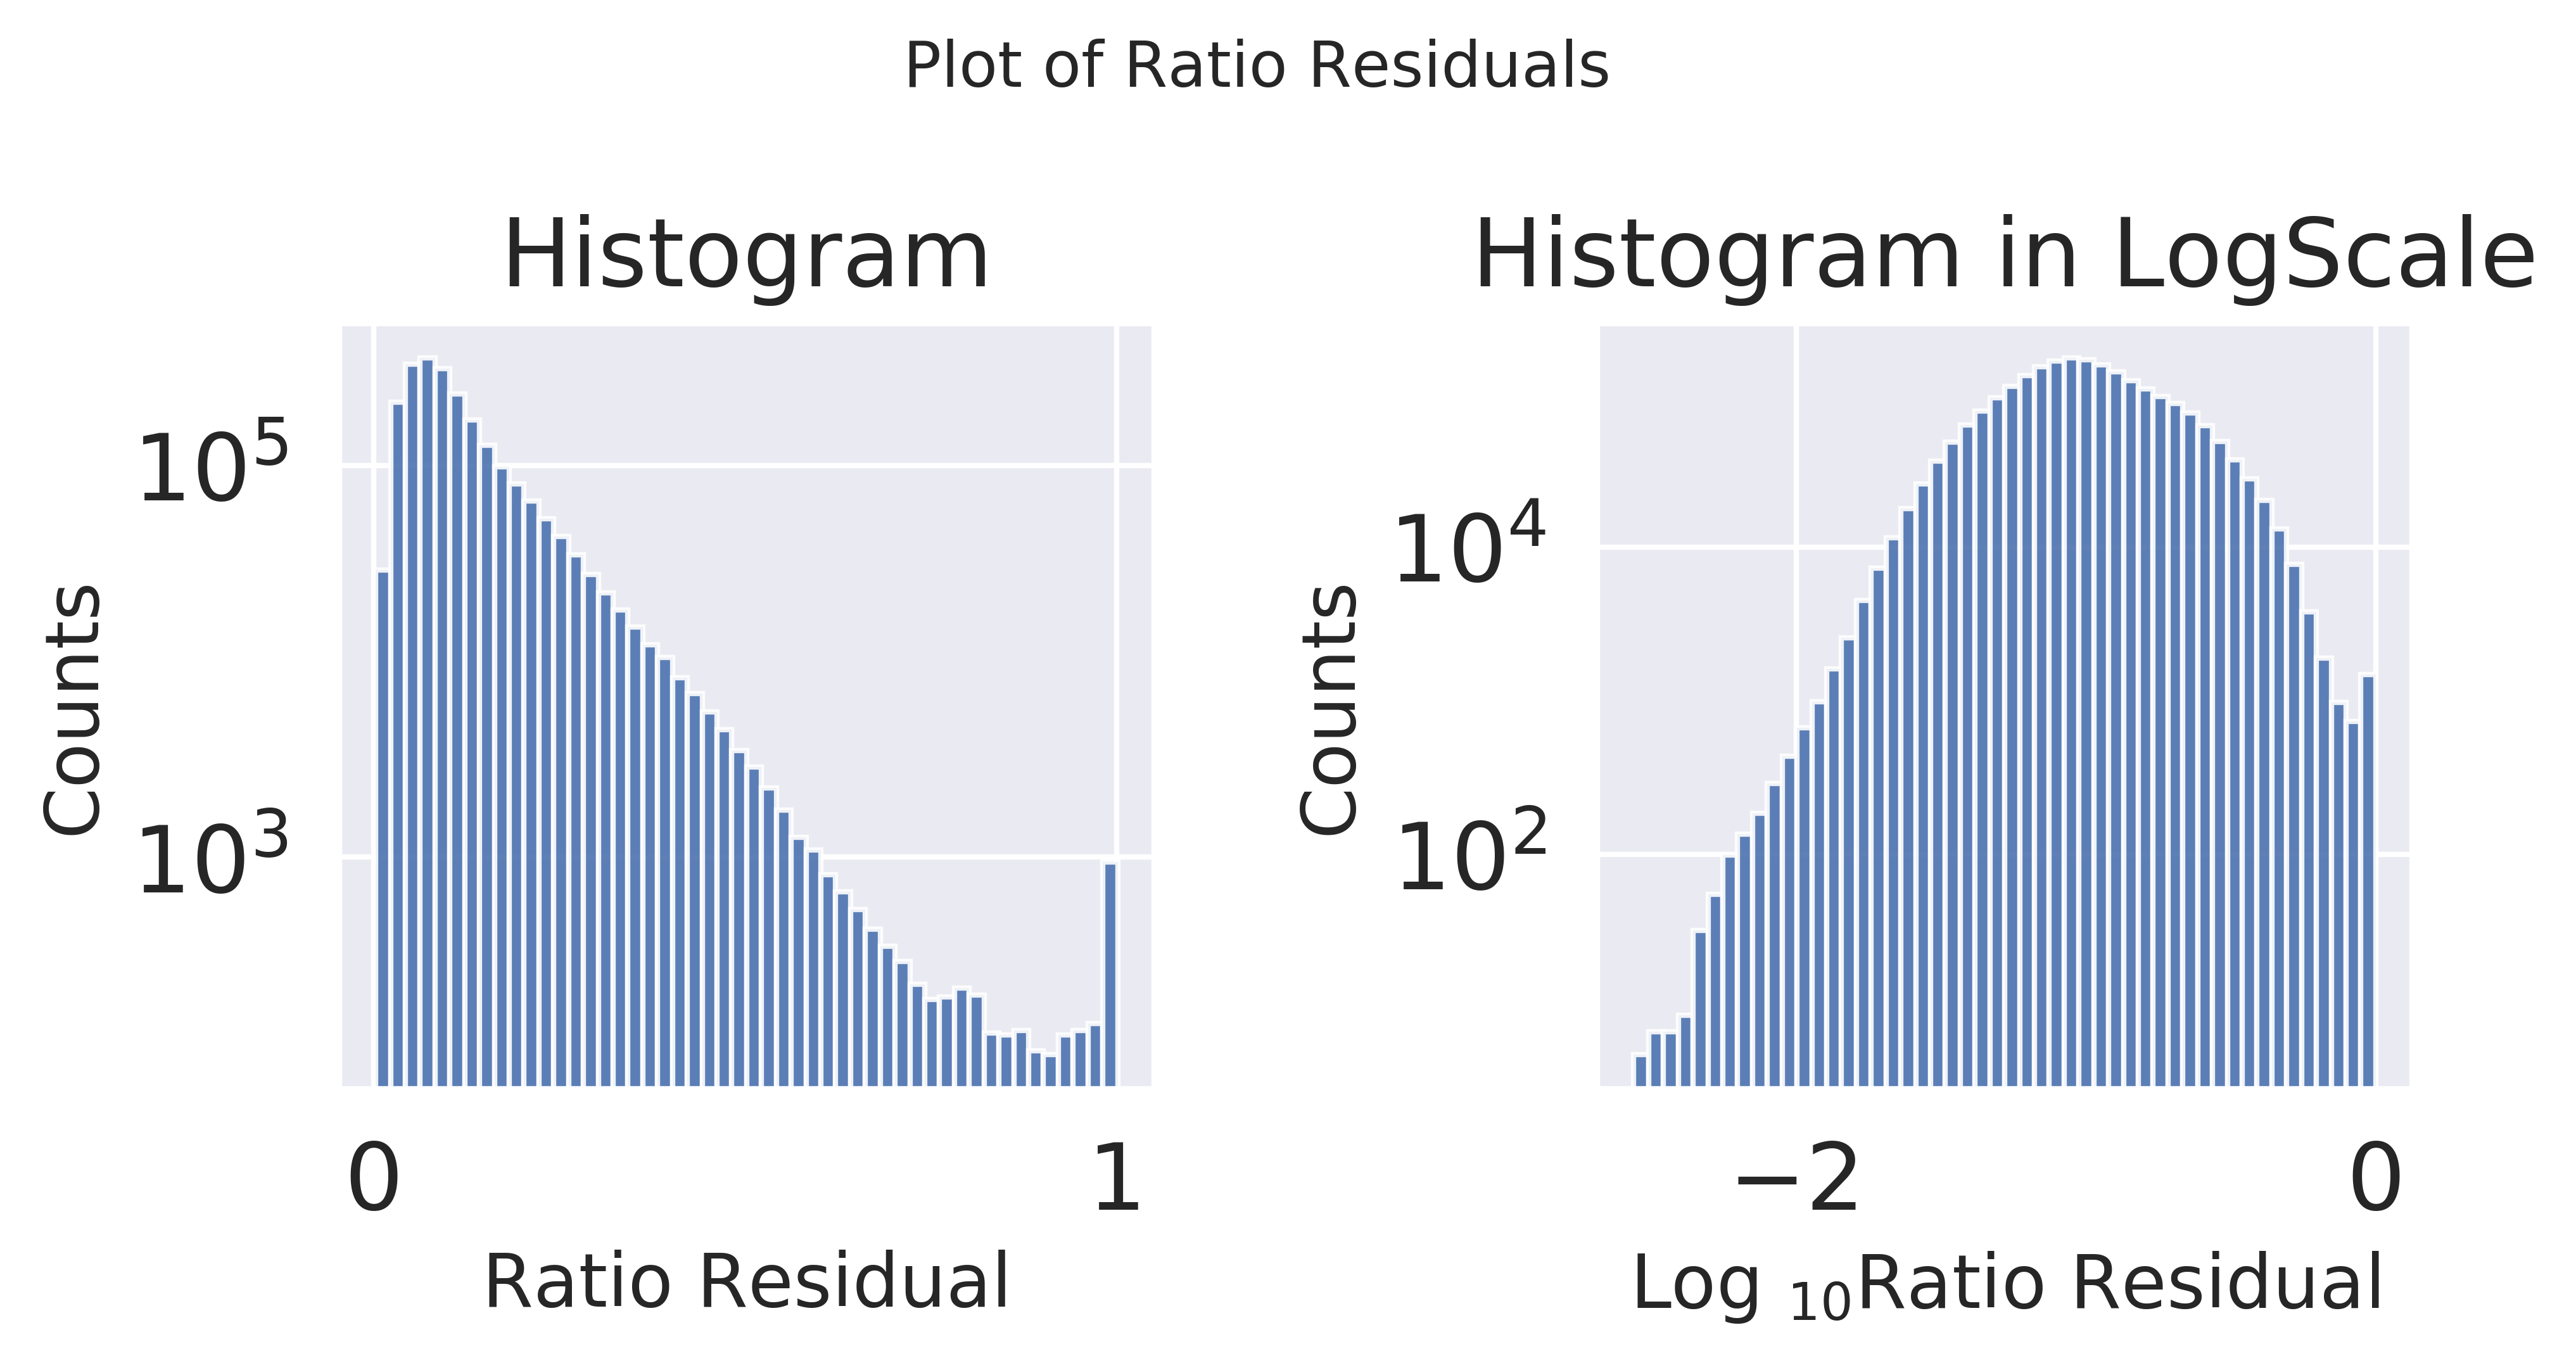

In [236]:
fig_RatioResidualLog = fairplot(data.ratio_residual, main = "Plot of Ratio Residuals", xlab = "Ratio Residual", ylab = "Counts", 
                       kde=[False,False], dpi=dpi_set, yscale = ['log','log'], scale_base = 10, label_size = ls)
plt.savefig('RatioResidual_Log.png')

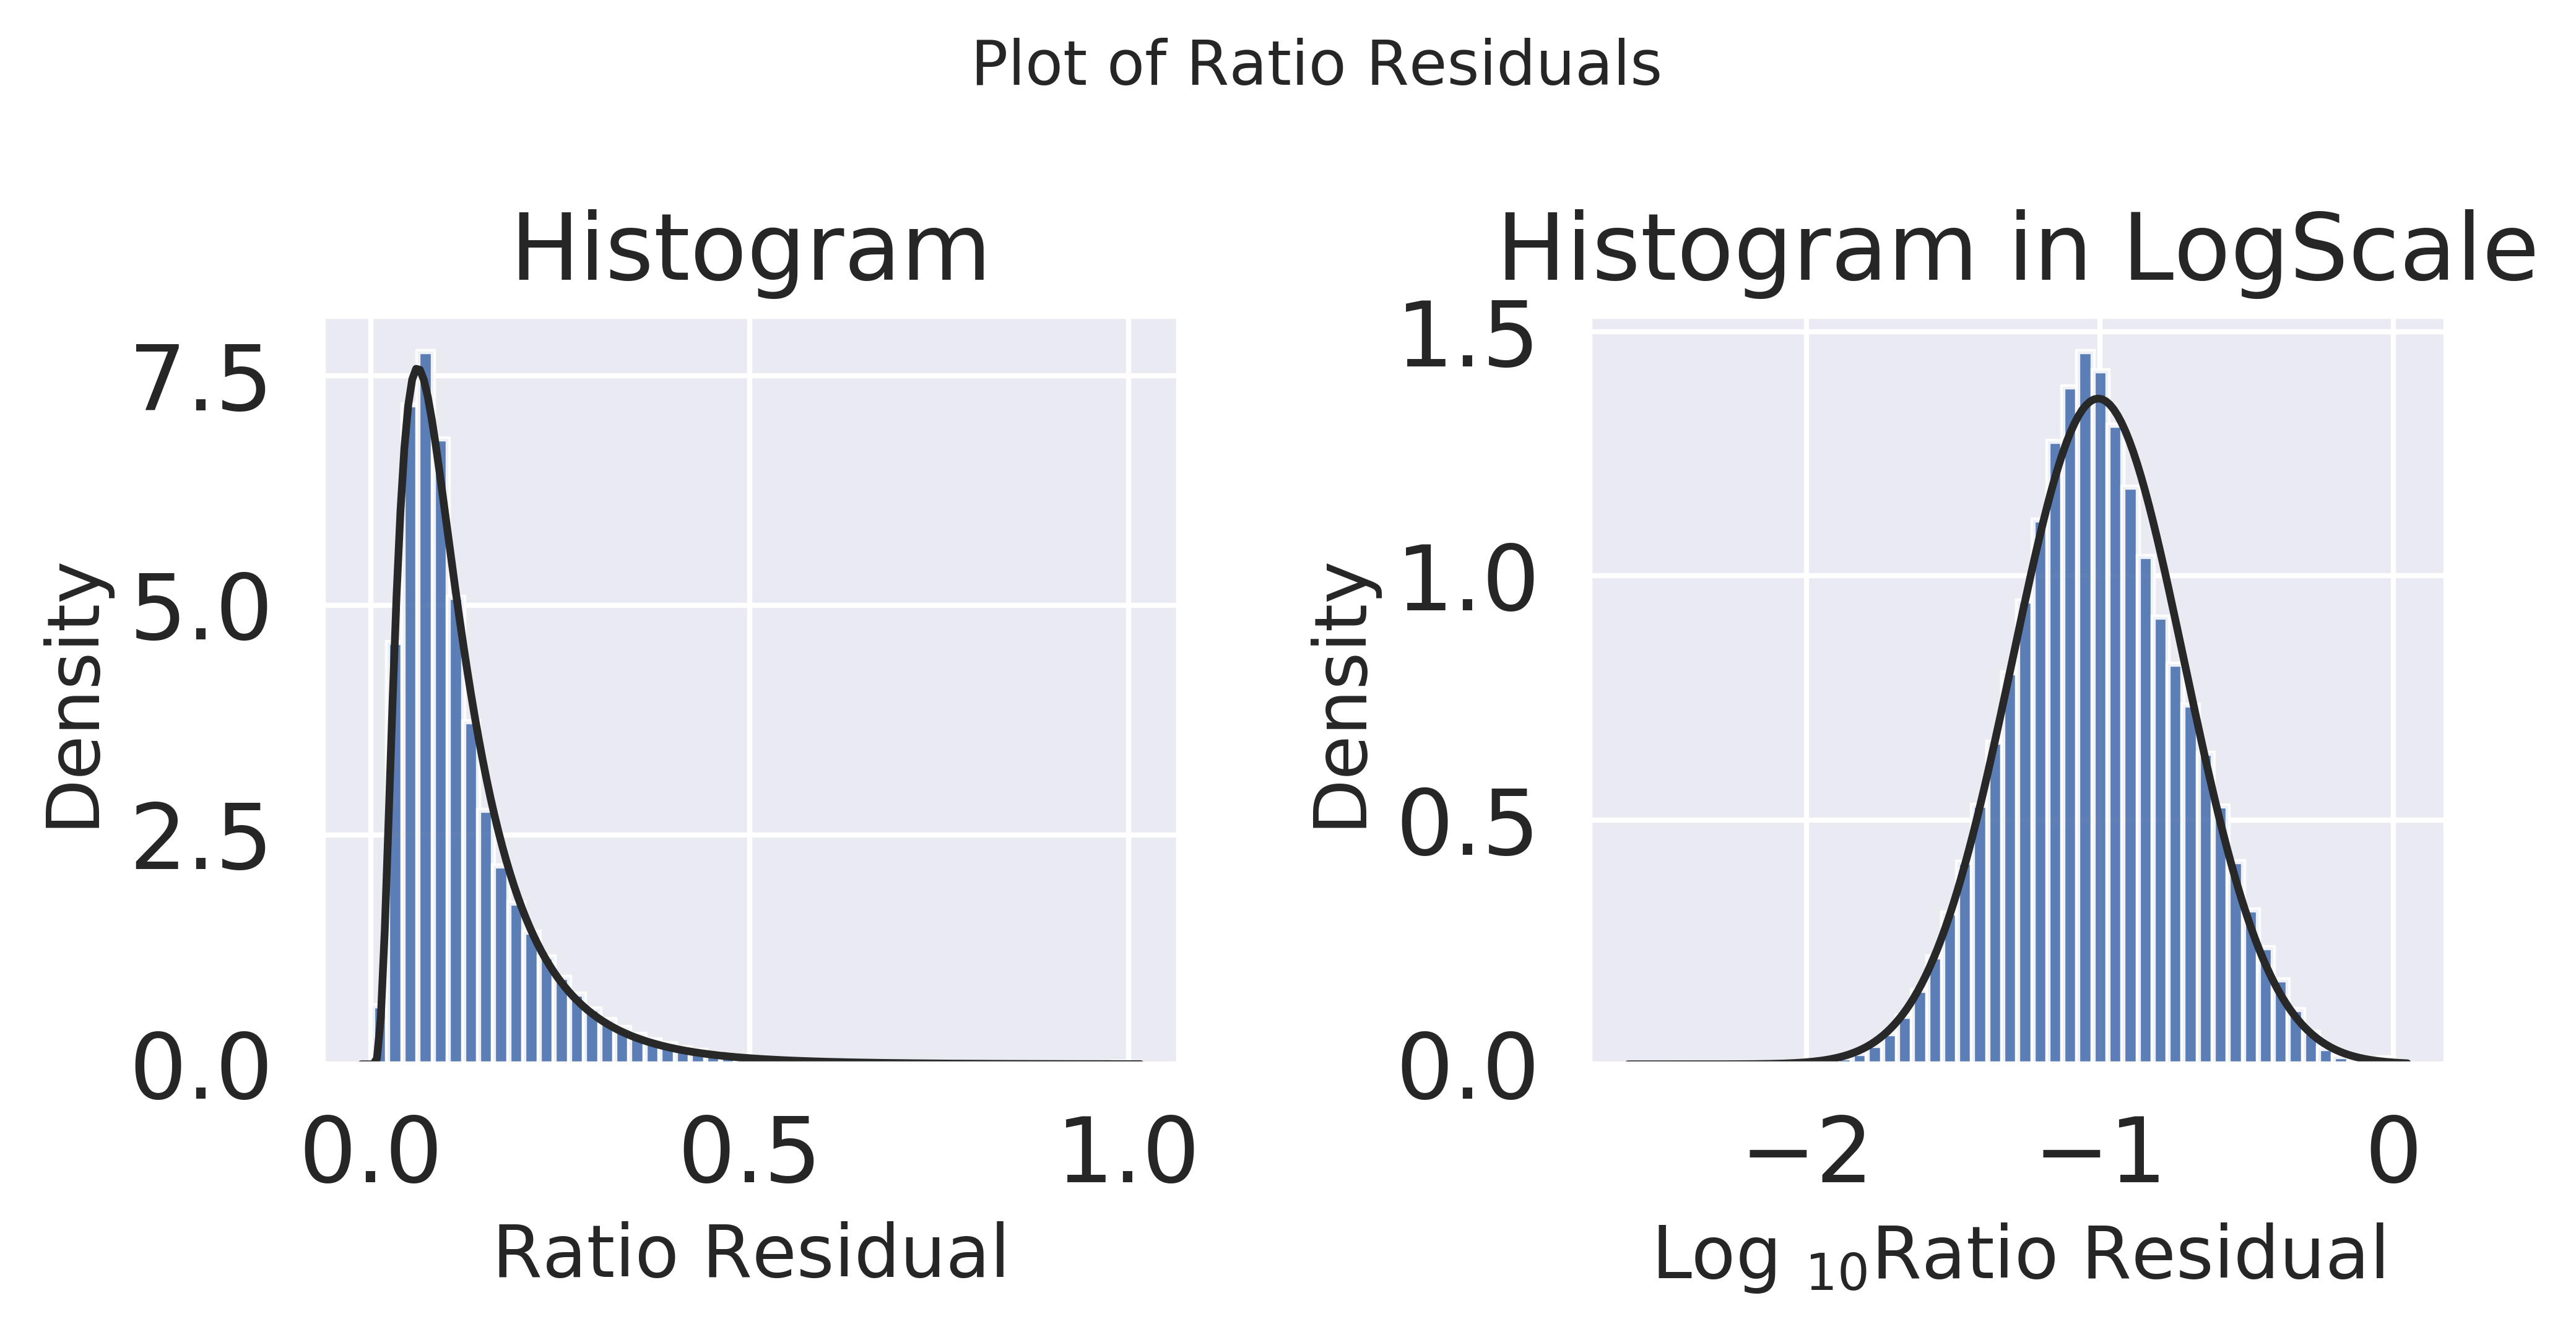

In [249]:
## Fitting the Ratio Residuals plot with a lognormal function and that of the log with a normal function.
fig_RatioResidualfit = fairplot(data.ratio_residual, main = "Plot of Ratio Residuals", xlab = "Ratio Residual", ylab = "Density", 
                     kde= [False,False], fit1 =lognorm, fit2=norm, dpi=dpi_set, label_size = ls)
plt.savefig('RatioResidual_Fit_Lognorm_norm.png')

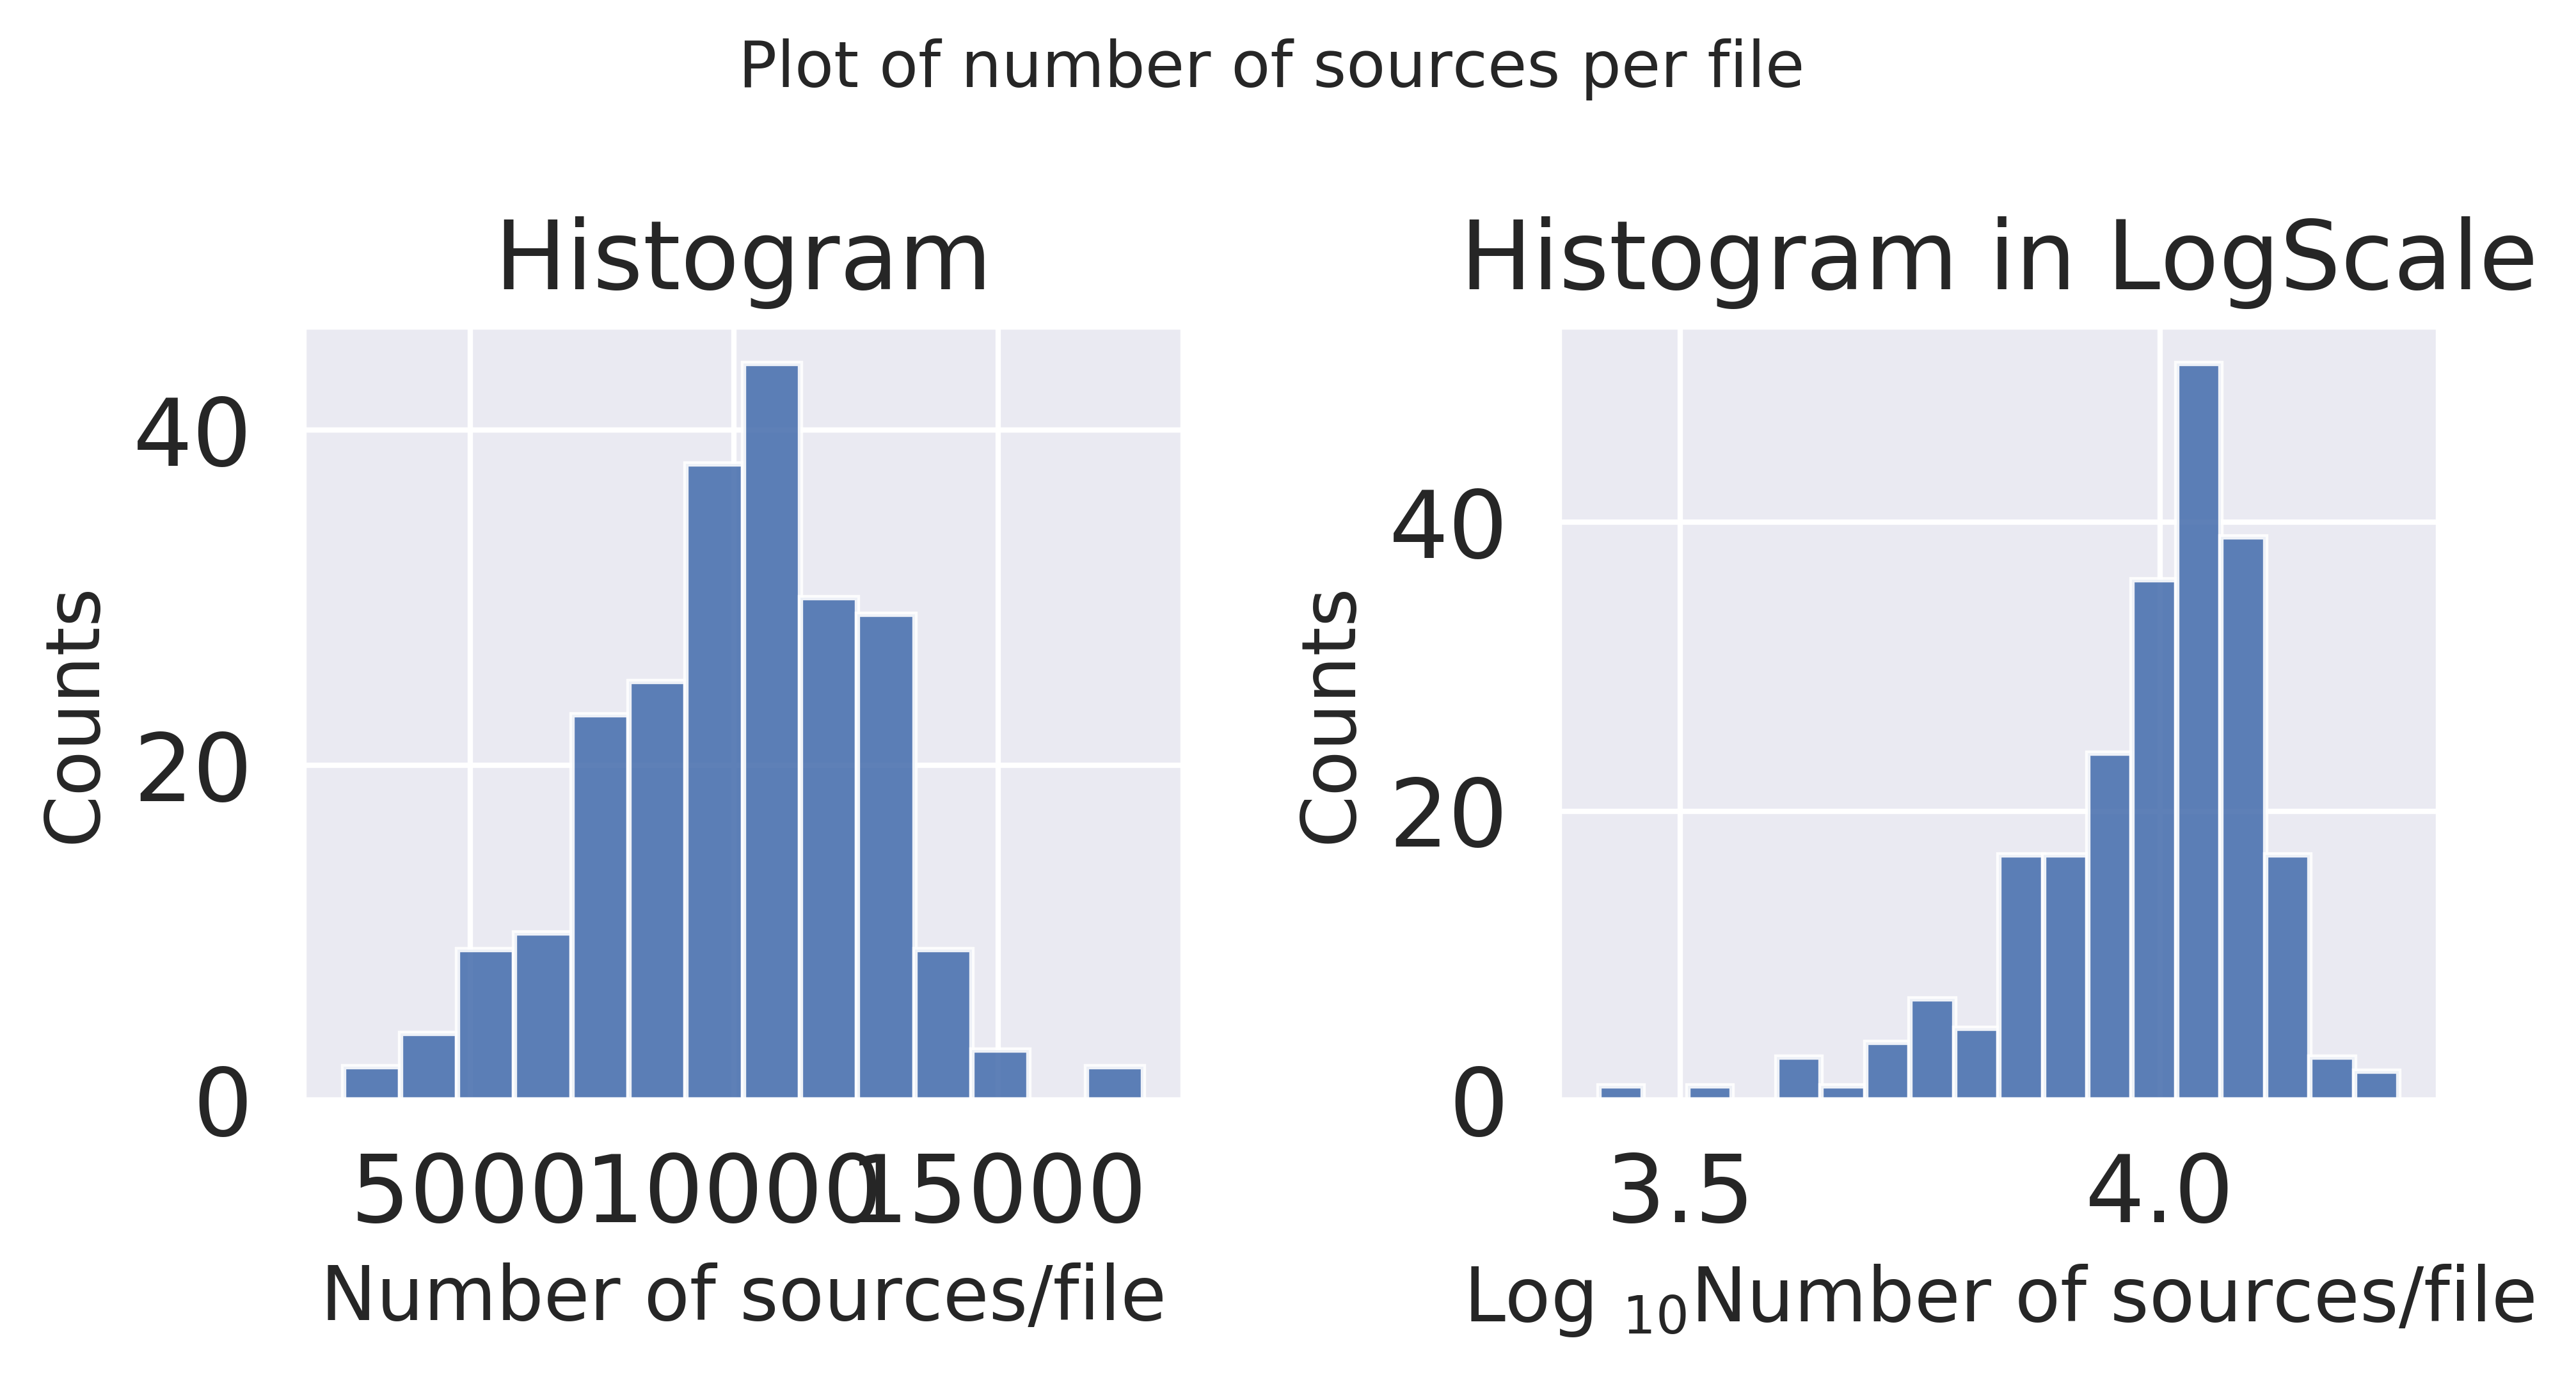

In [238]:
fig_Files = fairplot(data.groupby(['mosaic']).size(), main = "Plot of number of sources per file", 
                     xlab = "Number of sources/file", ylab = "Counts", kde=[False,False], dpi=dpi_set, label_size = ls)
plt.savefig('Sourcesperfile.png')

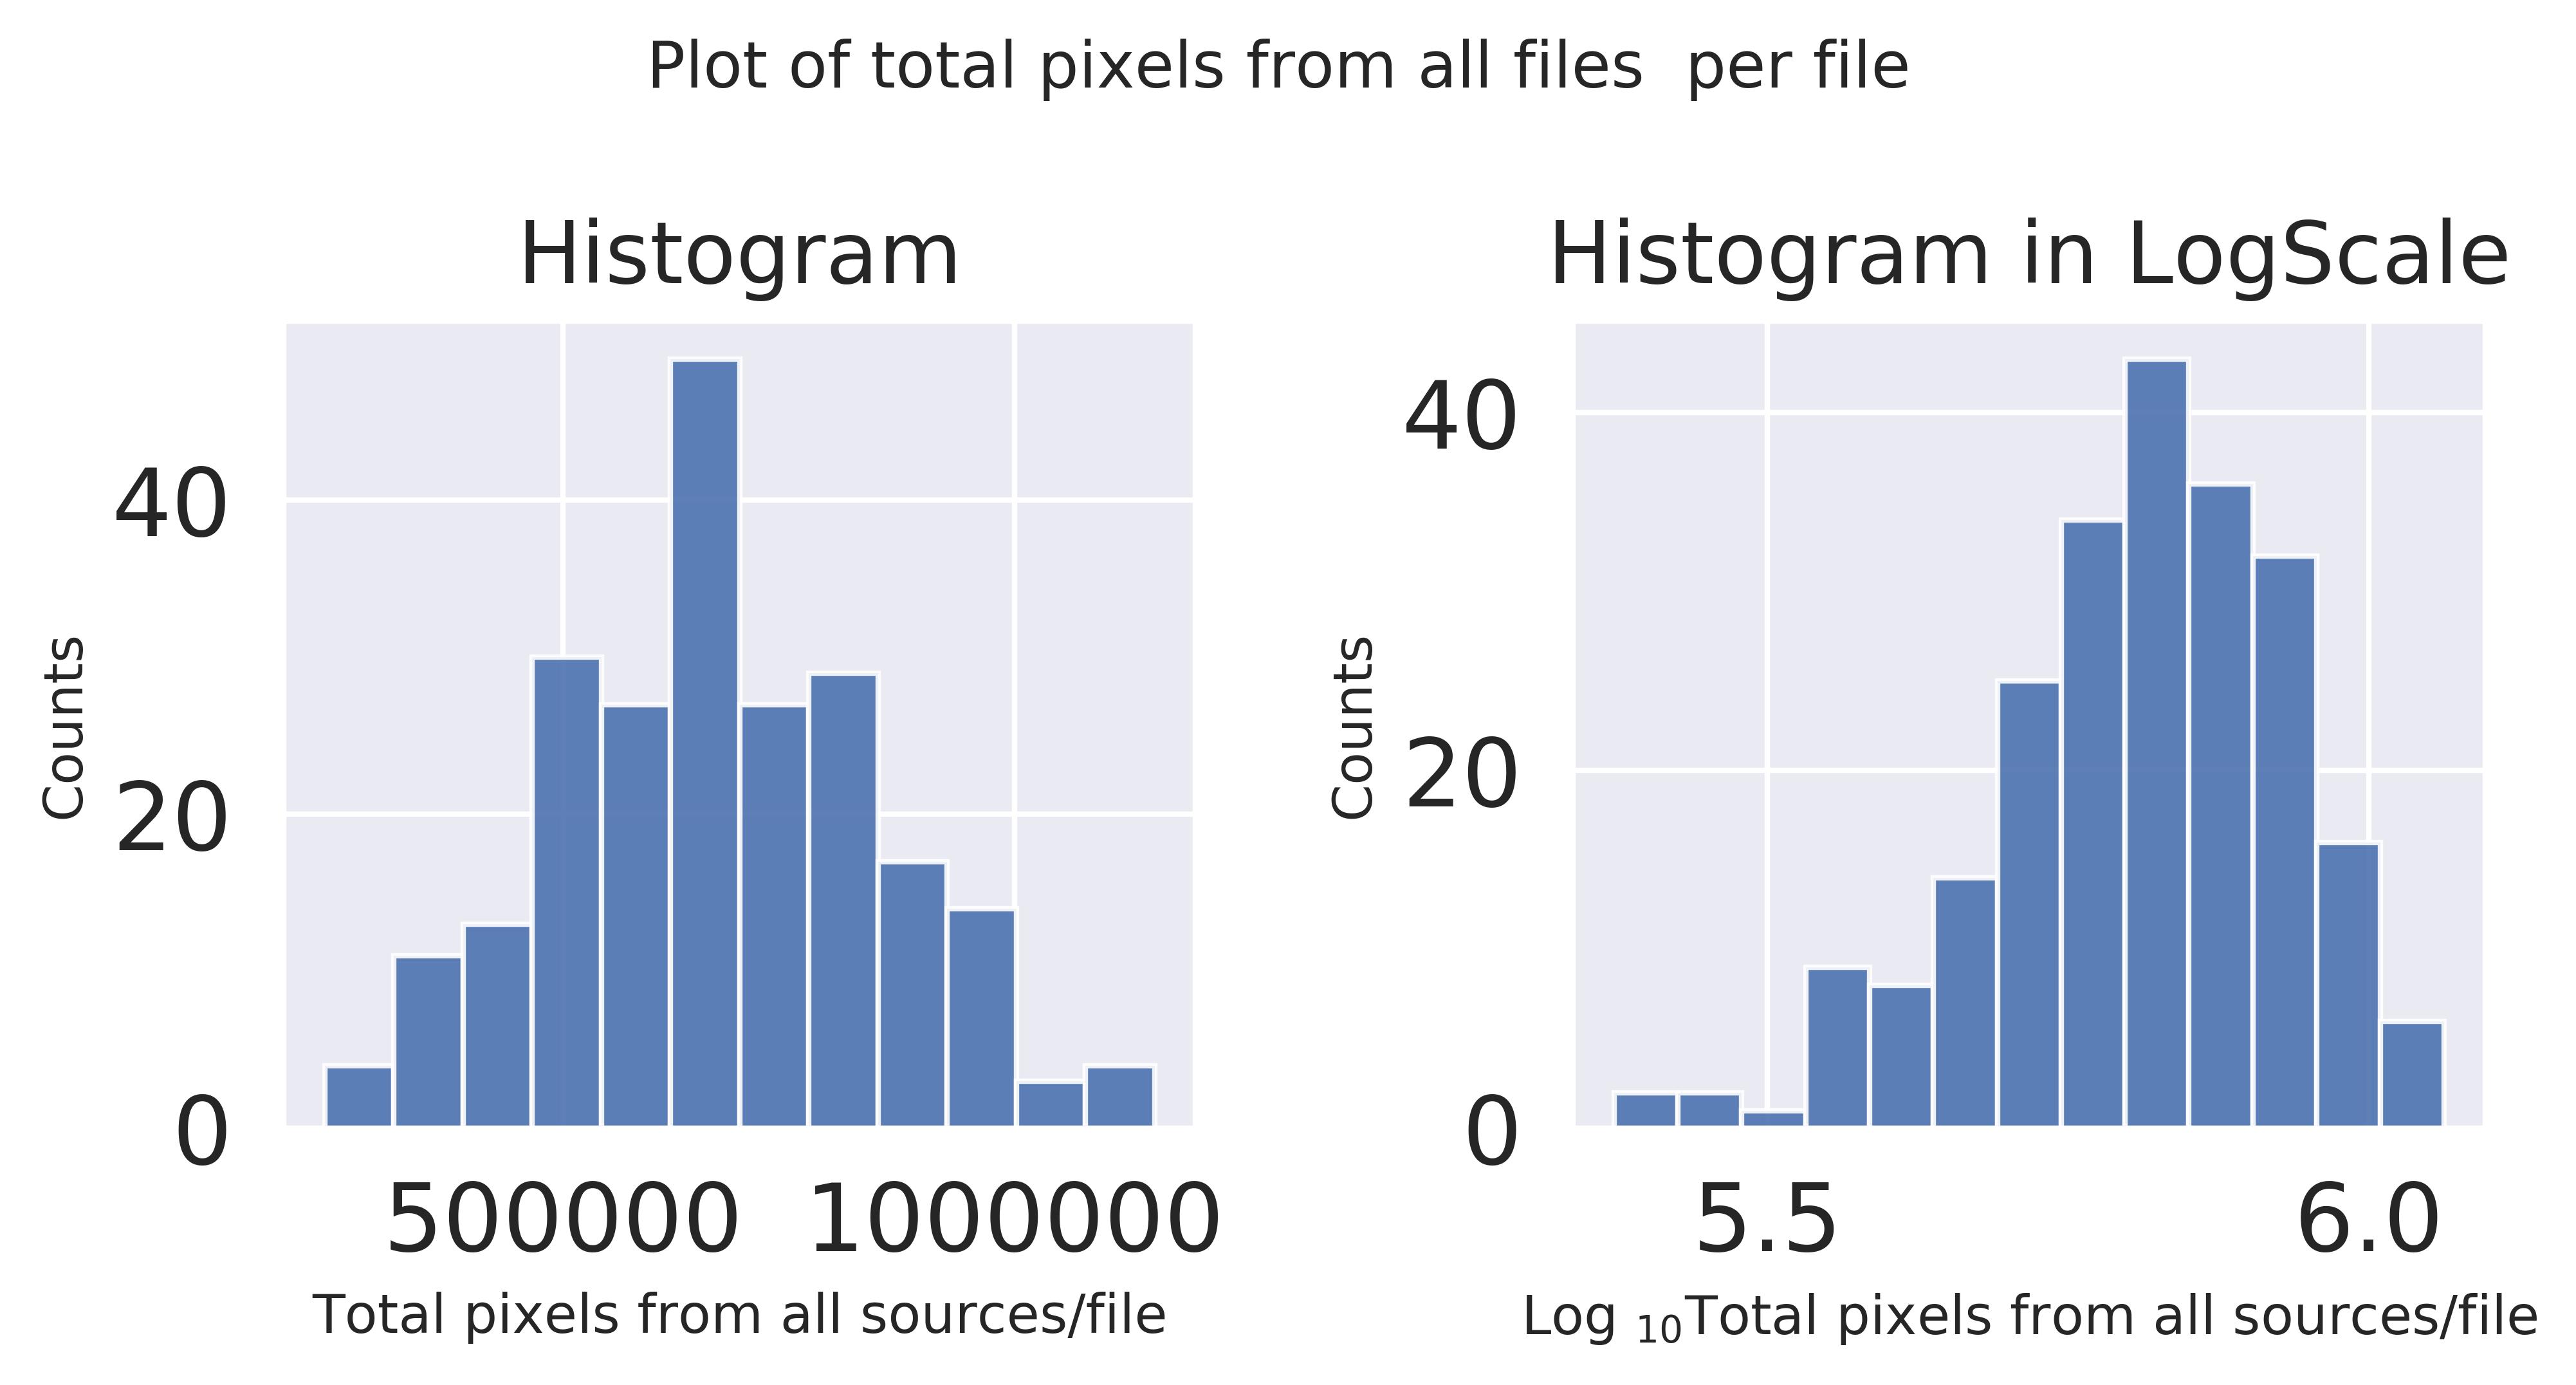

In [239]:
fig_Files = fairplot(data.groupby(['mosaic'])[['total_pixels']].sum(), main = "Plot of total pixels from all files  per file", 
                     xlab = "Total pixels from all sources/file", ylab = "Counts", kde=[False,False], dpi=dpi_set,
                     label_size = (16,10))
plt.savefig('TotalPixelsperfile.png')


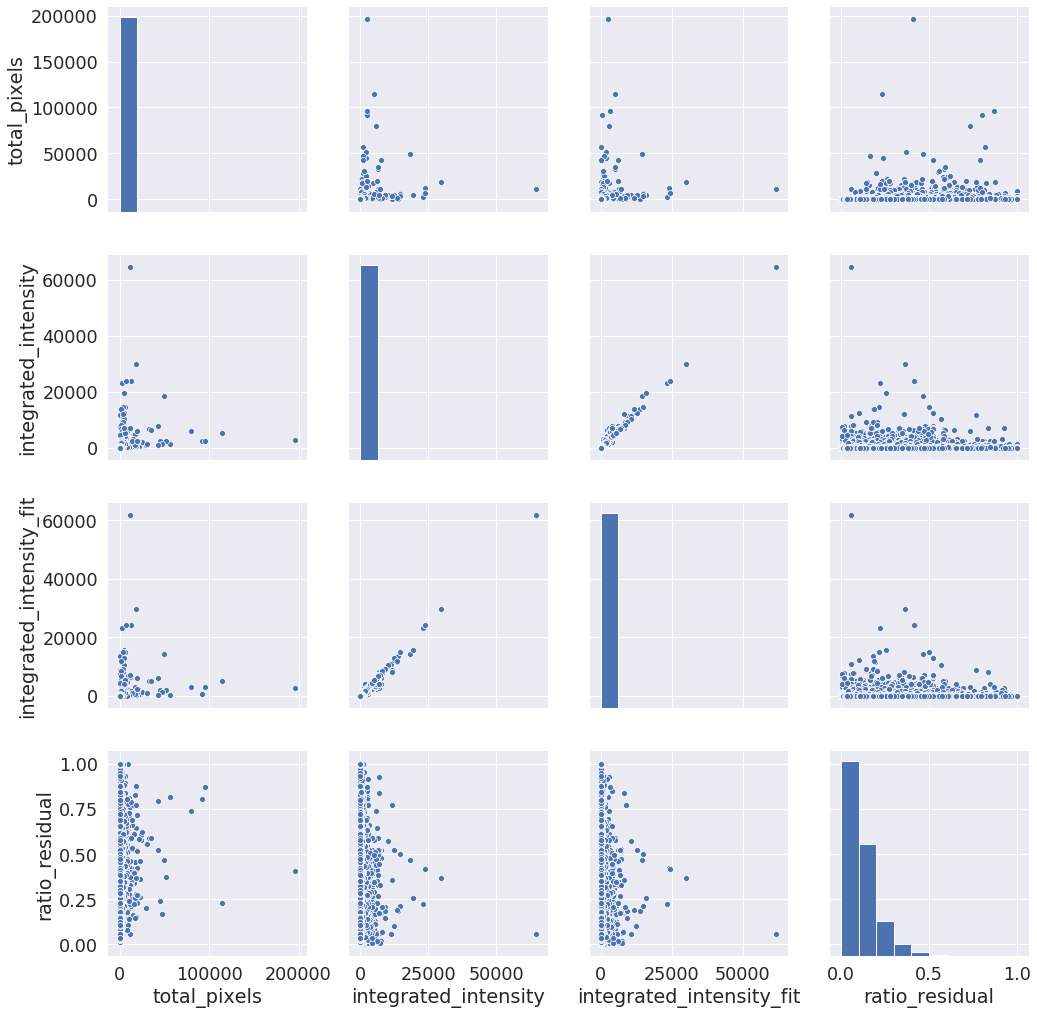

In [71]:
sns.set(font_scale=1.6) 
sns_plot = sns.pairplot(data[['total_pixels','integrated_intensity','integrated_intensity_fit', 'ratio_residual']], size = 3.5)
sns_plot.savefig("Pairplot.png")

In [72]:
data.describe()

total_pixels  integrated_intensity  brightest_pixel    fit_x_axis  \
count  2.287879e+06          2.287879e+06     2.287879e+06  2.287879e+06   
mean   6.662187e+01          5.787248e+00     3.542594e-03  2.915247e+00   
std    2.794861e+02          1.076077e+02     6.333587e-02  3.605708e+00   
min    1.400000e+01          1.072606e-01     1.792818e-04  7.868647e-11   
25%    2.200000e+01          2.838962e-01     4.333723e-04  1.709234e+00   
50%    3.200000e+01          4.806174e-01     5.940558e-04  1.961392e+00   
75%    5.500000e+01          1.072990e+00     1.006327e-03  2.568437e+00   
max    1.961310e+05          6.458131e+04     4.572484e+01  7.200000e+02   

         fit_y_axis      deconv_x      deconv_y  integrated_intensity_fit  \
count  2.287879e+06  2.287879e+06  2.287879e+06              2.287879e+06   
mean   2.356924e+00  4.666364e+00  3.024419e+00              5.314156e+00   
std    3.062358e+00  9.090008e+00  7.756177e+00              1.015243e+02   
min    4.837441e-11  3.478512e-08  3.211824e-08              1.869812e-04   
25%    1.424188e+00  4.473637e-01  3.211824e-08              2.899372e-01   
50%    1.761293e+00  2.309246e+00  1.096351e+00              4.883790e-01   
75%    2.085175e+00  4.536606e+00  2.847839e+00              1.077334e+00   
max    5.286674e+02  1.695466e+03  1.244910e+03              6.168559e+04   

       ratio_residual       overlap  
count    2.287879e+06  2.287879e+06  
mean     1.239126e-01  4.921340e-01  
std      9.373344e-02  7.538762e-01  
min      2.746336e-03  0.000000e+00  
25%      6.289923e-02  0.000000e+00  
50%      9.629722e-02  0.000000e+00  
75%      1.545070e-01  1.000000e+00  
max      1.001020e+00  2.000000e+00

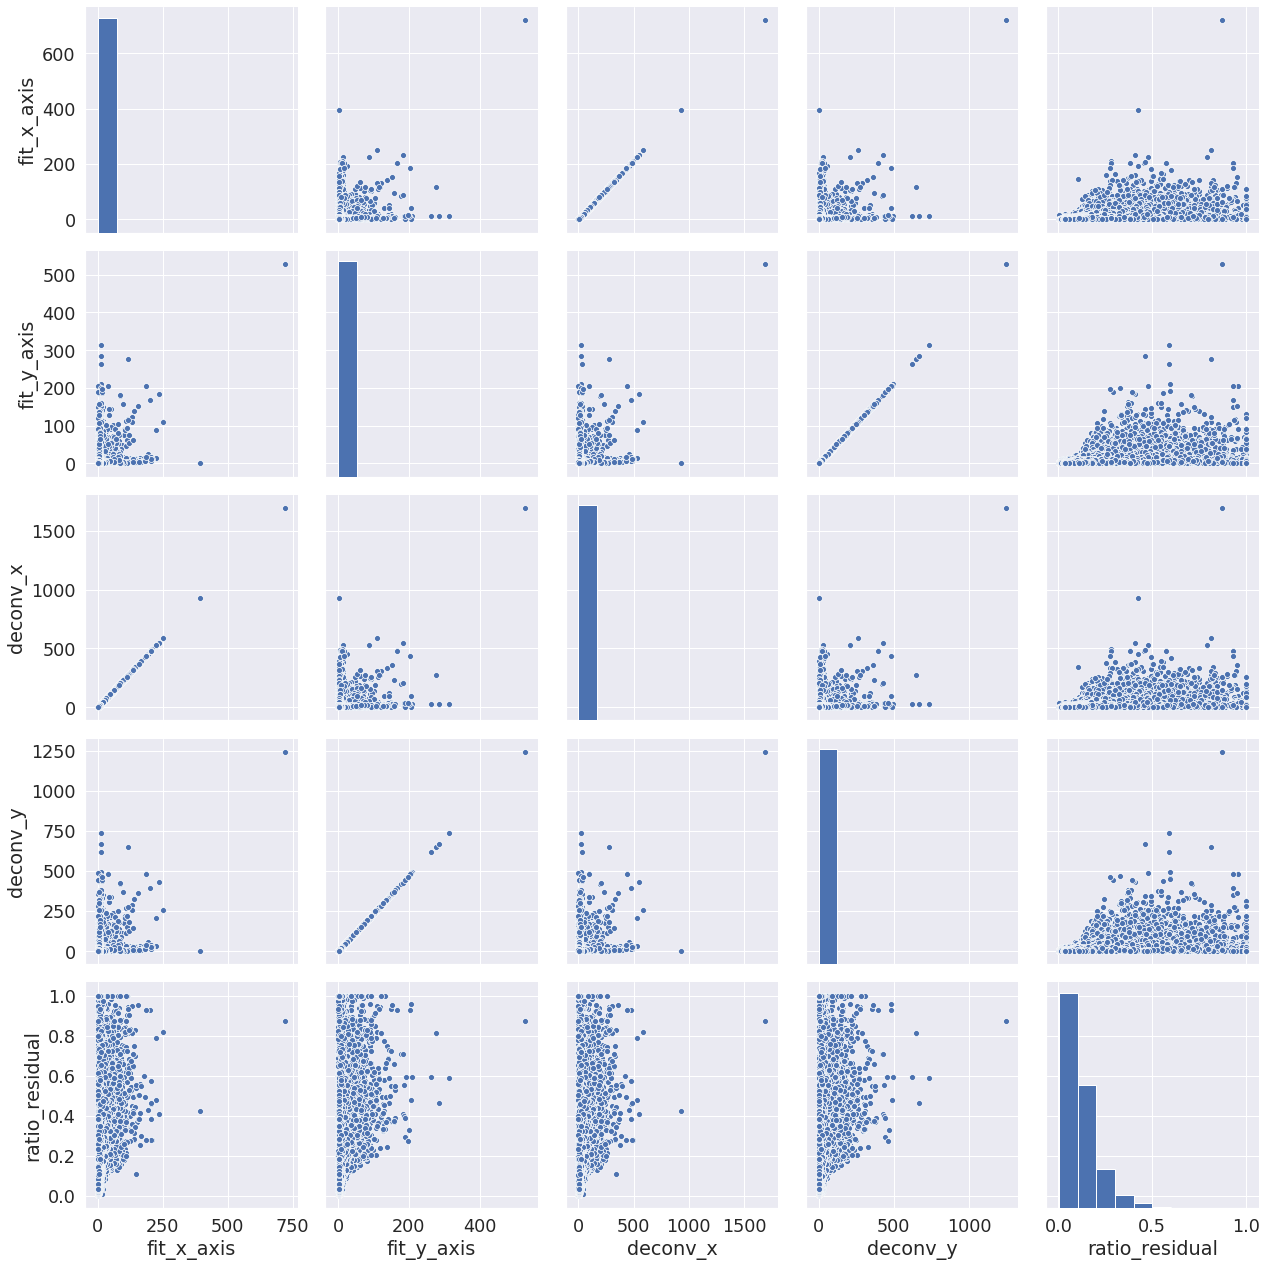

In [73]:
sns.set(font_scale=1.6) 
sns_plot = sns.pairplot(data[['fit_x_axis','fit_y_axis','deconv_x', 'deconv_y','ratio_residual']], size = 3.5)
sns_plot.savefig("Pairplot_2.png")

In [74]:
#sns.set(font_scale=1.6) 
#sns_plot = sns.pairplot(data)
#sns_plot.savefig("Pairplot_all.png")

In [75]:
#sns_plot = sns.pairplot(data, hue = "filename")
#sns_plot.savefig("Pairplot_all_filecolored.png")

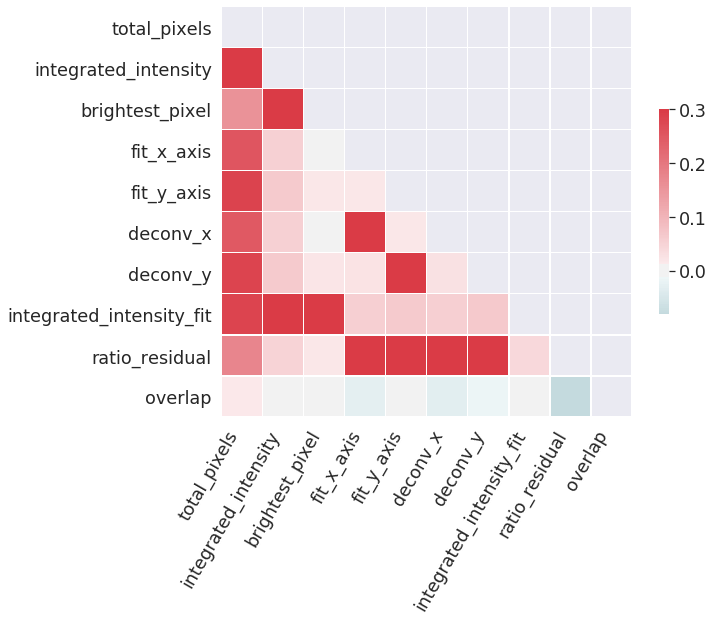

In [76]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(font_scale=1.6) 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(210, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
f.savefig("Correlation_data.png")

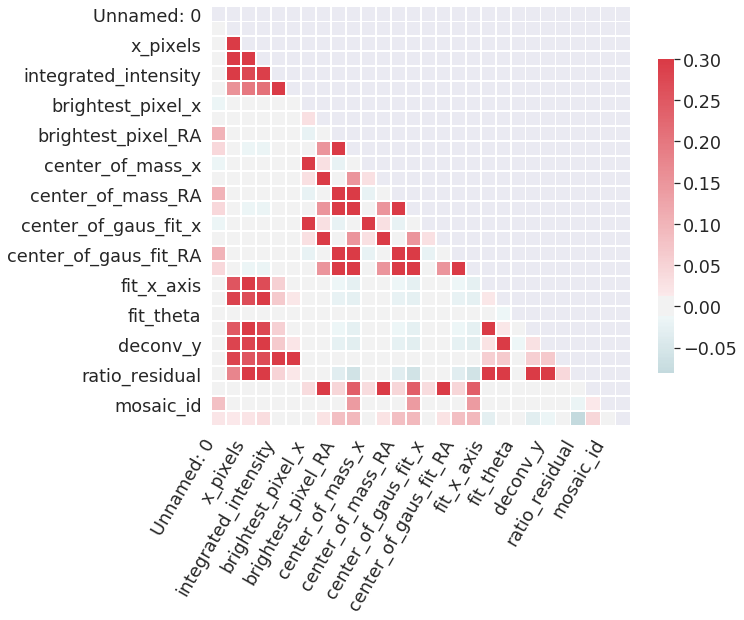

In [77]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(font_scale=1.6) 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(210, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
f.savefig("Correlation_data_all.png")

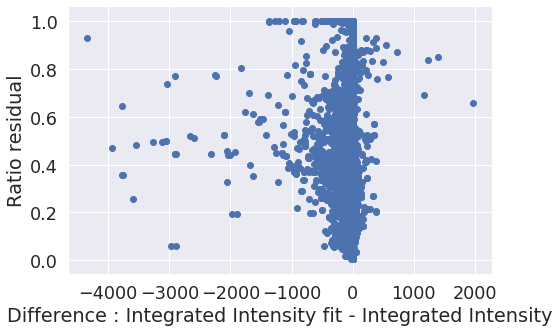

In [78]:
f, ax = plt.subplots(figsize =(8,5))
ax.scatter(df.integrated_intensity_fit- df.integrated_intensity, df.ratio_residual)

ax.set_xlabel("Difference : Integrated Intensity fit - Integrated Intensity")
ax.set_ylabel("Ratio residual")
plt.tight_layout()
f.savefig("Difference.png")

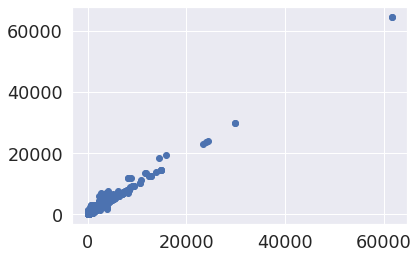

In [79]:
fig, ax = plt.subplots()
#sns.distplot(data.integrated_intensity, ax = ax, bins = 10)
#sns.distplot(data.integrated_intensity_fit - shift, ax = ax, bins=10)
#ax.set_xscale('log', basex=10)
#ax.set_yscale('log', basey=10)
#sns.pairplot(data, vars= ['integrated_intensity_fit', 'integrated_intensity'] )
ax.scatter(data.integrated_intensity_fit - shift, data.integrated_intensity)

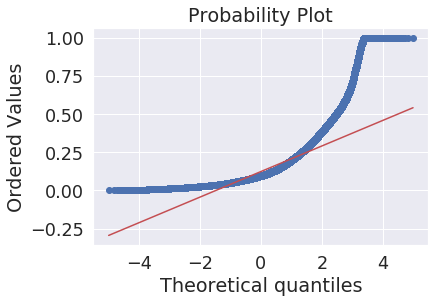

In [312]:
f, ax = plt.subplots()
probplot(data.ratio_residual, dist=norm, sparams=(0,), plot=ax)
#qqplot(data, x="ratio_residuals", y=norm, height = 4, aspect = 1.5, display_kws={"identity":False,"fit":True,"reg":True,"ci":0.025})
f.savefig("QQplot.png")

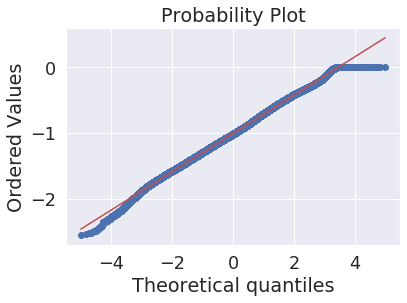

In [313]:
f, ax = plt.subplots()
probplot(np.log10(data.ratio_residual), dist=norm, sparams=(0,), plot=ax)
#qqplot(data, x="ratio_residuals", y=norm, height = 4, aspect = 1.5, display_kws={"identity":False,"fit":True,"reg":True,"ci":0.025})
f.savefig("QQplotLog.png")

In [86]:
from sklearn.mixture import GaussianMixture
samples= np.array(np.log10(data.ratio_residual))
mixture = GaussianMixture(n_components=2).fit(samples.reshape(-1, 1))
means_hat = mixture.means_.flatten()
weights_hat = mixture.weights_.flatten()
sds_hat = np.sqrt(mixture.covariances_).flatten()

print(mixture.converged_)
print(means_hat)
print(sds_hat)
print(weights_hat)

True
[-1.16643438 -0.80468443]
[0.22778909 0.23498441]
[0.55730846 0.44269154]


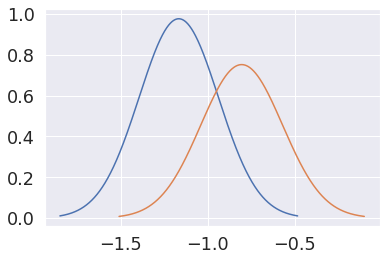

In [319]:
mu1_h, sd1_h = means_hat[0], sds_hat[0]
mu2_h, sd2_h = means_hat[1], sds_hat[1]
x_axis = np.linspace(mu1_h-3*sd1_h, mu1_h+3*sd1_h, 1000)
x_axis2 = np.linspace(mu2_h-3*sd2_h, mu2_h+3*sd2_h, 1000)
fig,ax =plt.subplots()
ax.plot(x_axis, weights_hat[0] *norm.pdf(x_axis, mu1_h, sd1_h))
ax.plot(x_axis2, weights_hat[1]*norm.pdf(x_axis2, mu2_h, sd2_h))


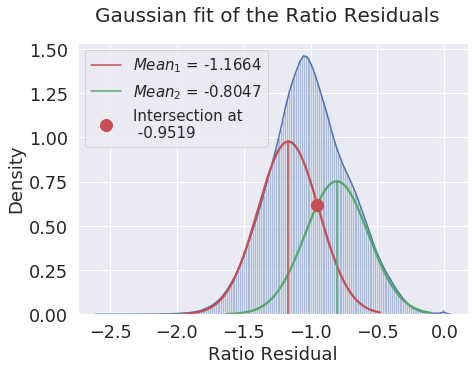

In [342]:
sns.axes_style("white")
fig,ax =plt.subplots(figsize = (7,5))
sns.distplot(samples, bins=160,ax = ax)
x_axis = np.linspace(mu1_h-3.5*sd1_h, mu1_h+3*sd1_h, 1000)
x_axis2 = np.linspace(mu2_h-3.5*sd2_h, mu2_h+3*sd2_h, 1000)
ax.plot(x_axis, weights_hat[0] *norm.pdf(x_axis, mu1_h, sd1_h), c='r', linewidth=2.25)
ax.plot(x_axis2, weights_hat[1]*norm.pdf(x_axis2, mu2_h, sd2_h), c='g', linewidth=2.25)
ax.axvline(x=means_hat[0], ymax=weights_hat[0]*max(norm.pdf(x_axis, mu1_h, sd1_h))-.34, label='$Mean_1$ = {}'.format(np.around(means_hat[0],decimals=4)), c ='r')
ax.axvline(x=means_hat[1], ymax=weights_hat[1]*max(norm.pdf(x_axis, mu2_h, sd2_h))-.26, label='$Mean_2$ = {}'.format(np.around(means_hat[1],decimals= 4)), c ='g')
ax.plot(-0.9519,0.6182,'ro', label='Intersection at\n -0.9519' ,markersize=12) 
ax.set_xlabel("Ratio Residual", fontsize=18)
ax.set_ylabel("Density", fontsize=18)
plt.legend(loc='upper left', fontsize= 15)
fig.suptitle("Gaussian fit of the Ratio Residuals", fontsize=20)
fig.savefig("RatioResidualfit.png",bbox_inches = "tight")

In [ ]:
##Point of Intersection:
##Computed Analytically with  desmos. 
##However, another method - draw points from the  Gaussian distributions and see which points are same.

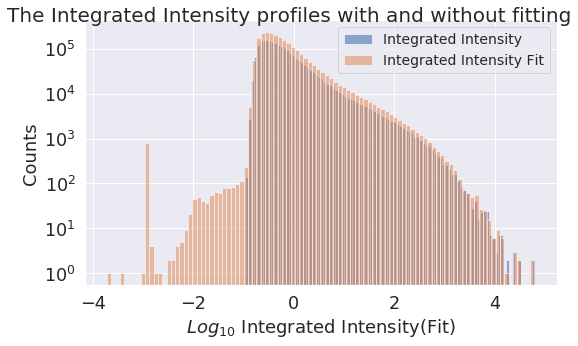

In [282]:
fig,ax =plt.subplots(figsize = (8,5))
ax.hist(np.log10(data.integrated_intensity), label = "Integrated Intensity", bins= 100, alpha=0.6)
ax.hist(np.log10(data.integrated_intensity_fit),label = "Integrated Intensity Fit", bins= 100, alpha=0.5)
#sns.distplot(np.log10(data[data.integrated_intensity>0].integrated_intensity), kde=False, ax=ax)
#sns.distplot(np.log10(df[df.integrated_intensity_fit>0].integrated_intensity_fit), kde=False, ax=ax)
#ax.set(xlim=[0,])
ax.set_xlabel("$Log_{10}$ Integrated Intensity(Fit)", fontsize=18)
ax.set_ylabel("Counts", fontsize=18)
plt.legend(loc='upper right', fontsize= 14)
fig.suptitle("The Integrated Intensity profiles with and without fitting", fontsize=20)
ax.set_yscale('log', basey=10)
plt.tight_layout()
fig.savefig("IntegrIntensity+Fit_overlap.png")

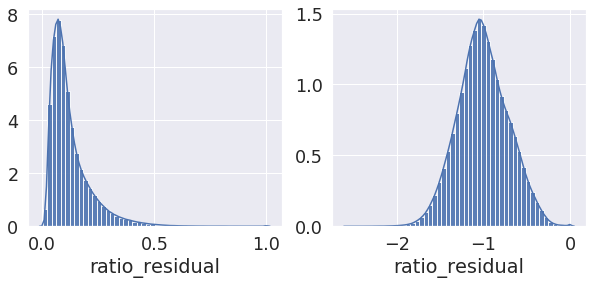

In [248]:
#df.loc[df.ratio_residual == 0, 'ratio_residual'] = min(df.loc[df.ratio_residual > 0].ratio_residual)*1e-5
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (10, 4))
sns.distplot(data.ratio_residual, hist_kws=dict(alpha=0.9), ax=ax1)
sns.distplot(np.log10(data.ratio_residual), hist_kws=dict(alpha=0.9), ax=ax2)
#plt.title('Histogram plot of Ratio Residual LOGSCALE')

#plt.xlabel('Ratio Residual')
#plt.ylabel('Counts')

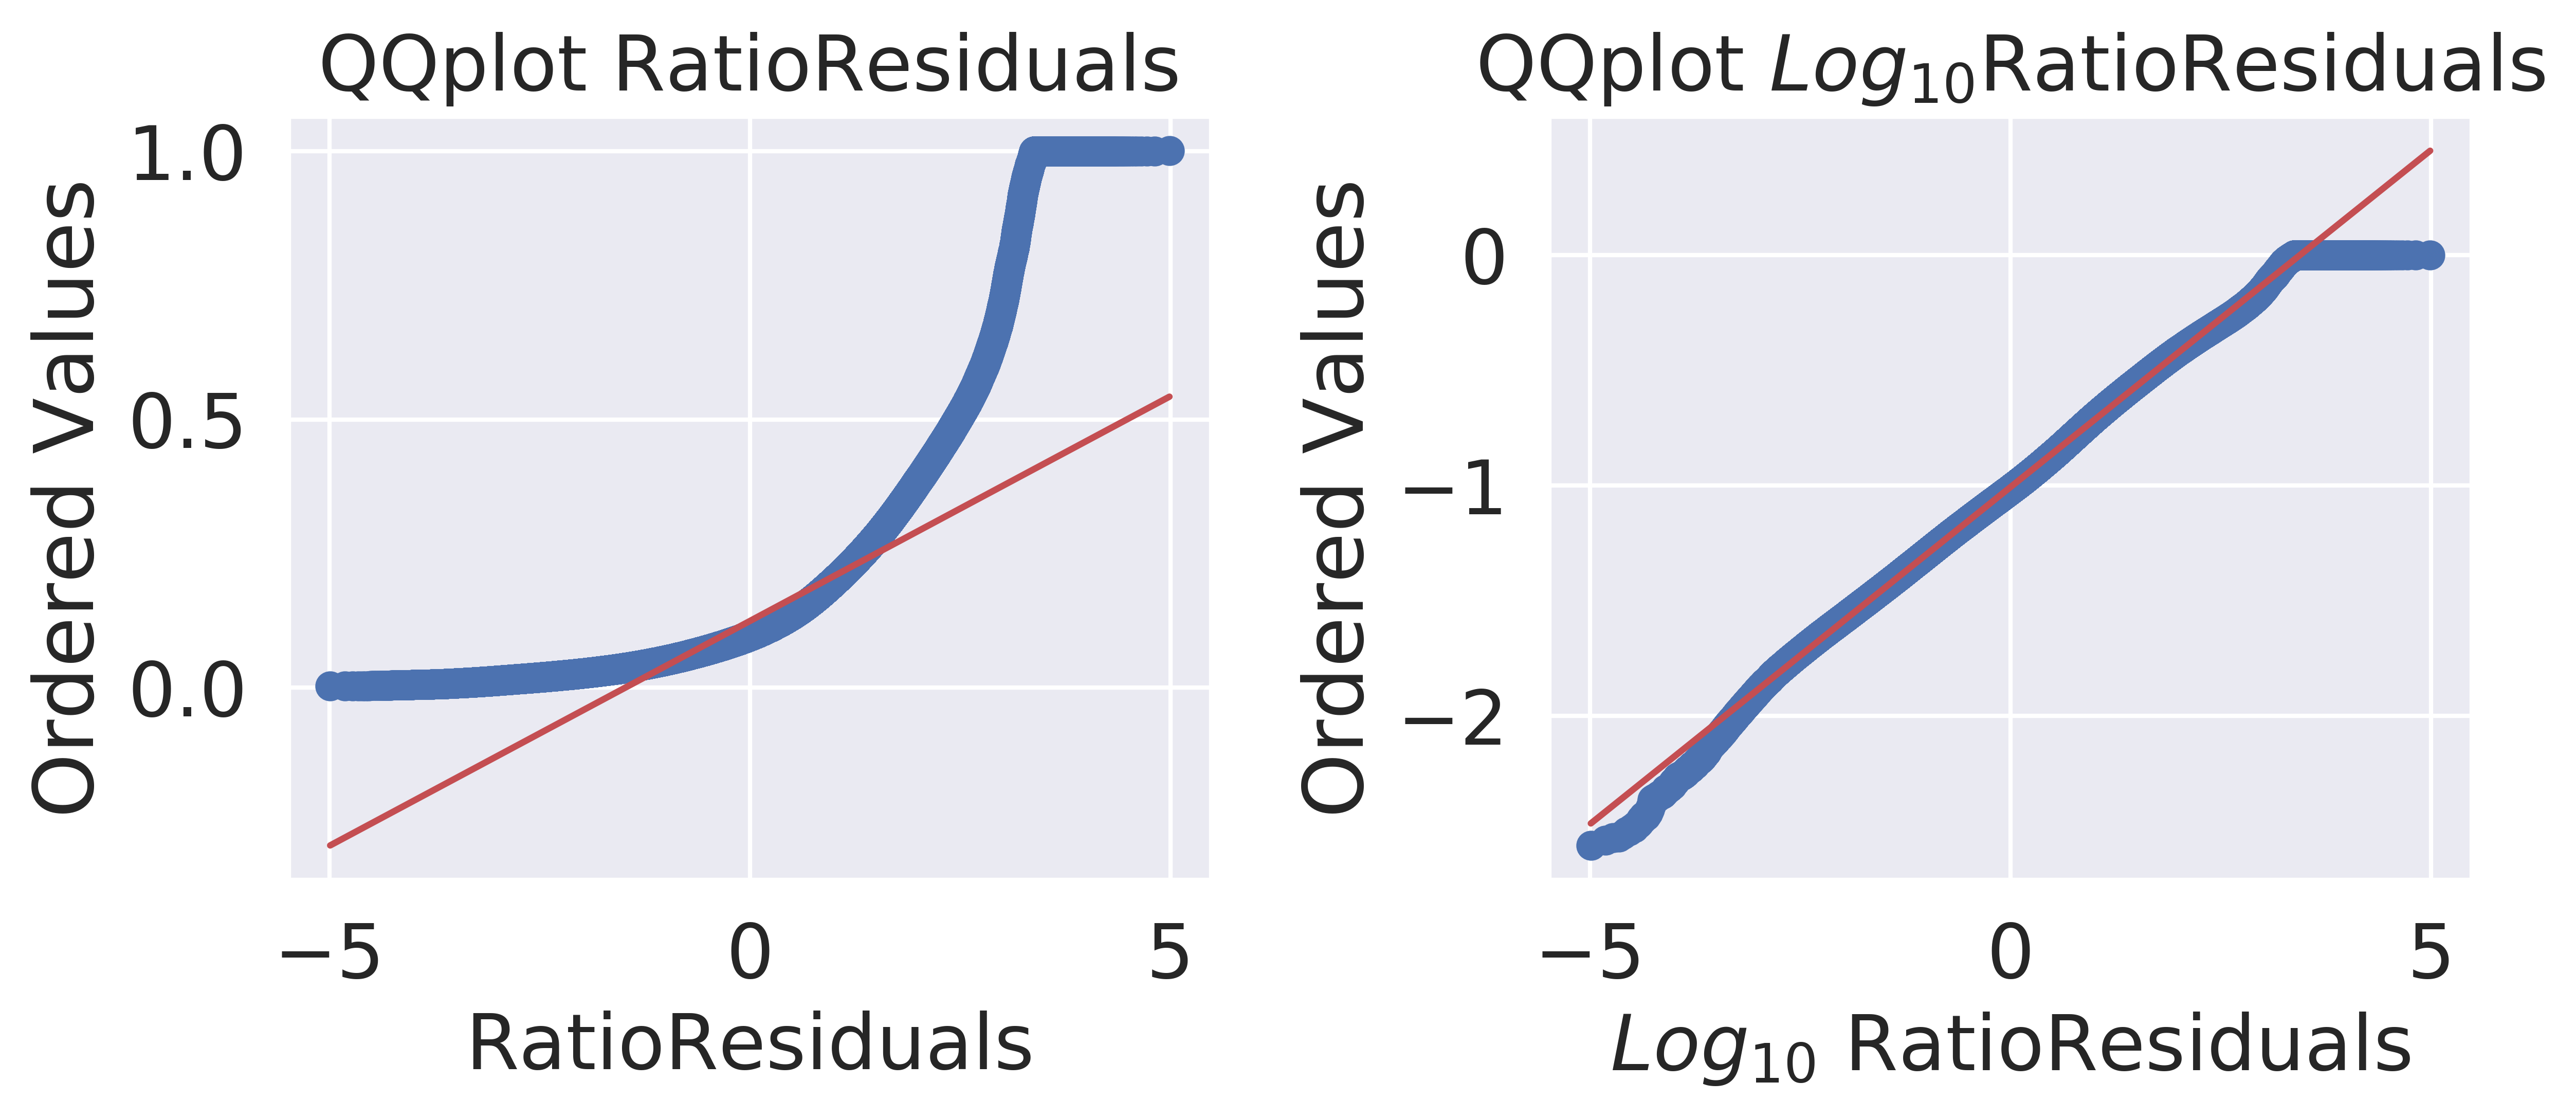

In [315]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(9,4), dpi=600)
probplot(data.ratio_residual, dist=norm, plot=ax1)
probplot(np.log10(data.ratio_residual), dist=norm, plot=ax2)
ax1.set_xlabel("RatioResiduals", fontsize=18)
ax2.set_xlabel("$Log_{10}$ RatioResiduals", fontsize=18)
ax1.set_title("QQplot RatioResiduals", fontsize=18)
ax2.set_title("QQplot $Log_{10}$RatioResiduals", fontsize=18)
f.tight_layout() 
f.savefig("QQPlotResiduals.png")

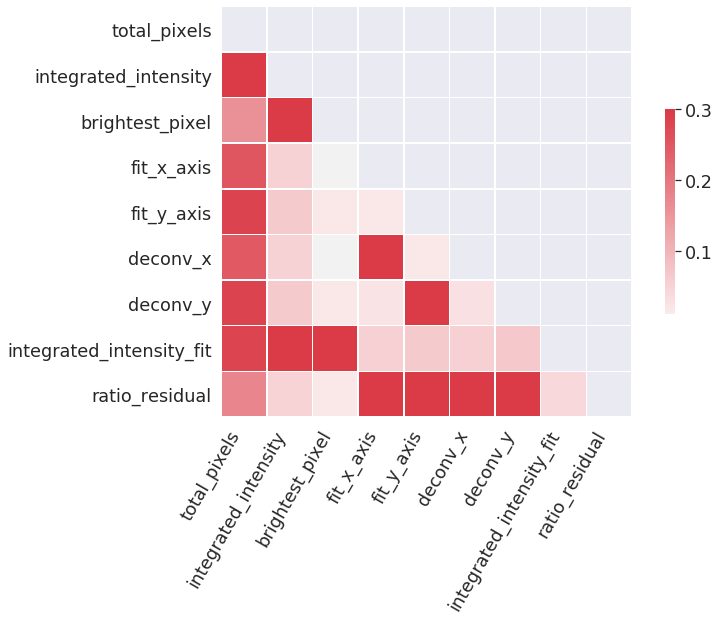

In [280]:
dat2 = data.loc[:, data.columns != 'overlap']
corr = dat2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(font_scale=1.6) 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(210, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
f.savefig("Correlation_data2.png")

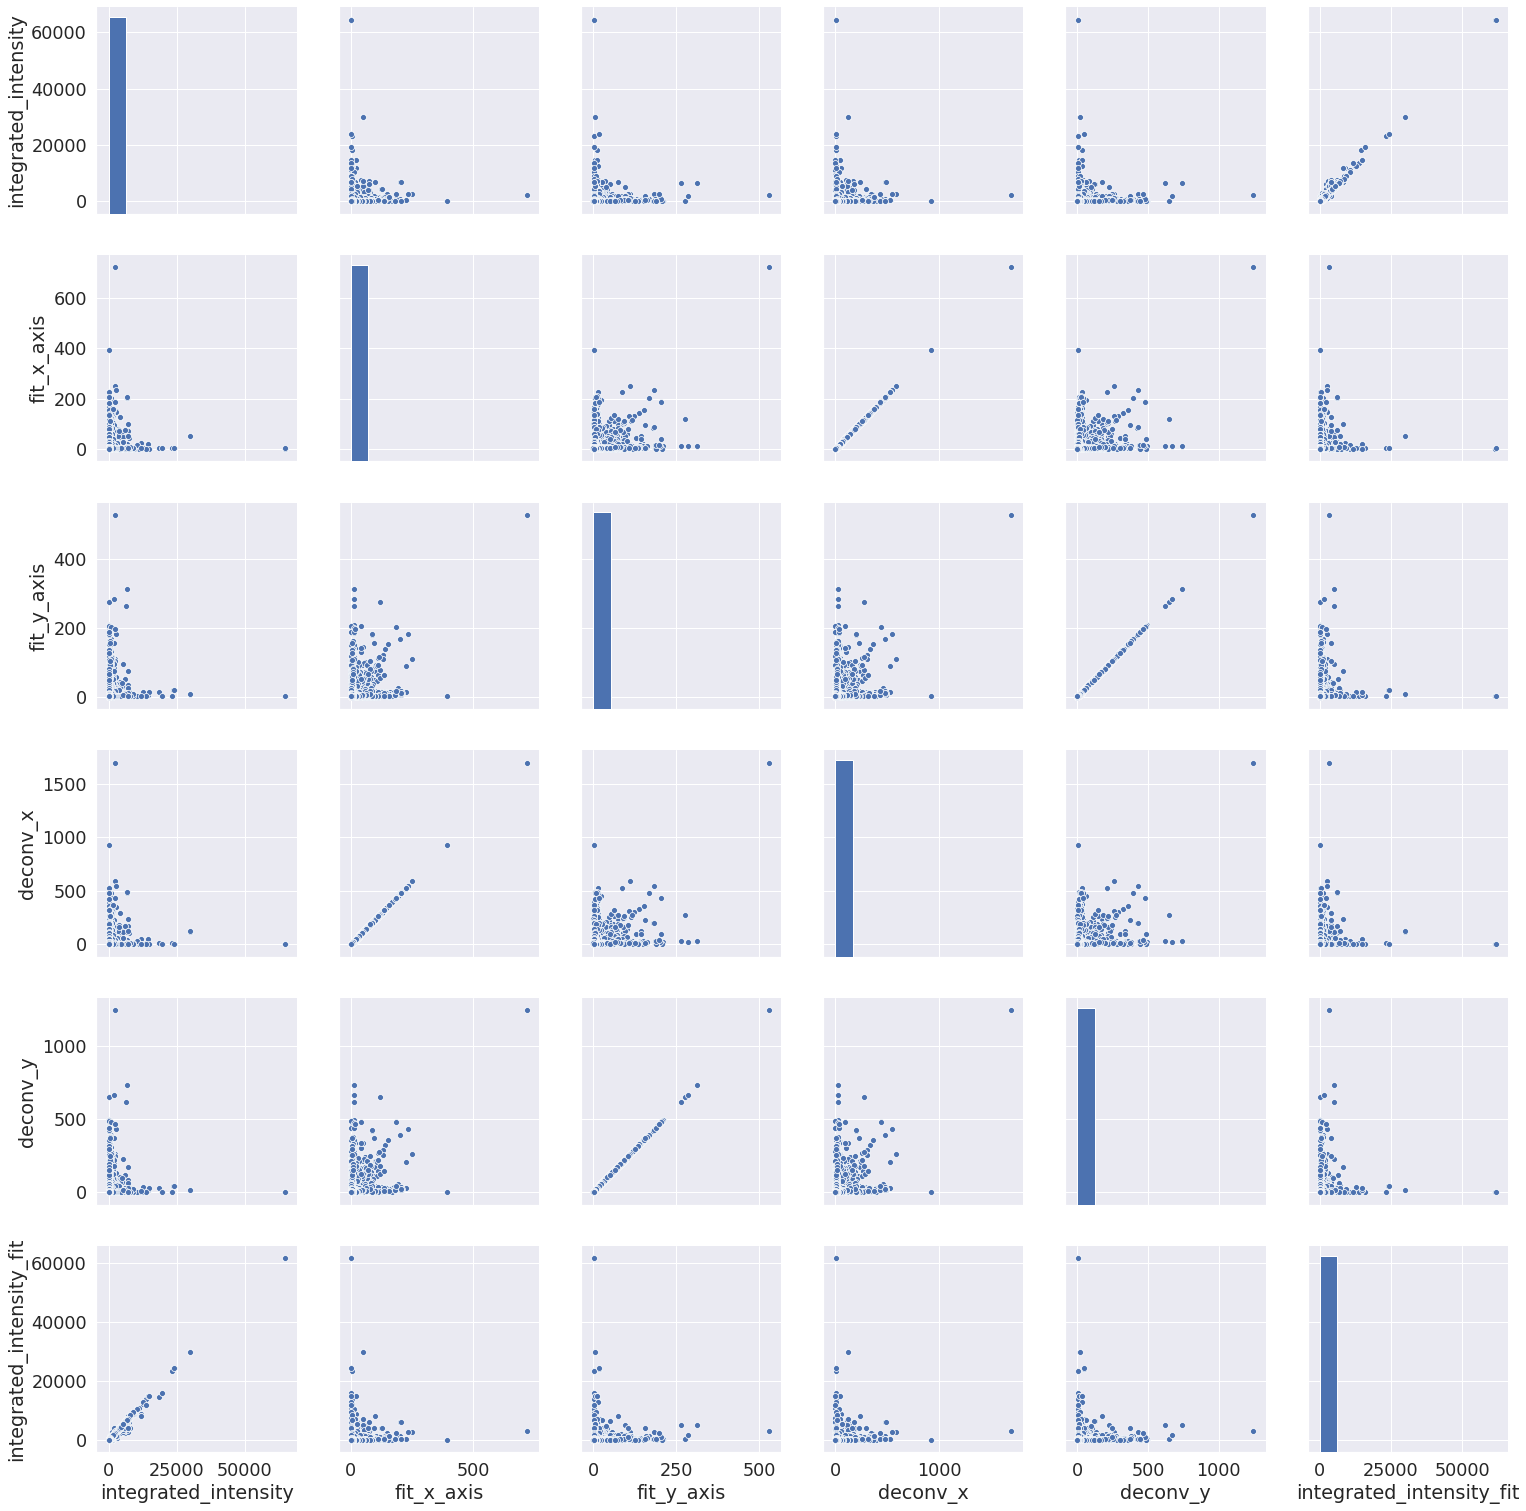

In [281]:
sns.set(font_scale=1.6) 
sns_plot = sns.pairplot(data[['integrated_intensity','fit_x_axis','fit_y_axis',
                              'deconv_x', 'deconv_y','integrated_intensity_fit']], size = 3.5)
sns_plot.savefig("Pairplot_2req.png")

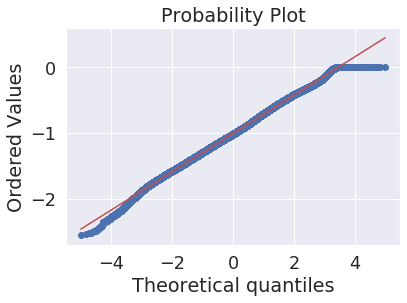

In [310]:
f, ax = plt.subplots()
qqres = probplot(np.log10(data.ratio_residual), dist=norm, plot=ax)

In [294]:
qqres[0] 
# = (osm,osr); 
#osm =Tuple of theoretical quantiles (osm, or order statistic medians)
#osr =ordered responses = sorted input x 

(array([-2.48931751, -2.31516348, -2.22116585, ...,  7.22116585,
         7.31516348,  7.48931751]),
 array([-2.56124637e+00, -2.53856950e+00, -2.52809207e+00, ...,
         2.38946763e-04,  2.47854153e-04,  4.42740263e-04]))

In [320]:
np.nanquantile(np.log10(data.ratio_residual), 0.55)

-0.9811238501909452